In [188]:
#import data from csv file

import pandas as pd

dataset = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\S_sample_main_rows_sq_code_smells.csv')

In [13]:
#import matplotlib

import matplotlib.pyplot as plt

In [14]:
#values

#Smells
code_smells = dataset['code_smells']

# Smell diffs
code_smells_diff = dataset['code_smells_diff']

#loc
added_lines = dataset['added_lines']
deleted_lines = dataset['deleted_lines']

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
new_code = dataset['added_lines'] - dataset['deleted_lines']

h1_new_code_divided_by_rework = (dataset['added_lines'] - dataset['deleted_lines']) / dataset['deleted_lines']
new_code_divided_by_rework = h1_new_code_divided_by_rework


In [15]:
#scale values

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Scale the values

#Smells
scaled_code_smells = min_max_scaling(dataset['code_smells'])

# Smell diffs
scaled_code_smells_diff = min_max_scaling(dataset['code_smells_diff'])

#loc
scaled_added_lines = min_max_scaling(dataset['added_lines'])
scaled_deleted_lines = min_max_scaling(dataset['deleted_lines'])

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
scaled_new_code = min_max_scaling(dataset['added_lines'] - dataset['deleted_lines'])

h1_new_code_divided_by_rework = (dataset['added_lines'] - dataset['deleted_lines']) / dataset['deleted_lines']
scaled_new_code_divided_by_rework = min_max_scaling(h1_new_code_divided_by_rework)


In [189]:
#jira issue key
jira_issue_key = dataset['jira issue key']
print(jira_issue_key)

0      HADOOP-16697
1      HADOOP-16749
2      HADOOP-16590
3      HADOOP-16790
4      HADOOP-16621
           ...     
354    HADOOP-18567
355    HADOOP-18575
356    HADOOP-18581
357    HADOOP-18591
358    HADOOP-18575
Name: jira issue key, Length: 359, dtype: object


In [17]:
print(scaled_code_smells[0])
print(scaled_code_smells_diff[0])

0.006289308176100629
0.06462585034013606


In [18]:
code_smells

0       9189
1       9193
2       9191
3       9195
4       9198
       ...  
354    10132
355    10132
356    10136
357    10137
358    10137
Name: code_smells, Length: 359, dtype: int64

## Line Graphs

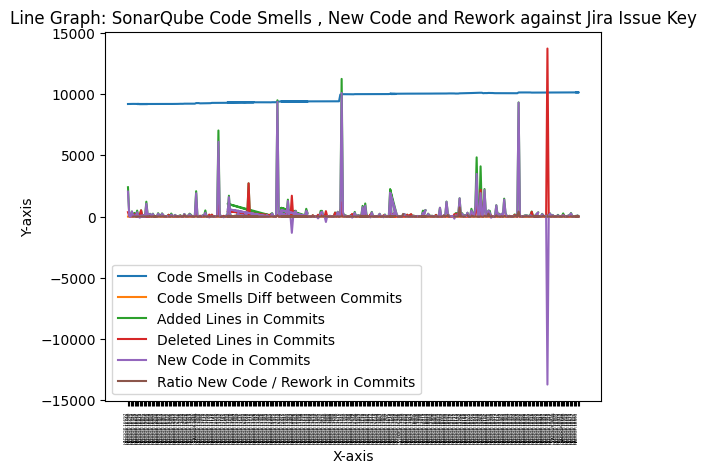

In [19]:
# Create a figure and axis object
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [30, 5]

# Plot the data as a line graph

ax.plot(jira_issue_key, code_smells)
ax.plot(jira_issue_key, code_smells_diff)
ax.plot(jira_issue_key, added_lines)
ax.plot(jira_issue_key, deleted_lines)
ax.plot(jira_issue_key, new_code)
ax.plot(jira_issue_key, new_code_divided_by_rework)

# Add labels to lines
ax.legend(['Code Smells in Codebase', 'Code Smells Diff between Commits', 'Added Lines in Commits', 'Deleted Lines in Commits', 'New Code in Commits', 'Ratio New Code / Rework in Commits'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph: SonarQube Code Smells , New Code and Rework against Jira Issue Key')

# Display the graph
plt.show()


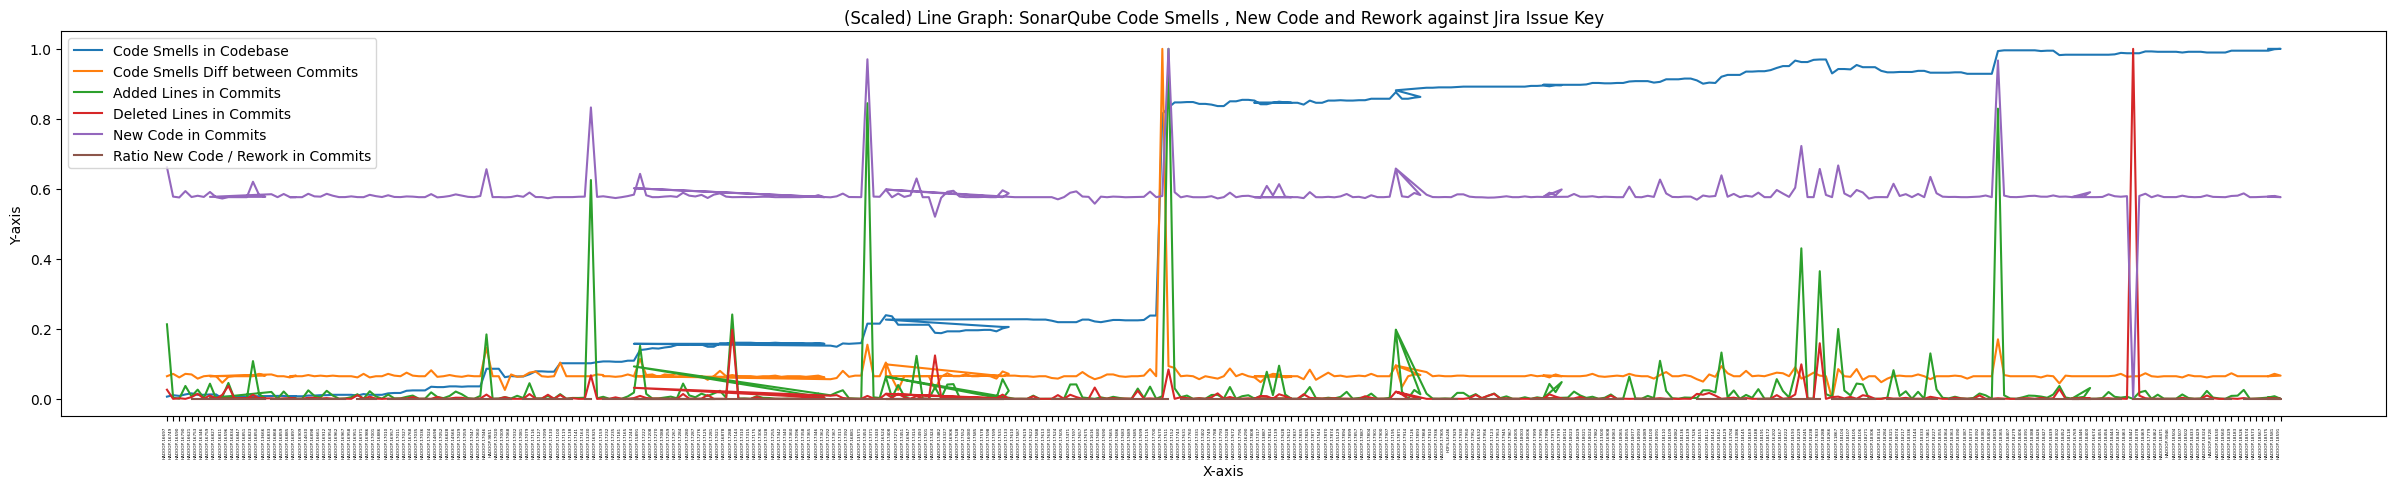

In [20]:
# Create a figure and axis object
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [30, 5]

# Plot the data as a line graph

ax.plot(jira_issue_key, scaled_code_smells)
ax.plot(jira_issue_key, scaled_code_smells_diff)
ax.plot(jira_issue_key, scaled_added_lines)
ax.plot(jira_issue_key, scaled_deleted_lines)
ax.plot(jira_issue_key, scaled_new_code)
ax.plot(jira_issue_key, scaled_new_code_divided_by_rework)

# Add labels to lines
ax.legend(['Code Smells in Codebase', 'Code Smells Diff between Commits', 'Added Lines in Commits', 'Deleted Lines in Commits', 'New Code in Commits', 'Ratio New Code / Rework in Commits'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('(Scaled) Line Graph: SonarQube Code Smells , New Code and Rework against Jira Issue Key')

# Display the graph
plt.show()


## Histograms

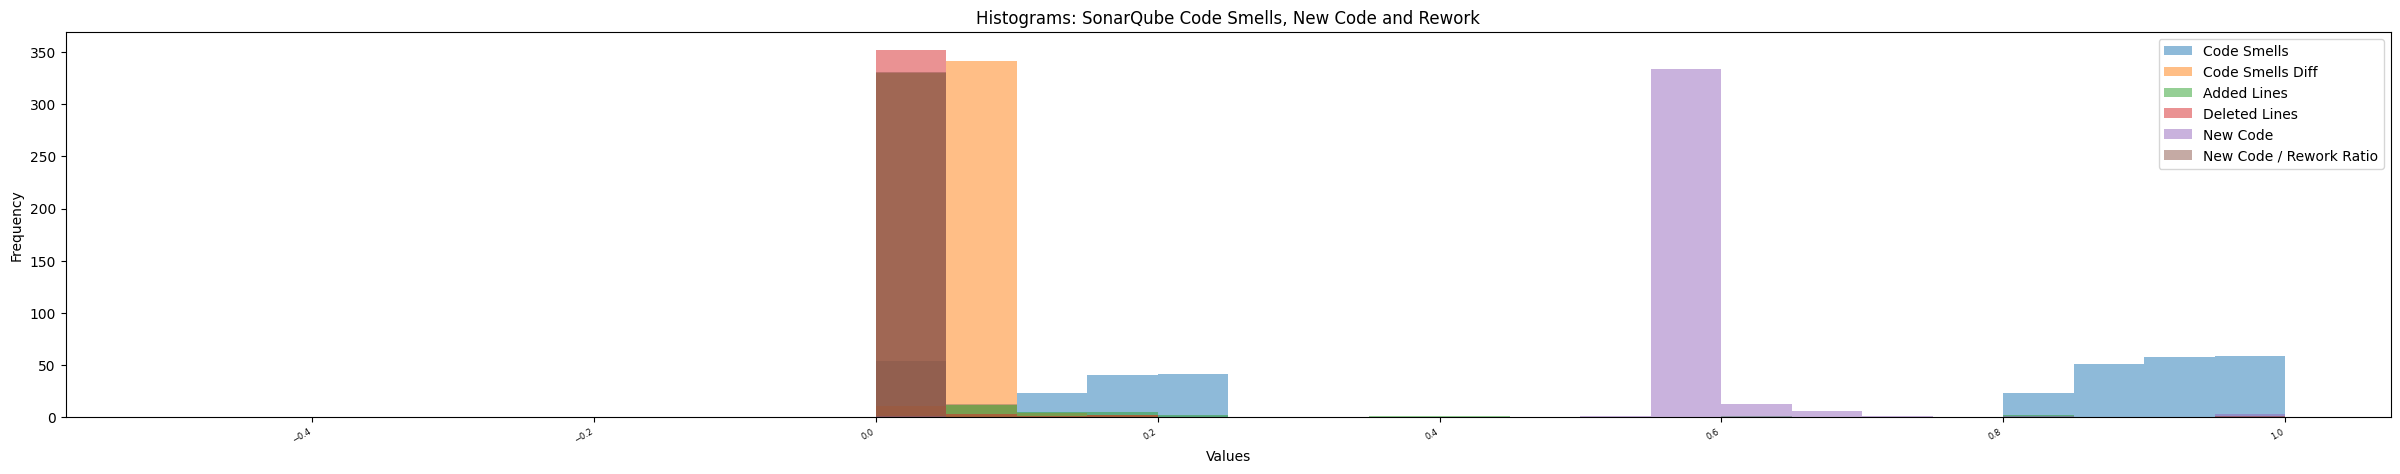

In [21]:
# Create a figure and axis object
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [20, 5]

# Plot the data as a histogram
ax.hist(scaled_code_smells, bins=20, alpha=0.5, label='Code Smells')
ax.hist(scaled_code_smells_diff, bins=20, alpha=0.5, label='Code Smells Diff')
ax.hist(scaled_added_lines, bins=20, alpha=0.5, label='Added Lines')
ax.hist(scaled_deleted_lines, bins=20, alpha=0.5, label='Deleted Lines')
ax.hist(scaled_new_code, bins=20, alpha=0.5, label='New Code')
ax.hist(scaled_new_code_divided_by_rework, bins=20, alpha=0.5, label='New Code / Rework Ratio')

# Add axis labels and a title
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Histograms: SonarQube Code Smells, New Code and Rework')

# Add a legend
ax.legend(loc='upper right')

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Display the graph
plt.show()


## Shapiro-Wilk test (test of normality)

In [22]:
#Perform Shapiro-Wilk test for normality
from scipy.stats import shapiro

# Define the Shapiro-Wilk test function
def shapiro_wilk_test(values):
    stat, p = shapiro(values)
    print(f'Statistic={stat:.2f}, p-value={p:.2f}')
    if p > 0.05:
        print('Data looks normally distributed (fail to reject H0)')
    else:
        print('Data does not look normally distributed (reject H0)')

# Perform the Shapiro-Wilk test
print('Shapiro-Wilk test for normality of code smells in codebase:')
shapiro_wilk_test(code_smells)
print('Shapiro-Wilk test for normality of code smells diff between commits:')
shapiro_wilk_test(code_smells_diff)


print('Shapiro-Wilk test for normality of added lines in commits:')
shapiro_wilk_test(added_lines)
print('Shapiro-Wilk test for normality of deleted lines in commits:')
shapiro_wilk_test(deleted_lines)
print('Shapiro-Wilk test for normality of new code in commits:')
shapiro_wilk_test(new_code)
print('Shapiro-Wilk test for normality of new code / rework ratio in commits:')
shapiro_wilk_test(new_code_divided_by_rework)

Shapiro-Wilk test for normality of code smells in codebase:
Statistic=0.77, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of code smells diff between commits:
Statistic=0.11, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of added lines in commits:
Statistic=0.26, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of deleted lines in commits:
Statistic=0.10, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of new code in commits:
Statistic=0.24, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of new code / rework ratio in commits:
Statistic=nan, p-value=1.00
Data looks normally distributed (fail to reject H0)


| Variable | Statistic | p-value | Normality |
|------|-----------|---------|-----------|
| Code smells  | 0.77 | 0.00 | Not normally distributed (reject H0) |
| Code smells diff | 0.11 | 0.00 | Not normally distributed (reject H0) |
| added lines | 0.26 | 0.00 | Not normally distributed (reject H0) |
| deleted lines | 0.10 | 0.00 | Not normally distributed (reject H0) |
| new code | 0.24 | 0.00 | Not normally distributed (reject H0) |
| new code / rework ratio | nan | 1.00 | Normally distributed (fail to reject H0) |


In [23]:
#Perform Shapiro-Wilk test for normality
from scipy.stats import shapiro

# Define the Shapiro-Wilk test function
def shapiro_wilk_test(values):
    stat, p = shapiro(values)
    print(f'Statistic={stat:.2f}, p-value={p:.2f}')
    if p > 0.05:
        print('Data looks normally distributed (fail to reject H0)')
    else:
        print('Data does not look normally distributed (reject H0)')

# Perform the Shapiro-Wilk test
print('Shapiro-Wilk test for normality of (scaled) code smells in codebase:')
shapiro_wilk_test(scaled_code_smells)
print('Shapiro-Wilk test for normality of (scaled) code smells diff between commits:')
shapiro_wilk_test(scaled_code_smells_diff)


print('Shapiro-Wilk test for normality of (scaled) added lines in commits:')
shapiro_wilk_test(scaled_added_lines)
print('Shapiro-Wilk test for normality of (scaled) deleted lines in commits:')
shapiro_wilk_test(scaled_deleted_lines)
print('Shapiro-Wilk test for normality of (scaled) new code in commits:')
shapiro_wilk_test(scaled_new_code)
print('Shapiro-Wilk test for normality of (scaled) new code / rework ratio in commits:')
shapiro_wilk_test(scaled_new_code_divided_by_rework)


Shapiro-Wilk test for normality of (scaled) code smells in codebase:
Statistic=0.77, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of (scaled) code smells diff between commits:
Statistic=0.11, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of (scaled) added lines in commits:
Statistic=0.26, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of (scaled) deleted lines in commits:
Statistic=0.10, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of (scaled) new code in commits:
Statistic=0.24, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of (scaled) new code / rework ratio in commits:
Statistic=nan, p-value=1.00
Data looks normally distributed (fail to reject H0)


| Variable (scaled) | Statistic | p-value | Normality |
|------|-----------|---------|-----------|
| Code smells | 0.77 | 0.00 | Not normally distributed (reject H0) |
| Code smells diff | 0.11 | 0.00 | Not normally distributed (reject H0) |
| added lines | 0.26 | 0.00 | Not normally distributed (reject H0) |
| deleted lines | 0.10 | 0.00 | Not normally distributed (reject H0) |
| new code | 0.24 | 0.00 | Not normally distributed (reject H0) |
| new code / rework ratio | nan | 1.00 | Normally distributed (fail to reject H0) |


## Normal Distribution

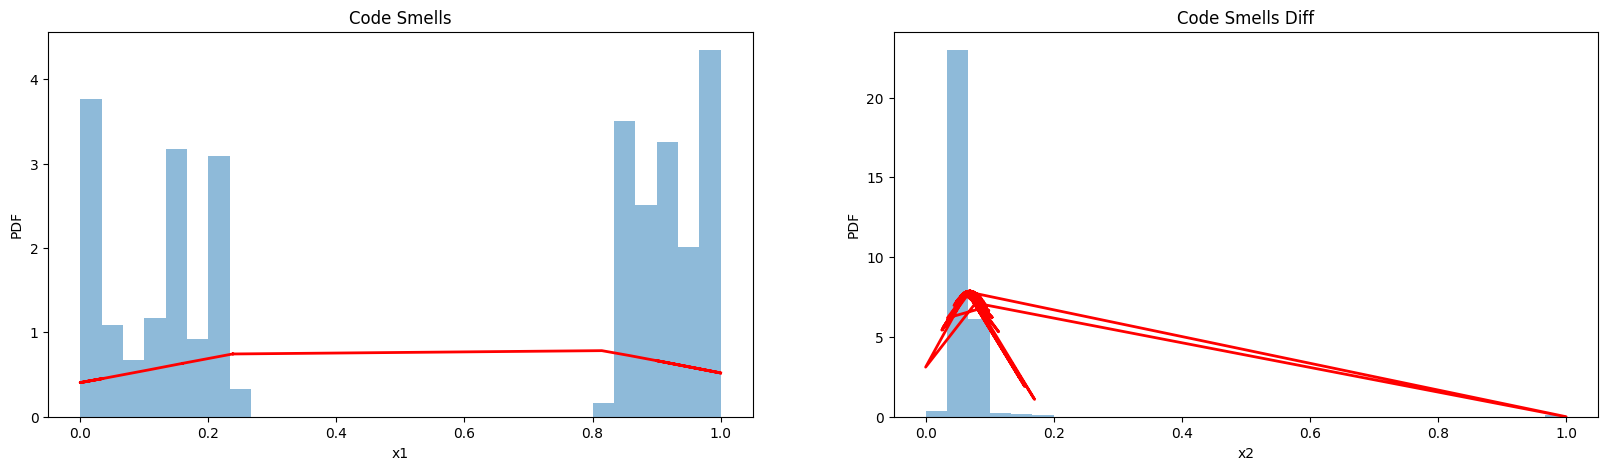

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#create 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# calculate the PDF of the Gaussian distribution for x
pdf_x1 = norm.pdf(scaled_code_smells, np.mean(scaled_code_smells), np.std(scaled_code_smells))
pdf_x2 = norm.pdf(scaled_code_smells_diff, np.mean(scaled_code_smells_diff), np.std(scaled_code_smells_diff))


# plot the PDF of the Gaussian distribution for x1, x2, x3
ax1.hist(scaled_code_smells, density=True, alpha=0.5, bins=30)
ax1.plot(scaled_code_smells, pdf_x1, 'r', linewidth=2)
ax1.set_xlabel('x1')
ax1.set_ylabel('PDF')
ax1.set_title('Code Smells')

ax2.hist(scaled_code_smells_diff, density=True, alpha=0.5, bins=30)
ax2.plot(scaled_code_smells_diff, pdf_x2, 'r', linewidth=2)
ax2.set_xlabel('x2')
ax2.set_ylabel('PDF')
ax2.set_title('Code Smells Diff')

plt.show()

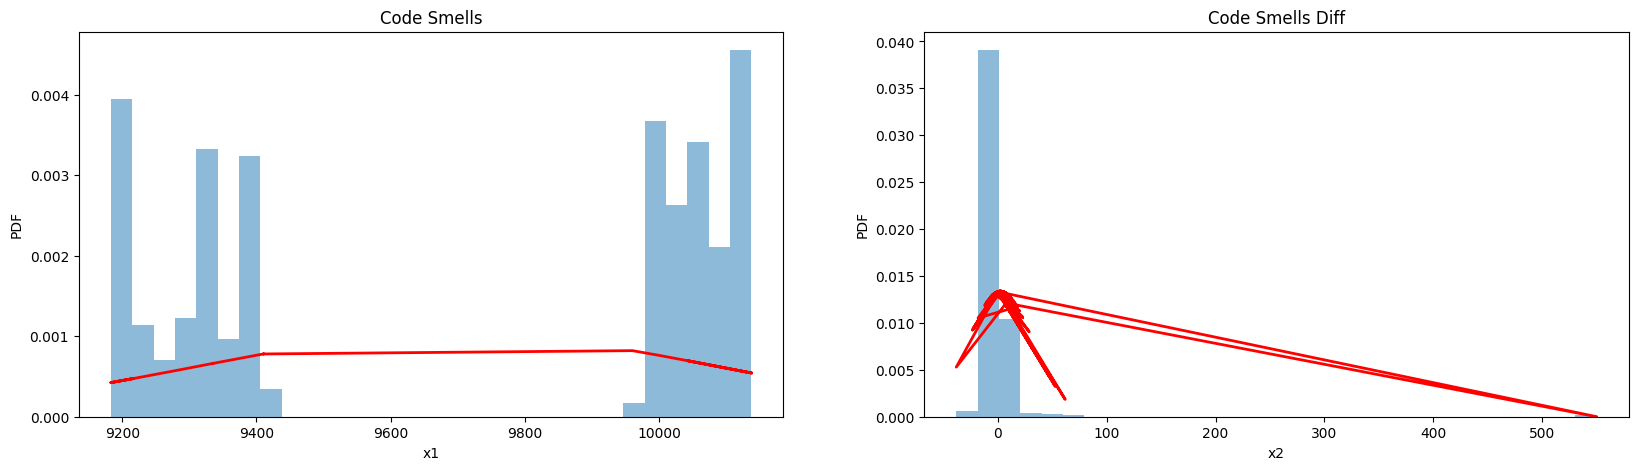

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#create 4 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# calculate the PDF of the Gaussian distribution for x
pdf_x1 = norm.pdf(code_smells, np.mean(code_smells), np.std(code_smells))
pdf_x2 = norm.pdf(code_smells_diff, np.mean(code_smells_diff), np.std(code_smells_diff))


# plot the PDF of the Gaussian distribution for x1, x2, x3
ax1.hist(code_smells, density=True, alpha=0.5, bins=30)
ax1.plot(code_smells, pdf_x1, 'r', linewidth=2)
ax1.set_xlabel('x1')
ax1.set_ylabel('PDF')
ax1.set_title('Code Smells')

ax2.hist(code_smells_diff, density=True, alpha=0.5, bins=30)
ax2.plot(code_smells_diff, pdf_x2, 'r', linewidth=2)
ax2.set_xlabel('x2')
ax2.set_ylabel('PDF')
ax2.set_title('Code Smells Diff')

plt.show()

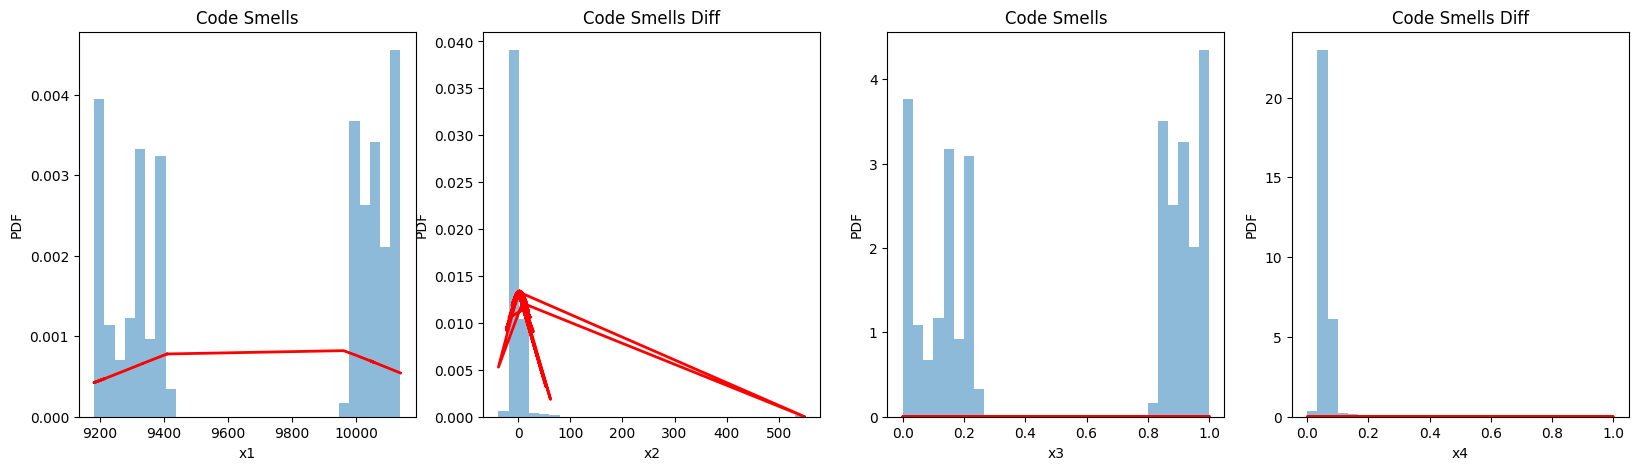

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#create 4 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# calculate the PDF of the Gaussian distribution for x
pdf_x1 = norm.pdf(code_smells, np.mean(code_smells), np.std(code_smells))
pdf_x2 = norm.pdf(code_smells_diff, np.mean(code_smells_diff), np.std(code_smells_diff))


# plot the PDF of the Gaussian distribution for x1, x2, x3
ax1.hist(code_smells, density=True, alpha=0.5, bins=30)
ax1.plot(code_smells, pdf_x1, 'r', linewidth=2)
ax1.set_xlabel('x1')
ax1.set_ylabel('PDF')
ax1.set_title('Code Smells')

ax2.hist(code_smells_diff, density=True, alpha=0.5, bins=30)
ax2.plot(code_smells_diff, pdf_x2, 'r', linewidth=2)
ax2.set_xlabel('x2')
ax2.set_ylabel('PDF')
ax2.set_title('Code Smells Diff')

#plot scaled values

# calculate the PDF of the Gaussian distribution for x
pdf_x3 = norm.pdf(scaled_code_smells, np.mean(scaled_code_smells), np.std(scaled_code_smells))
pdf_x4 = norm.pdf(scaled_code_smells_diff, np.mean(scaled_code_smells_diff), np.std(scaled_code_smells_diff))


# plot the PDF of the Gaussian distribution for x1, x2, x3
ax3.hist(scaled_code_smells, density=True, alpha=0.5, bins=30)
ax3.plot(scaled_code_smells, pdf_x1, 'r', linewidth=2)
ax3.set_xlabel('x3')
ax3.set_ylabel('PDF')
ax3.set_title('Code Smells')

ax4.hist(scaled_code_smells_diff, density=True, alpha=0.5, bins=30)
ax4.plot(scaled_code_smells_diff, pdf_x2, 'r', linewidth=2)
ax4.set_xlabel('x4')
ax4.set_ylabel('PDF')
ax4.set_title('Code Smells Diff')

plt.show()

## Kernel-Density-Estimation (KDE) Plots


C:\Users\randi\AppData\Local\Temp\ipykernel_11236\719174321.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(code_smells, ax=ax[0])
C:\Users\randi\AppData\Local\Temp\ipykernel_11236\719174321.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(code_smells_diff, ax=ax[1])
C:\Users\randi\AppDat

Text(0.5, 1.0, 'Scaled Code Smells Diff')

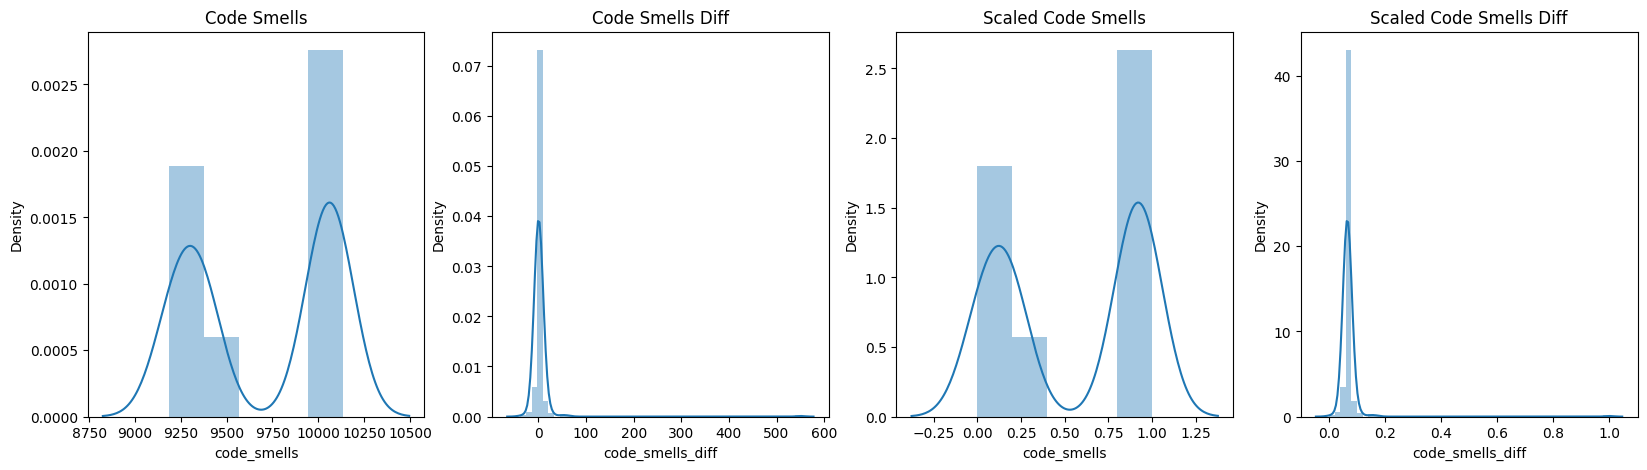

In [27]:
import seaborn as sns

#4 subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

sns.distplot(code_smells, ax=ax[0])
ax[0].set_title('Code Smells')

sns.distplot(code_smells_diff, ax=ax[1])
ax[1].set_title('Code Smells Diff')

sns.distplot(scaled_code_smells, ax=ax[2])
ax[2].set_title('Scaled Code Smells')

sns.distplot(scaled_code_smells_diff, ax=ax[3])
ax[3].set_title('Scaled Code Smells Diff')

C:\Users\randi\AppData\Local\Temp\ipykernel_11236\1631334711.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(added_lines, ax=ax[0])
C:\Users\randi\AppData\Local\Temp\ipykernel_11236\1631334711.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deleted_lines, ax=ax[1])
C:\Users\randi\AppDa

Text(0.5, 1.0, 'New Code (Added - Deleted Lines)')

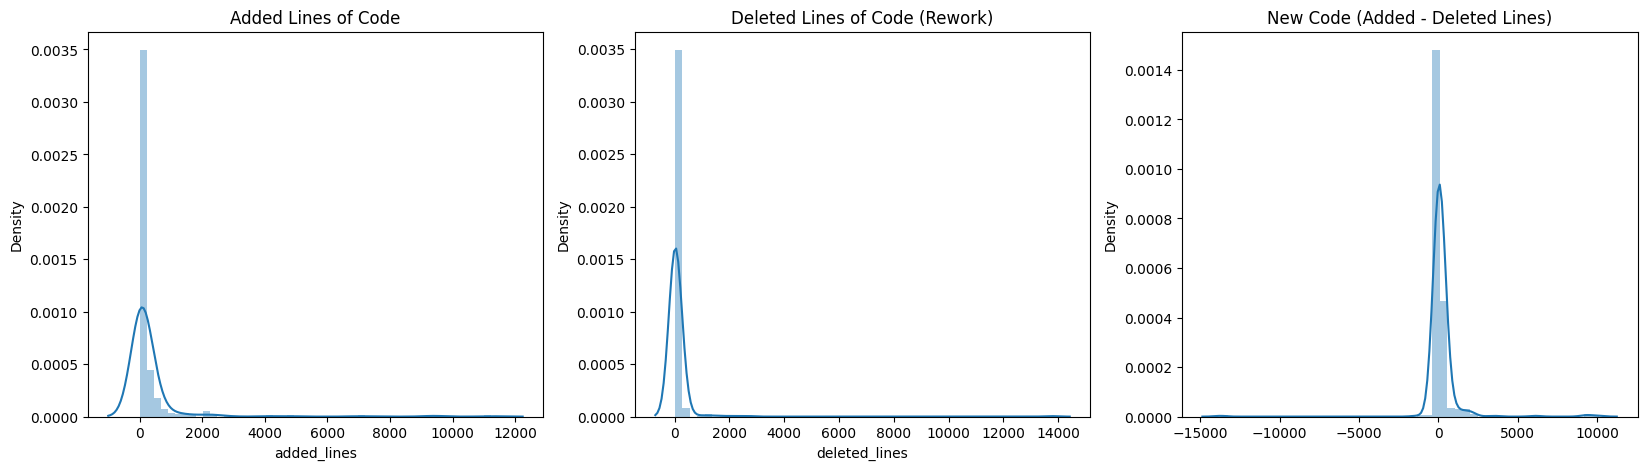

In [28]:
import seaborn as sns

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
#new_code = dataset['added_lines'] - dataset['deleted_lines']

#h1_new_code_divided_by_rework = (dataset['added_lines'] - dataset['deleted_lines']) / dataset['deleted_lines']
#new_code_divided_by_rework = h1_new_code_divided_by_rework

#3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
#fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(added_lines, ax=ax[0])
ax[0].set_title('Added Lines of Code')

sns.distplot(deleted_lines, ax=ax[1])
ax[1].set_title('Deleted Lines of Code (Rework)')

sns.distplot(new_code, ax=ax[2])
ax[2].set_title('New Code (Added - Deleted Lines)')


# Correlation Analysis

## Spearman's Correlation: for Non-normally distributed data

In [29]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value
corr, _ = spearmanr(code_smells, added_lines)
print('Spearmans correlation between code smells and added lines: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(code_smells, new_code)
print('Spearmans correlation between code smells and new code: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(code_smells, deleted_lines)
print('Spearmans correlation between code smells and rework: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(code_smells, new_code_divided_by_rework)
print('Spearmans correlation between code smells and new code/rework ratio: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(code_smells_diff, new_code)
print('Spearmans correlation between code smells diff and new code: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(code_smells_diff, deleted_lines)
print('Spearmans correlation between code smells diff and rework: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(code_smells_diff, new_code_divided_by_rework)
print('Spearmans correlation between code smells diff and new code/rework ratio: %.3f' % corr)

Spearmans correlation between code smells and added lines: 0.027
Spearmans correlation between code smells and new code: 0.083
Spearmans correlation between code smells and rework: -0.046
Spearmans correlation between code smells and new code/rework ratio: 0.081
Spearmans correlation between code smells diff and new code: 0.409
Spearmans correlation between code smells diff and rework: -0.151
Spearmans correlation between code smells diff and new code/rework ratio: 0.408


| Spearman's correlation between                                 | Correlation   | Strength | p-value
|---------------------------------------------|---------|---------|---------|
| code smells and added lines                    | 0.027   | negligible | 0.604 |
| code smells and new code                    | 0.083   | negligible | 0.118 |
| code smells and rework                      | -0.046  | - | 0.385 | 0.385 |
| code smells and new code/rework ratio       | 0.081   | negligible | 0.123 |
| code smells diff and new code               | 0.409   | strong | 6.673 |
| code smells diff and rework                 | -0.151  | - | 0.004 |
| code smells diff and new code/rework ratio  | 0.408   | strong | 7.474 |


* p <0.05, ** p <0.01, *** p <0.001
0–0.19: negligible; 0.20–0.29: weak; 0.30–0.39: moderate; 0.40–0.69: strong; and ≥ 0.70: very strong


In [96]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value
res_1 = spearmanr(code_smells, added_lines)
print('Spearmans correlation between code smells and added lines:' +  str(res_1.correlation) + ' p-value: ' + str(res_1.pvalue))

# calculate spearman's correlation
res_2 = spearmanr(code_smells, new_code)
print('Spearmans correlation between code smells and new code:' +  str(res_2.correlation) + ' p-value: ' + str(res_2.pvalue)) 

# calculate spearman's correlation
res_3 = spearmanr(code_smells, deleted_lines)
print('Spearmans correlation between code smells and rework:' +  str(res_3.correlation) + ' p-value: ' + str(res_3.pvalue))

# calculate spearman's correlation
res_4 = spearmanr(code_smells, new_code_divided_by_rework)
print('Spearmans correlation between code smells and new code/rework ratio:' +  str(res_4.correlation) + ' p-value: ' + str(res_4.pvalue))

# calculate spearman's correlation
res_5 = spearmanr(code_smells_diff, new_code)
print('Spearmans correlation between code smells diff and new code:' +  str(res_5.correlation) + ' p-value: ' + str(res_5.pvalue))

# calculate spearman's correlation
res_6 = spearmanr(code_smells_diff, deleted_lines)
print('Spearmans correlation between code smells diff and rework:' +  str(res_6.correlation) + ' p-value: ' + str(res_6.pvalue))

# calculate spearman's correlation
res_7 = spearmanr(code_smells_diff, new_code_divided_by_rework)
print('Spearmans correlation between code smells diff and new code/rework ratio:' +  str(res_7.correlation) + ' p-value: ' + str(res_7.pvalue))

Spearmans correlation between code smells and added lines:0.027456804811122032 p-value: 0.6040985404748273
Spearmans correlation between code smells and new code:0.08273680189976416 p-value: 0.11761679469902829
Spearmans correlation between code smells and rework:-0.04603107271293858 p-value: 0.38452795364077297
Spearmans correlation between code smells and new code/rework ratio:0.08145982085780333 p-value: 0.12340883867774567
Spearmans correlation between code smells diff and new code:0.4089015649518231 p-value: 6.673054148720442e-16
Spearmans correlation between code smells diff and rework:-0.15145439259952856 p-value: 0.004024269827121991
Spearmans correlation between code smells diff and new code/rework ratio:0.408262854079055 p-value: 7.473970679345203e-16


# Mann-Kendall trend analysis

In [30]:
%pip install --upgrade pymannkendall

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
#Mann Kendall test
from pymannkendall import pymannkendall

# calculate mann kendall test
mk_test1 = pymannkendall.original_test(code_smells)
print(mk_test1)

# calculate mann kendall test
mk_test2 = pymannkendall.original_test(code_smells_diff)
print(mk_test2)

# calculate mann kendall test
mk_test3 = pymannkendall.original_test(new_code)
print(mk_test3)

# calculate mann kendall test
mk_test4 = pymannkendall.original_test(deleted_lines)
print(mk_test4)

# calculate mann kendall test
mk_test5 = pymannkendall.original_test(new_code_divided_by_rework)
print(mk_test5)


Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=26.150428235826727, Tau=0.9245109786651312, s=59410.0, var_s=5161154.666666667, slope=2.9712460063897765, intercept=9455.14696485623)
Mann_Kendall_Test(trend='no trend', h=False, p=0.6113902140867482, z=-0.5080900196942314, Tau=-0.0167908996125177, s=-1079.0, var_s=4501489.0, slope=0.0, intercept=0.0)
Mann_Kendall_Test(trend='no trend', h=False, p=0.2400728373488632, z=1.1748047550140595, Tau=0.04151818365727269, s=2668.0, var_s=5153646.666666667, slope=0.013513513513513514, intercept=19.58108108108108)
Mann_Kendall_Test(trend='no trend', h=False, p=0.3644910882233843, z=-0.9068406156475887, Tau=-0.03197896080048552, s=-2055.0, var_s=5130255.0, slope=0.0, intercept=7.0)
Mann_Kendall_Test(trend='no trend', h=False, p=0.19918549730906432, z=1.2838755675622449, Tau=0.04536188356857192, s=2915.0, var_s=5151494.333333333, slope=0.0017241379310344827, intercept=2.3413793103448275)


c:\CodeBook\new_code_rework_TD\new_code_rework_TD\venv\lib\site-packages\pymannkendall\pymannkendall.py:155: RuntimeWarning: invalid value encountered in subtract
  d[idx : idx + len(j)] = (x[j] - x[i]) / (j - i)


| Mann_Kendall_Test | Trend | h | p | z | Tau | s | var(s) | Slope | Intercept |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|  Code Smells | increasing | True | 0.0 | 26.1504 | 0.9245 | 59410.0 | 5161154.67 | 2.9712 | 9455.147 |
| Code Smells Diff | no trend | False | 0.6114 | -0.5081 | -0.0168 | -1079.0 | 4501489.0 | 0.0 | 0.0 |
| New Code | no trend | False | 0.2401 | 1.1748 | 0.0415 | 2668.0 | 5153646.67 | 0.0135 | 19.5811 |
| Rework | no trend | False | 0.3645 | -0.9068 | -0.0320 | -2055.0 | 5130255.0 | 0.0 | 7.0 |
| New Code/Rework ratio | no trend | False | 0.1992 | 1.2839 | 0.0454 | 2915.0 | 5151494.33 | 0.0017 | 2.3414 |

* helps determine similarity in the trends 


## KDE

C:\Users\randi\AppData\Local\Temp\ipykernel_11236\2923017795.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(added_lines, ax=ax[0], fit=norm, kde=False, bins = 5, rug=True)
C:\Users\randi\AppData\Local\Temp\ipykernel_11236\2923017795.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dele

Text(0.5, 1.0, 'New Code (Added - Deleted Lines)')

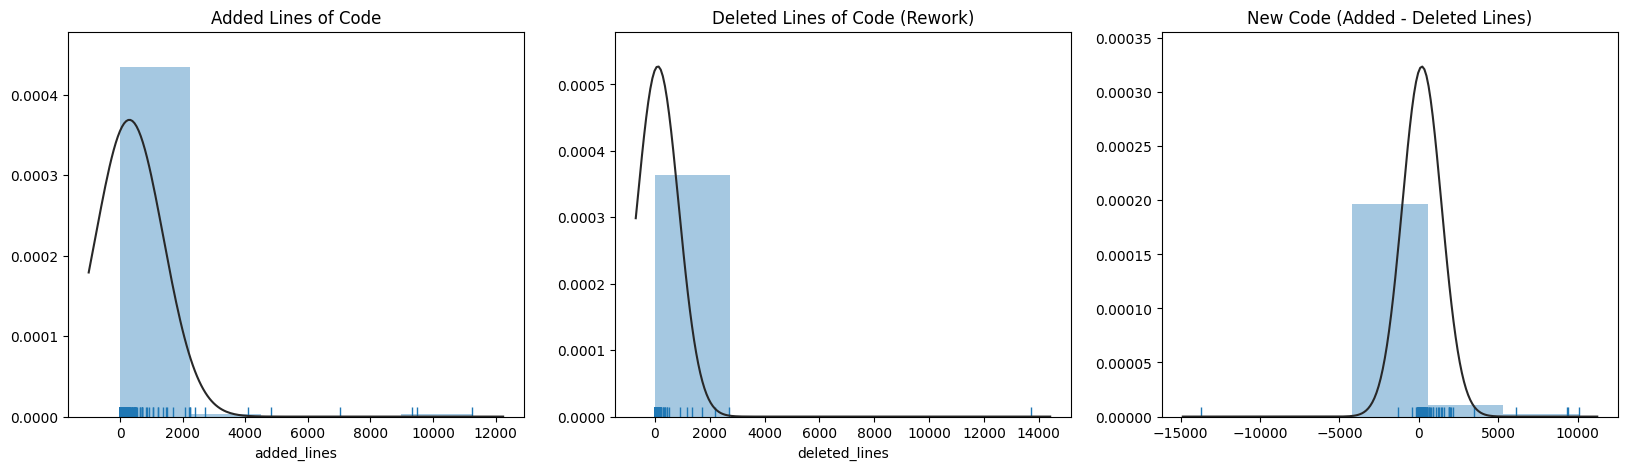

In [97]:
import seaborn as sns
from scipy.stats import norm

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
#new_code = dataset['added_lines'] - dataset['deleted_lines']

#h1_new_code_divided_by_rework = (dataset['added_lines'] - dataset['deleted_lines']) / dataset['deleted_lines']
#new_code_divided_by_rework = h1_new_code_divided_by_rework

#3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
#fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(added_lines, ax=ax[0], fit=norm, kde=False, bins = 5, rug=True)
ax[0].set_title('Added Lines of Code')

sns.distplot(deleted_lines, ax=ax[1], fit=norm, kde=False, bins = 5, rug=True)
ax[1].set_title('Deleted Lines of Code (Rework)')

sns.distplot(new_code, ax=ax[2], fit=norm, kde=False, bins = 5, rug=True)
ax[2].set_title('New Code (Added - Deleted Lines)')


# Graphs based on Jira Issue Types


In [190]:
#import data from csv file

import pandas as pd

dataset_it = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\All_Rows_Manual_Analysis.csv')

In [192]:
#extract data for main rows

#main rows 
main_rows = dataset_it[dataset_it['hash'].notna()]

#issue type in main rows
issue_type = main_rows['issue type']

#added lines in main rows
added_lines = main_rows['added_lines']

#deleted lines in main rows
deleted_lines = main_rows['deleted_lines']

#code smells in main rows
code_smells = main_rows['code_smells']

#code smells diff in main rows
code_smells_diff = main_rows['code_smells_diff']

#code smells density in main rows
code_smells_density = main_rows['code_smell_density']



In [35]:
#prepare data for analysis

#filter rows with issue type = 'Bug'
main_rows_bug = main_rows[main_rows['issue type'] == 'Bug']

#filter rows with issue type = 'New Feature'
main_rows_feature = main_rows[main_rows['issue type'] == 'New Feature']

#filter rows with issue type = 'Improvement'
main_rows_improvement = main_rows[main_rows['issue type'] == 'Improvement']

#filter rows with issue type = 'Test'
main_rows_test = main_rows[main_rows['issue type'] == 'Test']

#filter rows with issue type = 'Wish'
main_rows_wish = main_rows[main_rows['issue type'] == 'Wish']

#filter rows with issue type = 'Task'
main_rows_task = main_rows[main_rows['issue type'] == 'Task']

#filter rows with issue type = 'Sub-task'
main_rows_subtask = main_rows[main_rows['issue type'] == 'Sub-task']


In [108]:
num_main_rows = len(main_rows)
num_main_rows_bug = len(main_rows_bug)
num_main_rows_feature = len(main_rows_feature)
num_main_rows_improvement = len(main_rows_improvement)
num_main_rows_test = len(main_rows_test)
num_main_rows_wish = len(main_rows_wish)
num_main_rows_task = len(main_rows_task)
num_main_rows_subtask = len(main_rows_subtask)

#percentage from total number of main rows
percentage_main_rows_bug = num_main_rows_bug / num_main_rows * 100
percentage_main_rows_feature = num_main_rows_feature / num_main_rows * 100
percentage_main_rows_improvement = num_main_rows_improvement / num_main_rows * 100
percentage_main_rows_test = num_main_rows_test / num_main_rows * 100
percentage_main_rows_wish = num_main_rows_wish / num_main_rows * 100
percentage_main_rows_task = num_main_rows_task / num_main_rows * 100
percentage_main_rows_subtask = num_main_rows_subtask / num_main_rows * 100

print('Number of main rows: ' + str(num_main_rows))
print('Number of main rows with issue type = Bug: ' + str(num_main_rows_bug) + ' (' + str(percentage_main_rows_bug) + '%)')
print('Number of main rows with issue type = New Feature: ' + str(num_main_rows_feature) + ' (' + str(percentage_main_rows_feature) + '%)')
print('Number of main rows with issue type = Improvement: ' + str(num_main_rows_improvement) + ' (' + str(percentage_main_rows_improvement) + '%)')
print('Number of main rows with issue type = Test: ' + str(num_main_rows_test) + ' (' + str(percentage_main_rows_test) + '%)')
print('Number of main rows with issue type = Wish: ' + str(num_main_rows_wish)  + ' (' + str(percentage_main_rows_wish) + '%)')
print('Number of main rows with issue type = Task: ' + str(num_main_rows_task) + ' (' + str(percentage_main_rows_task) + '%)')
print('Number of main rows with issue type = Sub-task: ' + str(num_main_rows_subtask) + ' (' + str(percentage_main_rows_subtask) + '%)')


Number of main rows: 359
Number of main rows with issue type = Bug: 123 (34.26183844011142%)
Number of main rows with issue type = New Feature: 12 (3.3426183844011144%)
Number of main rows with issue type = Improvement: 117 (32.590529247910865%)
Number of main rows with issue type = Test: 3 (0.8356545961002786%)
Number of main rows with issue type = Wish: 2 (0.5571030640668524%)
Number of main rows with issue type = Task: 15 (4.178272980501393%)
Number of main rows with issue type = Sub-task: 87 (24.233983286908078%)


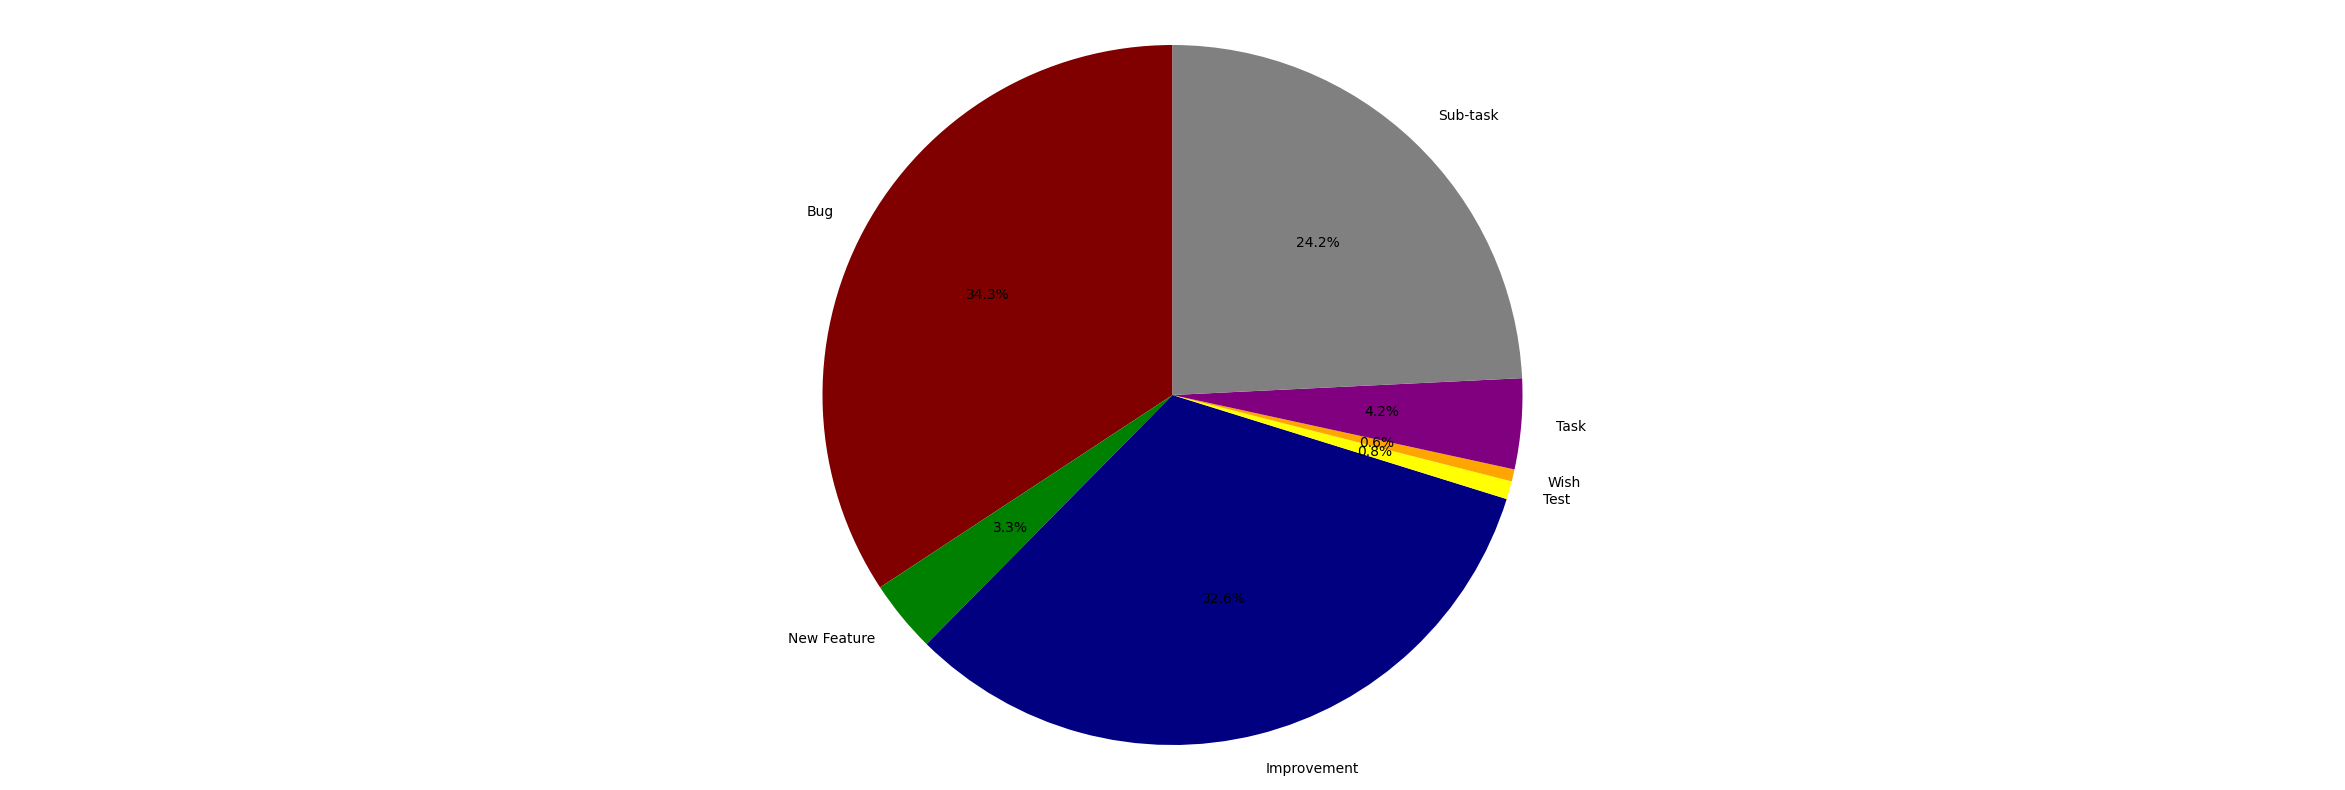

In [93]:
#histogram of issue type
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bug', 'New Feature', 'Improvement', 'Test', 'Wish', 'Task', 'Sub-task'
sizes = [num_main_rows_bug, num_main_rows_feature, num_main_rows_improvement, num_main_rows_test, num_main_rows_wish, num_main_rows_task, num_main_rows_subtask]
colors=['maroon', 'green', 'navy', 'yellow', 'orange', 'purple', 'grey']
#explode = (0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

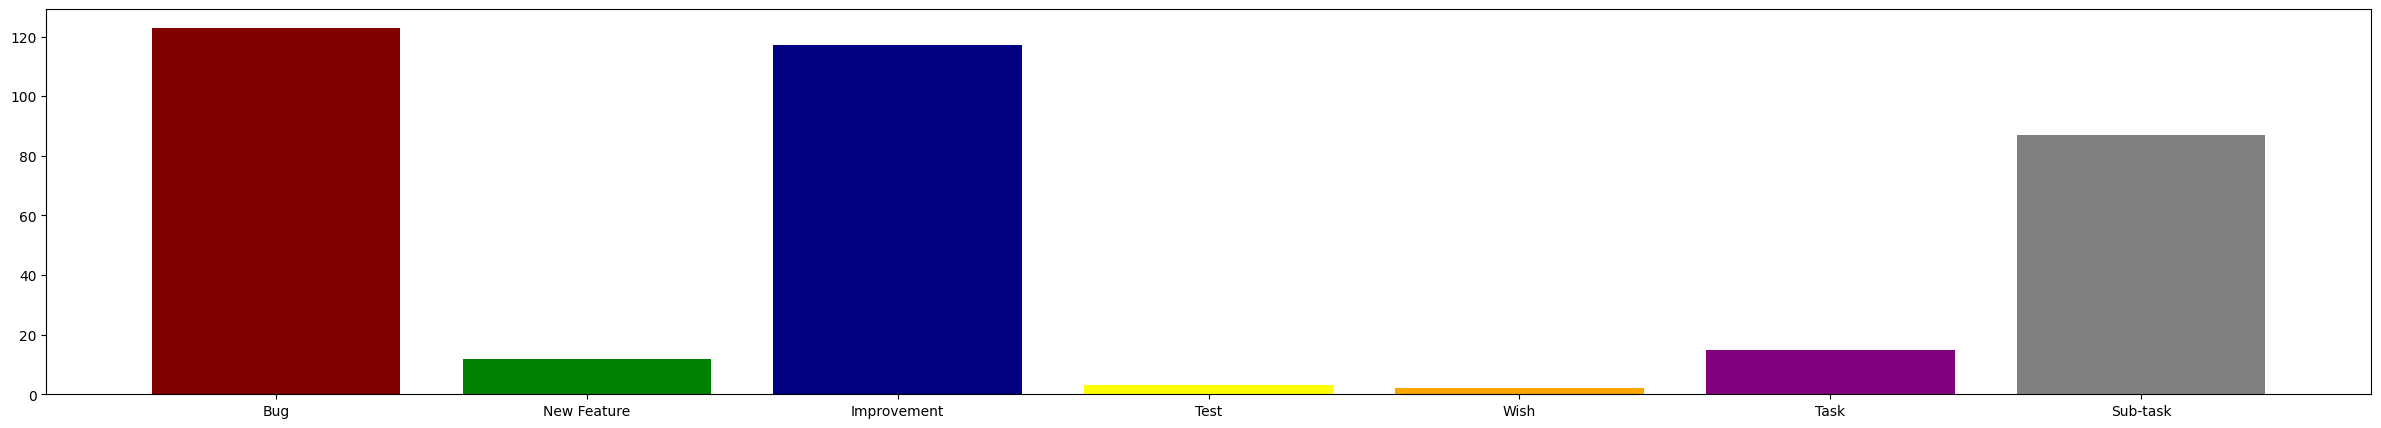

In [ ]:
import matplotlib.pyplot as plt

#draw bar chart for issue types
#use different colors for bars
plt.bar(labels, sizes, color=['maroon', 'green', 'navy', 'yellow', 'orange', 'purple', 'grey'])
plt.show()


In [38]:
#data for 'Bug'issue type

#added lines in main rows
added_lines_bug = main_rows_bug['added_lines']

#deleted lines in main rows
deleted_lines_bug = main_rows_bug['deleted_lines']

#code smells in main rows
code_smells_bug = main_rows_bug['code_smells']

#code smells diff in main rows
code_smells_diff_bug = main_rows_bug['code_smells_diff']

#code smells density in main rows
code_smells_density_bug = main_rows_bug['code_smell_density']

In [39]:
#data for 'New feature' issue type

#added lines in main rows
added_lines_feature = main_rows_feature['added_lines']

#deleted lines in main rows
deleted_lines_feature = main_rows_feature['deleted_lines']

#code smells in main rows
code_smells_feature = main_rows_feature['code_smells']

#code smells diff in main rows
code_smells_diff_feature = main_rows_feature['code_smells_diff']

#code smells density in main rows
code_smells_density_feature = main_rows_feature['code_smell_density']

In [40]:
#data for 'Improvement' issue type

#added lines in main rows
added_lines_improvement = main_rows_improvement['added_lines']

#deleted lines in main rows
deleted_lines_improvement = main_rows_improvement['deleted_lines']

#code smells in main rows
code_smells_improvement = main_rows_improvement['code_smells']

#code smells diff in main rows
code_smells_diff_improvement = main_rows_improvement['code_smells_diff']

#code smells density in main rows
code_smells_density_improvement = main_rows_improvement['code_smell_density']

In [41]:
#data for 'Test' issue type

#added lines in main rows
added_lines_test = main_rows_test['added_lines']

#deleted lines in main rows
deleted_lines_test = main_rows_test['deleted_lines']

#code smells in main rows
code_smells_test = main_rows_test['code_smells']

#code smells diff in main rows
code_smells_diff_test = main_rows_test['code_smells_diff']

#code smells density in main rows
code_smells_density_test = main_rows_test['code_smell_density']

In [42]:
#data for 'Wish' issue type

#added lines in main rows
added_lines_wish = main_rows_wish['added_lines']

#deleted lines in main rows
deleted_lines_wish = main_rows_wish['deleted_lines']

#code smells in main rows
code_smells_wish = main_rows_wish['code_smells']

#code smells diff in main rows
code_smells_diff_wish = main_rows_wish['code_smells_diff']

#code smells density in main rows
code_smells_density_wish = main_rows_wish['code_smell_density']

In [43]:
#data for 'Task' issue type

#added lines in main rows
added_lines_task = main_rows_task['added_lines']

#deleted lines in main rows
deleted_lines_task = main_rows_task['deleted_lines']

#code smells in main rows
code_smells_task = main_rows_task['code_smells']

#code smells diff in main rows
code_smells_diff_task = main_rows_task['code_smells_diff']

#code smells density in main rows
code_smells_density_task = main_rows_task['code_smell_density']

In [44]:
#data for 'Sub-task' issue type

#added lines in main rows
added_lines_subtask = main_rows_subtask['added_lines']

#deleted lines in main rows
deleted_lines_subtask = main_rows_subtask['deleted_lines']

#code smells in main rows
code_smells_subtask = main_rows_subtask['code_smells']

#code smells diff in main rows
code_smells_diff_subtask = main_rows_subtask['code_smells_diff']

#code smells density in main rows
code_smells_density_subtask = main_rows_subtask['code_smell_density']

In [45]:
#import matplotlib

import matplotlib.pyplot as plt

In [47]:
code_smells_bug

31       9193.0
34       9191.0
477      9183.0
481      9183.0
523      9191.0
         ...   
5741    10132.0
5756    10132.0
5761    10132.0
5767    10136.0
5770    10137.0
Name: code_smells, Length: 123, dtype: float64

In [48]:
#jira issue key
jira_issue_key = dataset_it['jira issue key']
print(jira_issue_key)

#jira issue key where the issue type is 'Bug'
jira_issue_key_bug = main_rows_bug['jira issue key']

#jira issue key where the issue type is 'New Feature'
jira_issue_key_feature = main_rows_feature['jira issue key']

#jira issue key where the issue type is 'Improvement'
jira_issue_key_improvement = main_rows_improvement['jira issue key']

#jira issue key where the issue type is 'Test'
jira_issue_key_test = main_rows_test['jira issue key']

#jira issue key where the issue type is 'Wish'
jira_issue_key_wish = main_rows_wish['jira issue key']

#jira issue key where the issue type is 'Task'
jira_issue_key_task = main_rows_task['jira issue key']

#jira issue key where the issue type is 'Sub-task'
jira_issue_key_subtask = main_rows_subtask['jira issue key']

0       HADOOP-16697
1       HADOOP-16697
2       HADOOP-16697
3       HADOOP-16697
4       HADOOP-16697
            ...     
5770    HADOOP-18591
5771    HADOOP-18591
5772    HADOOP-18575
5773    HADOOP-18575
5774    HADOOP-18575
Name: jira issue key, Length: 5775, dtype: object


In [49]:
#nloc

nloc = dataset_it['nloc']

#nloc is 'Bug'
nloc_bug = main_rows_bug['nloc']

#nloc is 'New Feature'
nloc_feature = main_rows_feature['nloc']

#nloc is 'Improvement'
nloc_improvement = main_rows_improvement['nloc']

#nloc is 'Test'
nloc_test = main_rows_test['nloc']

#nloc is 'Wish'
nloc_wish = main_rows_wish['nloc']

#nloc is 'Task'
nloc_task = main_rows_task['nloc']

#nloc is 'Sub-task'
nloc_subtask = main_rows_subtask['nloc']

## Bugs

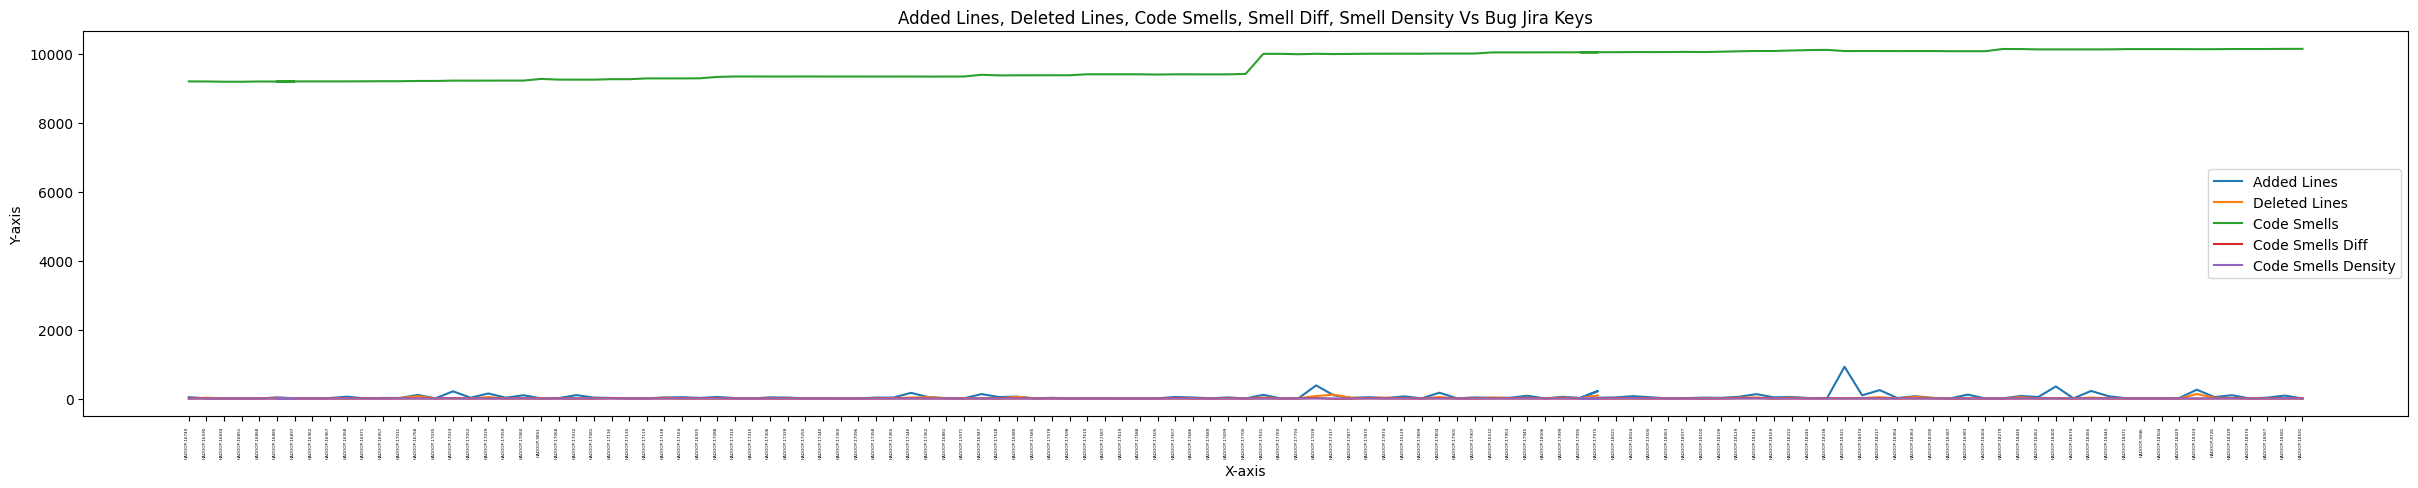

In [50]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_bug, added_lines_bug)
ax.plot(jira_issue_key_bug, deleted_lines_bug)
ax.plot(jira_issue_key_bug, code_smells_bug)
ax.plot(jira_issue_key_bug, code_smells_diff_bug)
ax.plot(jira_issue_key_bug, code_smells_density_bug.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Added Lines', 'Deleted Lines', 'Code Smells', 'Code Smells Diff', 'Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Added Lines, Deleted Lines, Code Smells, Smell Diff, Smell Density Vs Bug Jira Keys')

# Display the graph
plt.show()


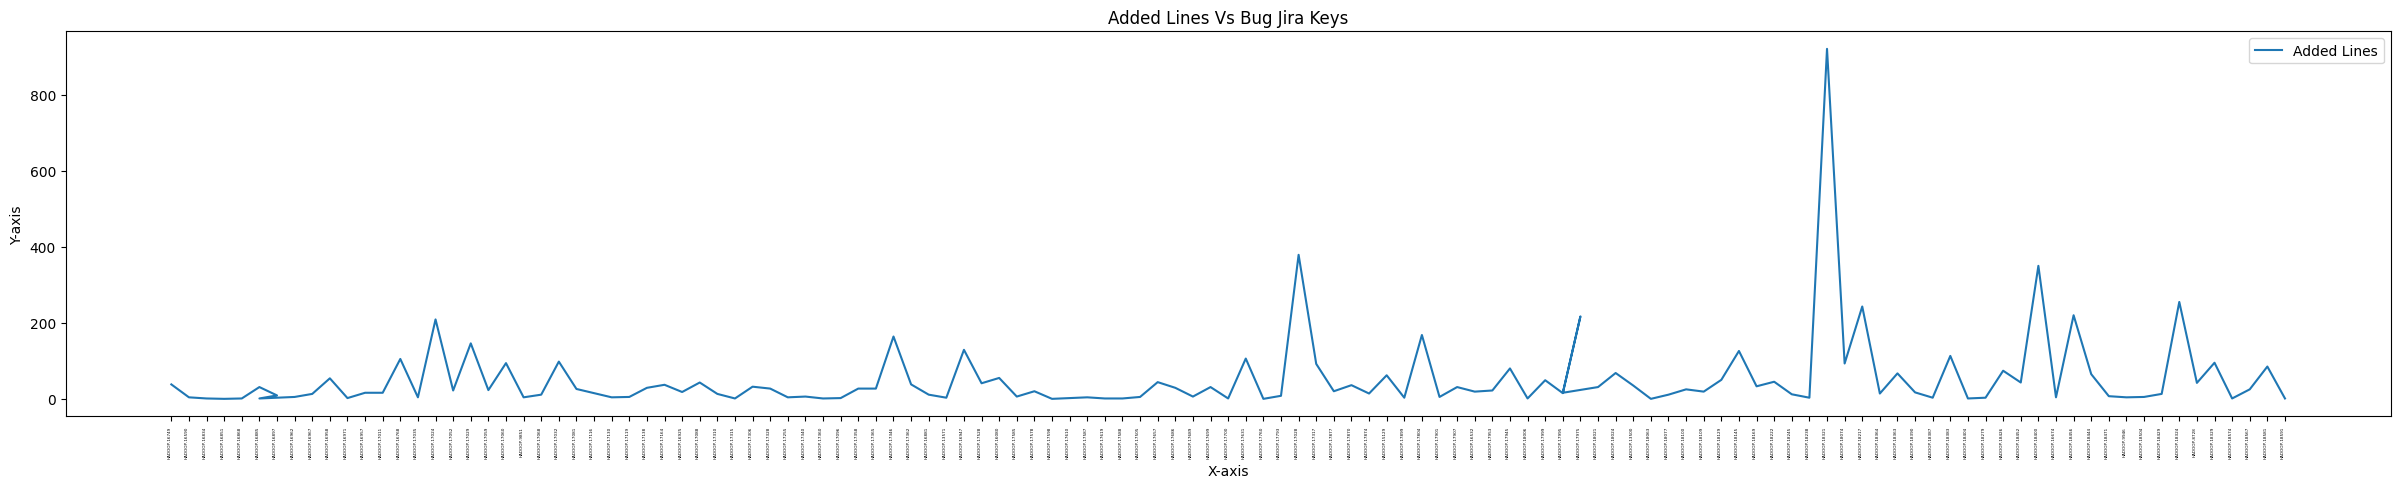

In [51]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_bug, added_lines_bug)
#ax.plot(jira_issue_key_bug, deleted_lines_bug)
#ax.plot(jira_issue_key_bug, code_smells_bug)
#ax.plot(jira_issue_key_bug, code_smells_diff_bug)
#ax.plot(jira_issue_key_bug, code_smells_density_bug.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Added Lines', 'Deleted Lines', 'Code Smells', 'Code Smells Diff', 'Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Added Lines Vs Bug Jira Keys')

# Display the graph
plt.show()


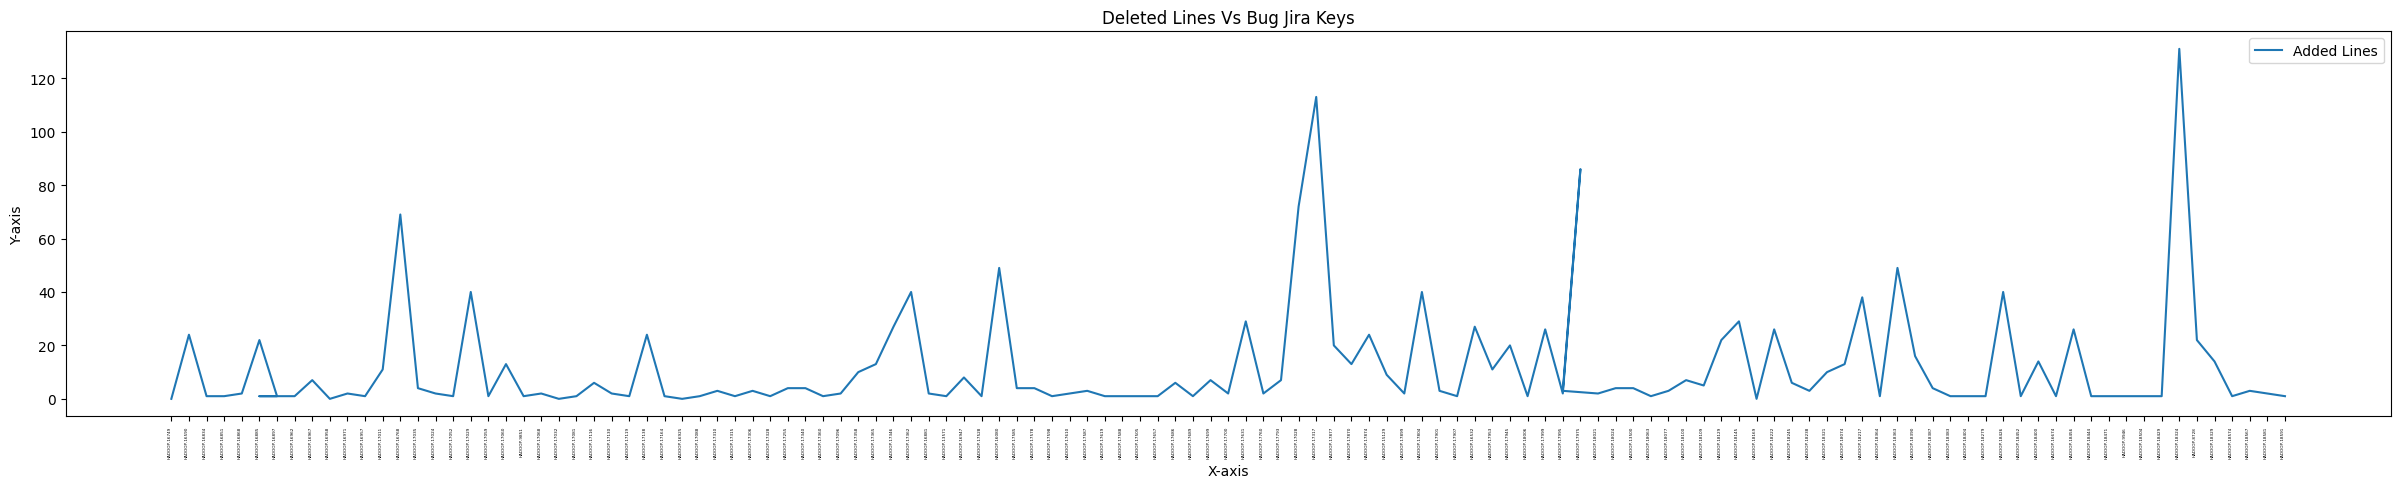

In [52]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
#ax.plot(jira_issue_key_bug, added_lines_bug)
ax.plot(jira_issue_key_bug, deleted_lines_bug)
#ax.plot(jira_issue_key_bug, code_smells_bug)
#ax.plot(jira_issue_key_bug, code_smells_diff_bug)
#ax.plot(jira_issue_key_bug, code_smells_density_bug.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Added Lines', 'Deleted Lines', 'Code Smells', 'Code Smells Diff', 'Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Deleted Lines Vs Bug Jira Keys')

# Display the graph
plt.show()


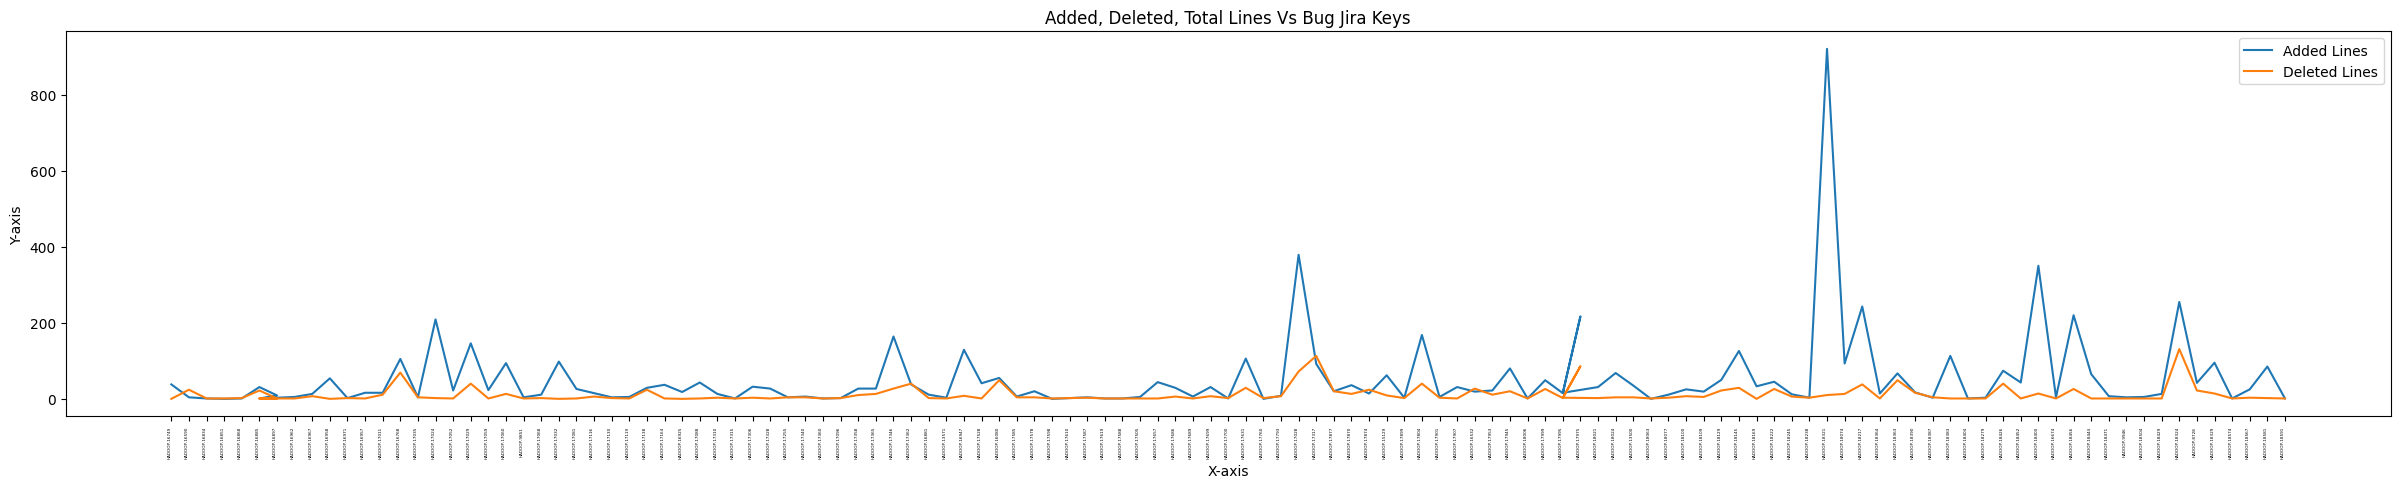

In [53]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_bug, added_lines_bug)
ax.plot(jira_issue_key_bug, deleted_lines_bug)
#ax.plot(jira_issue_key_bug, nloc_bug)
#ax.plot(jira_issue_key_bug, code_smells_bug)
#ax.plot(jira_issue_key_bug, code_smells_diff_bug)
#ax.plot(jira_issue_key_bug, code_smells_density_bug.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Added Lines', 'Deleted Lines', 'NLOC', 'Code Smells', 'Code Smells Diff', 'Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Added, Deleted, Total Lines Vs Bug Jira Keys')

# Display the graph
plt.show()


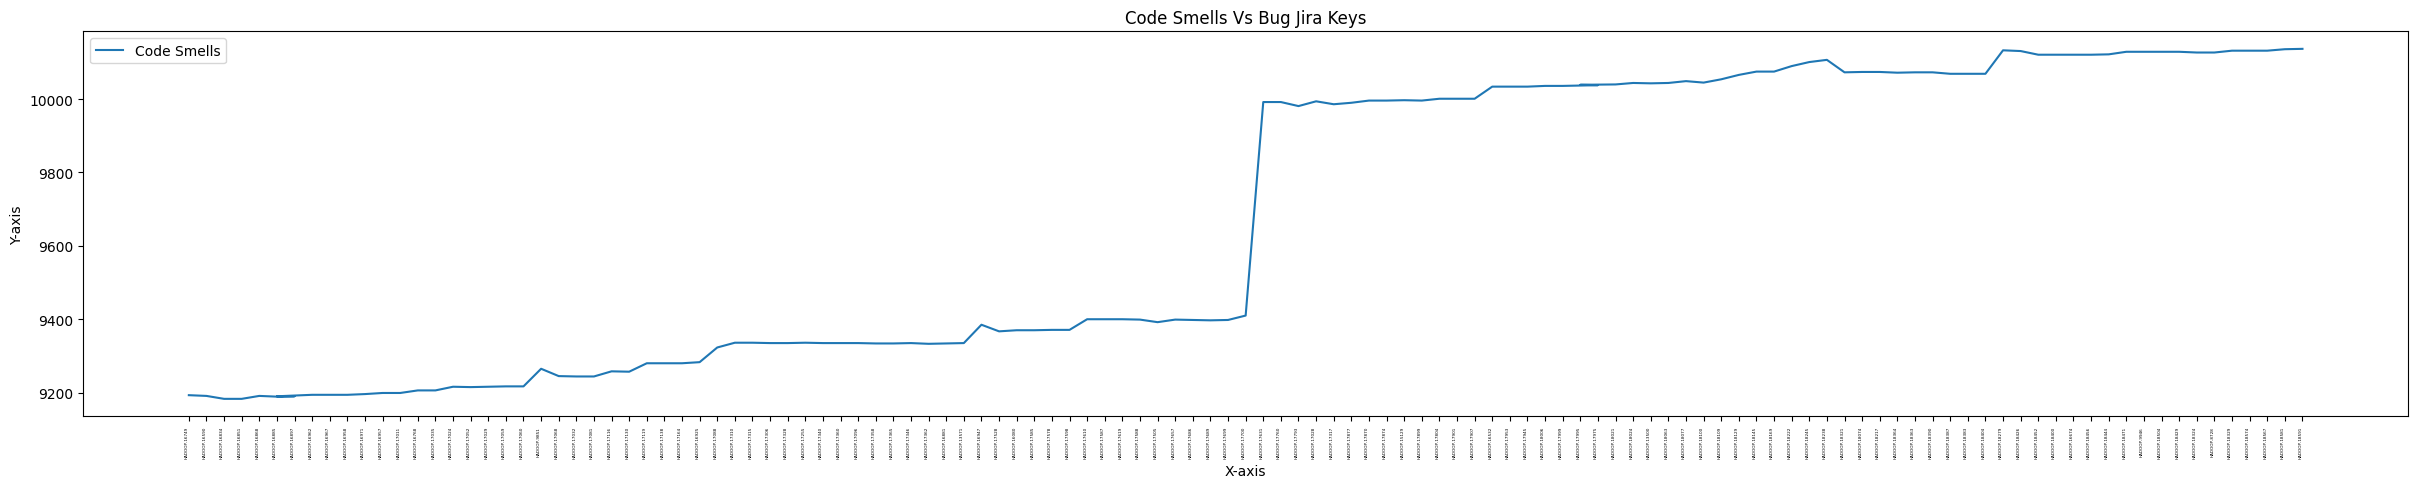

In [54]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_bug, code_smells_bug)

# Add labels to lines
ax.legend(['Code Smells'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Vs Bug Jira Keys')

# Display the graph
plt.show()


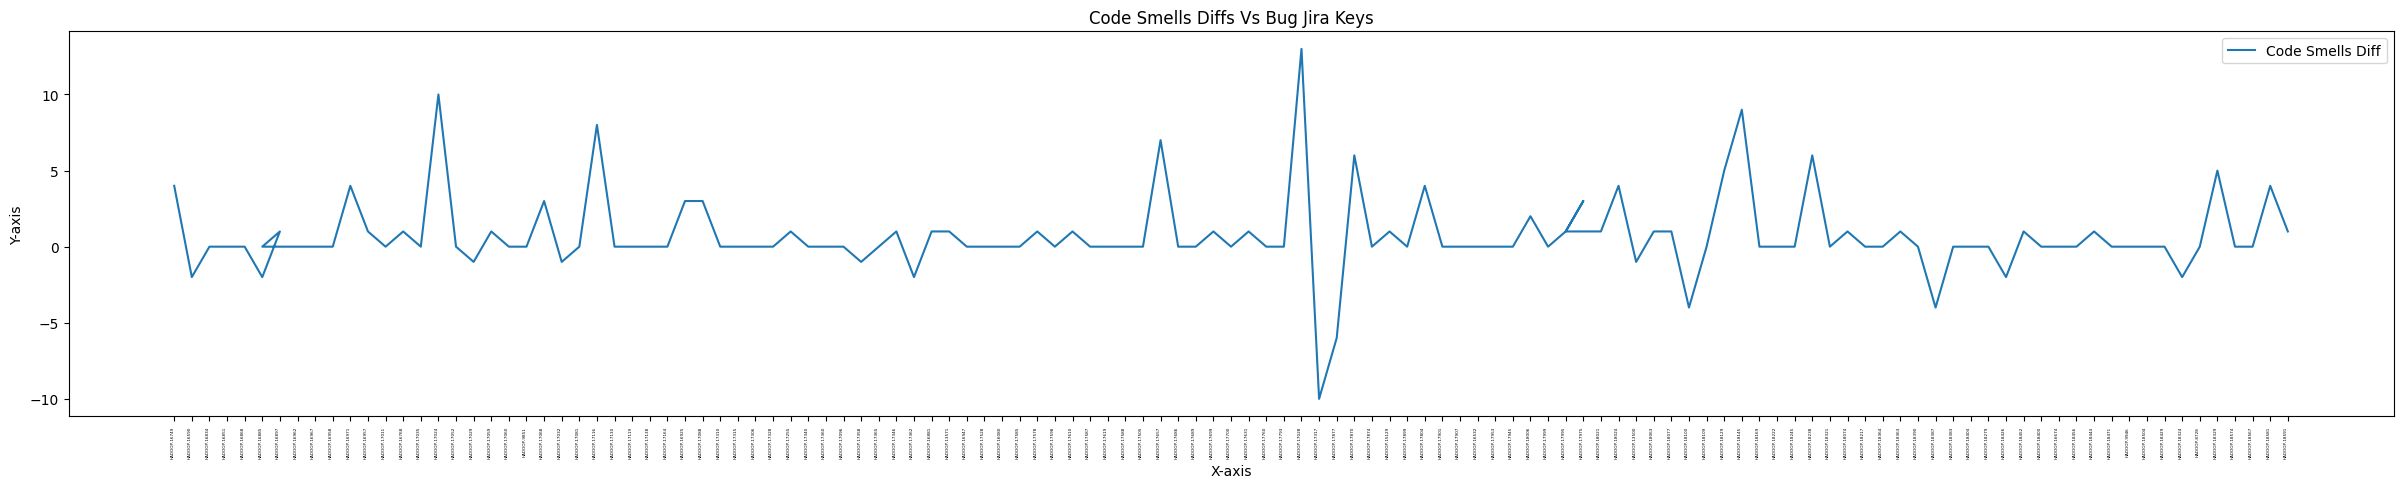

In [55]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_bug, code_smells_diff_bug)

# Add labels to lines
ax.legend(['Code Smells Diff'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Diffs Vs Bug Jira Keys')

# Display the graph
plt.show()


In [56]:
jira_issue_key_bug, code_smells_density_bug

(31      HADOOP-16749
 34      HADOOP-16590
 477     HADOOP-16834
 481     HADOOP-16851
 523     HADOOP-16868
             ...     
 5741    HADOOP-18329
 5756    HADOOP-18574
 5761    HADOOP-18567
 5767    HADOOP-18581
 5770    HADOOP-18591
 Name: jira issue key, Length: 123, dtype: object,
 31      0.0009080590238
 34       -0.00138121547
 477                   0
 481                   0
 523                   0
              ...       
 5741      0.01136363636
 5756                  0
 5761                  0
 5767    0.0008982708287
 5770      0.01282051282
 Name: code_smell_density, Length: 123, dtype: object)

In [57]:
type(code_smells_density_bug.loc[31])

str

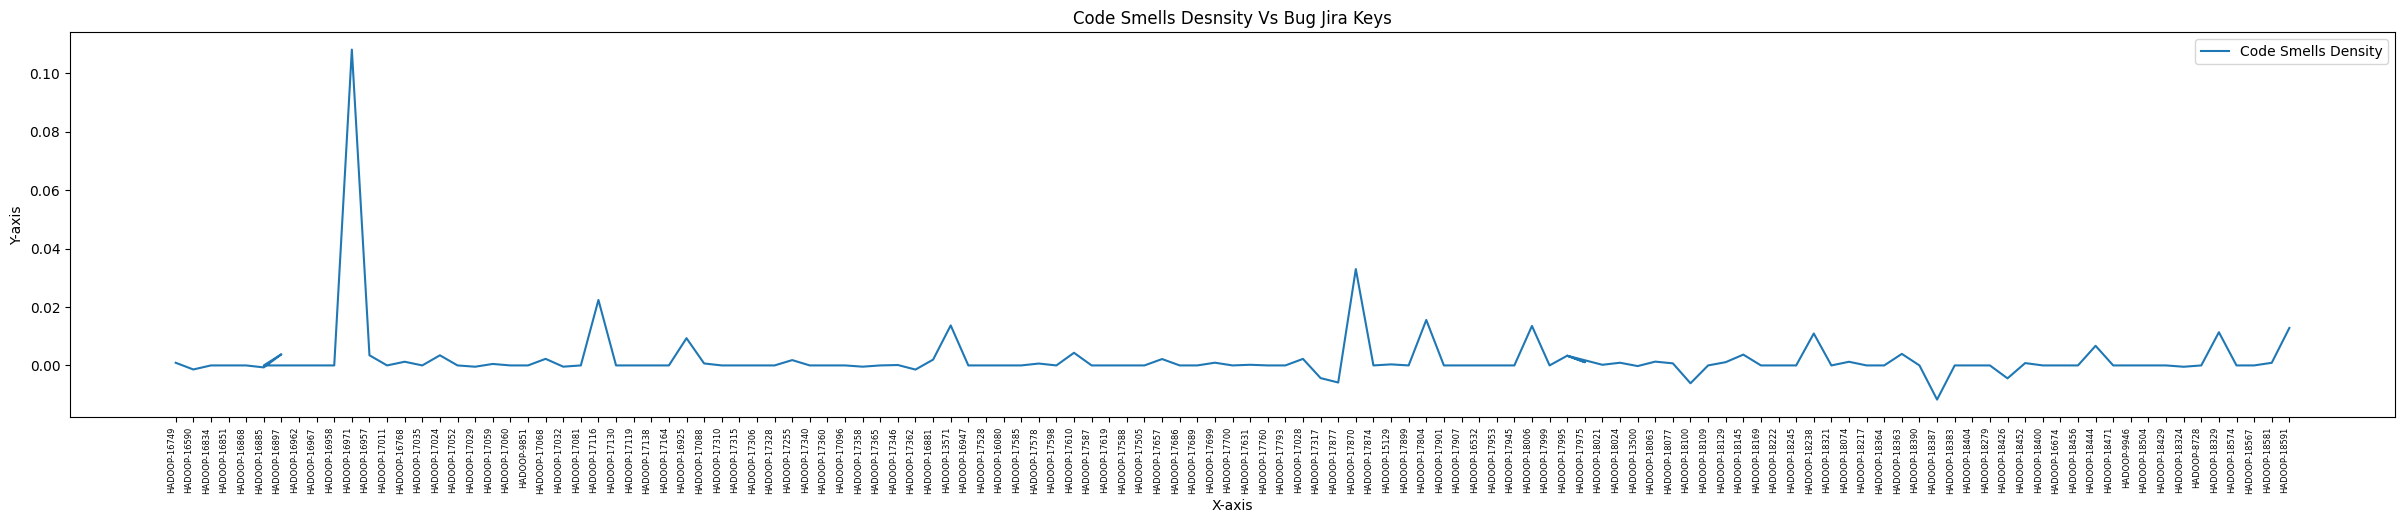

In [58]:
# Create a figure and axis object
plt.rcParams['figure.figsize'] = [30, 5]

fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_bug, code_smells_density_bug.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Desnsity Vs Bug Jira Keys')

# Display the graph
plt.show()


# New Feature

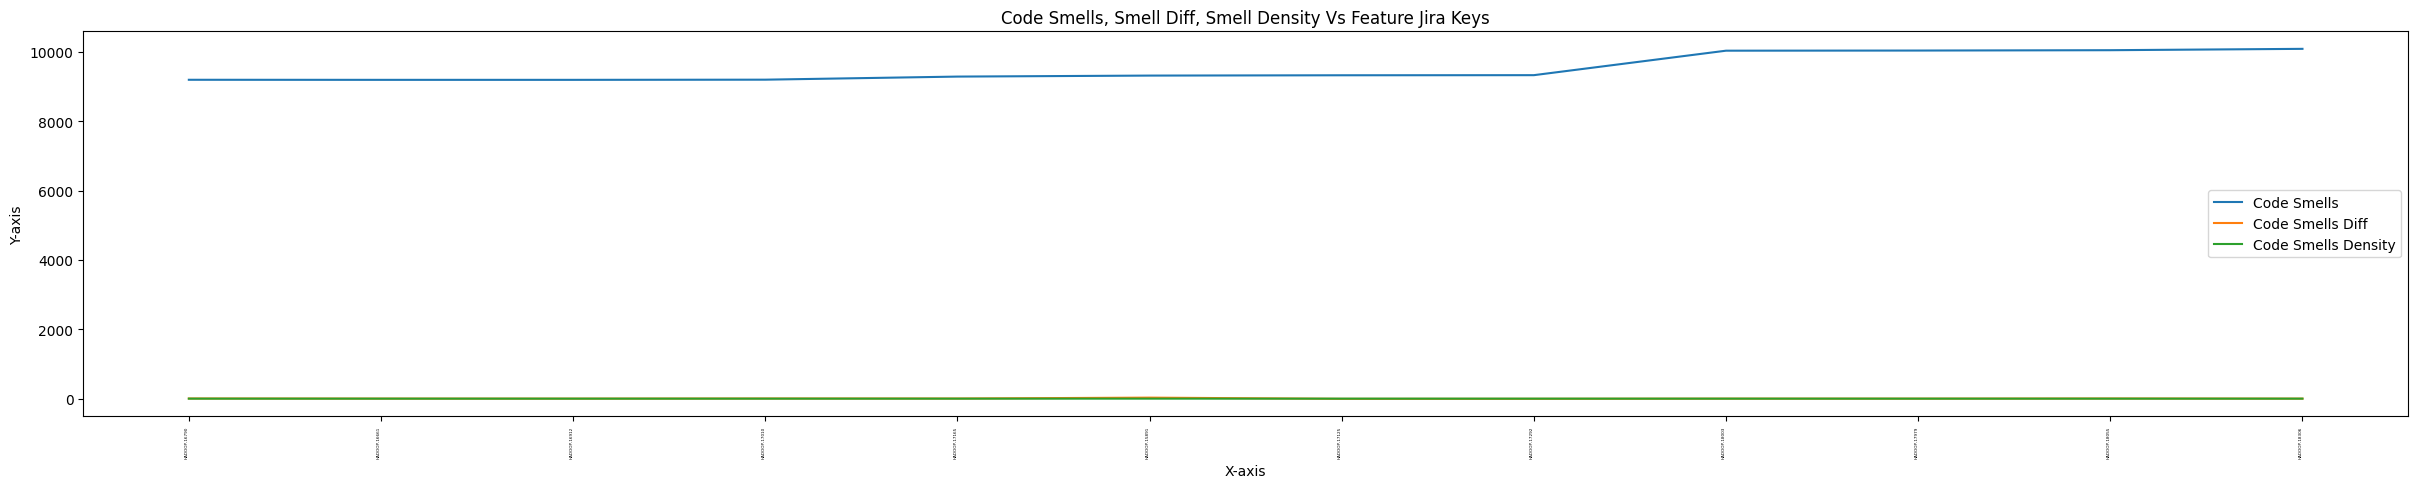

In [59]:
# Create a figure and axis object
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [30, 5]

# Plot the data as a line graph

ax.plot(jira_issue_key_feature, code_smells_feature)
ax.plot(jira_issue_key_feature, code_smells_diff_feature)
ax.plot(jira_issue_key_feature, code_smells_density_feature.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Code Smells', 'Code Smells Diff', 'Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells, Smell Diff, Smell Density Vs Feature Jira Keys')

# Display the graph
plt.show()


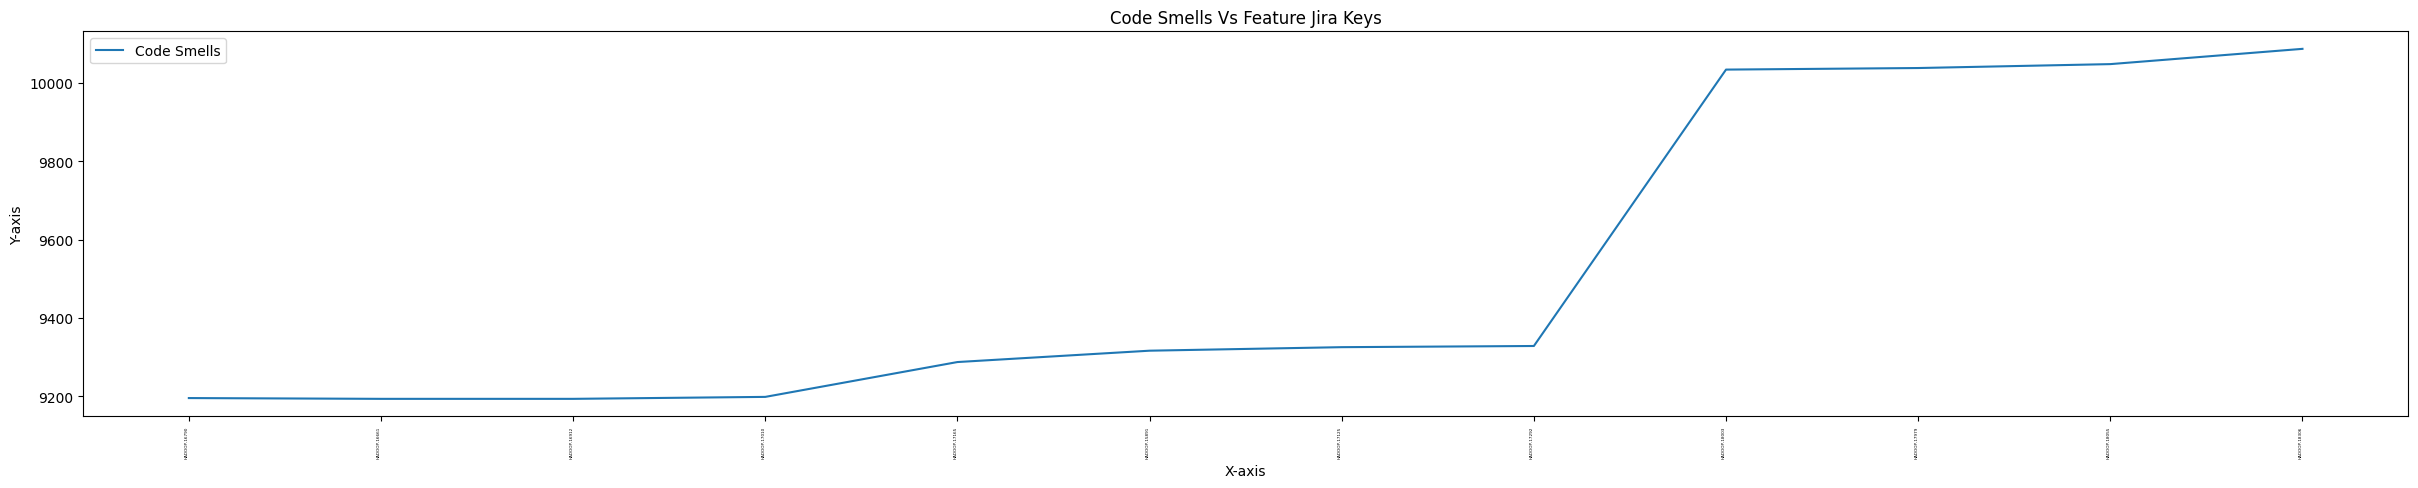

In [60]:
# Create a figure and axis object
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [30, 5]

# Plot the data as a line graph
ax.plot(jira_issue_key_feature, code_smells_feature)

# Add labels to lines
ax.legend(['Code Smells'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Vs Feature Jira Keys')

# Display the graph
plt.show()


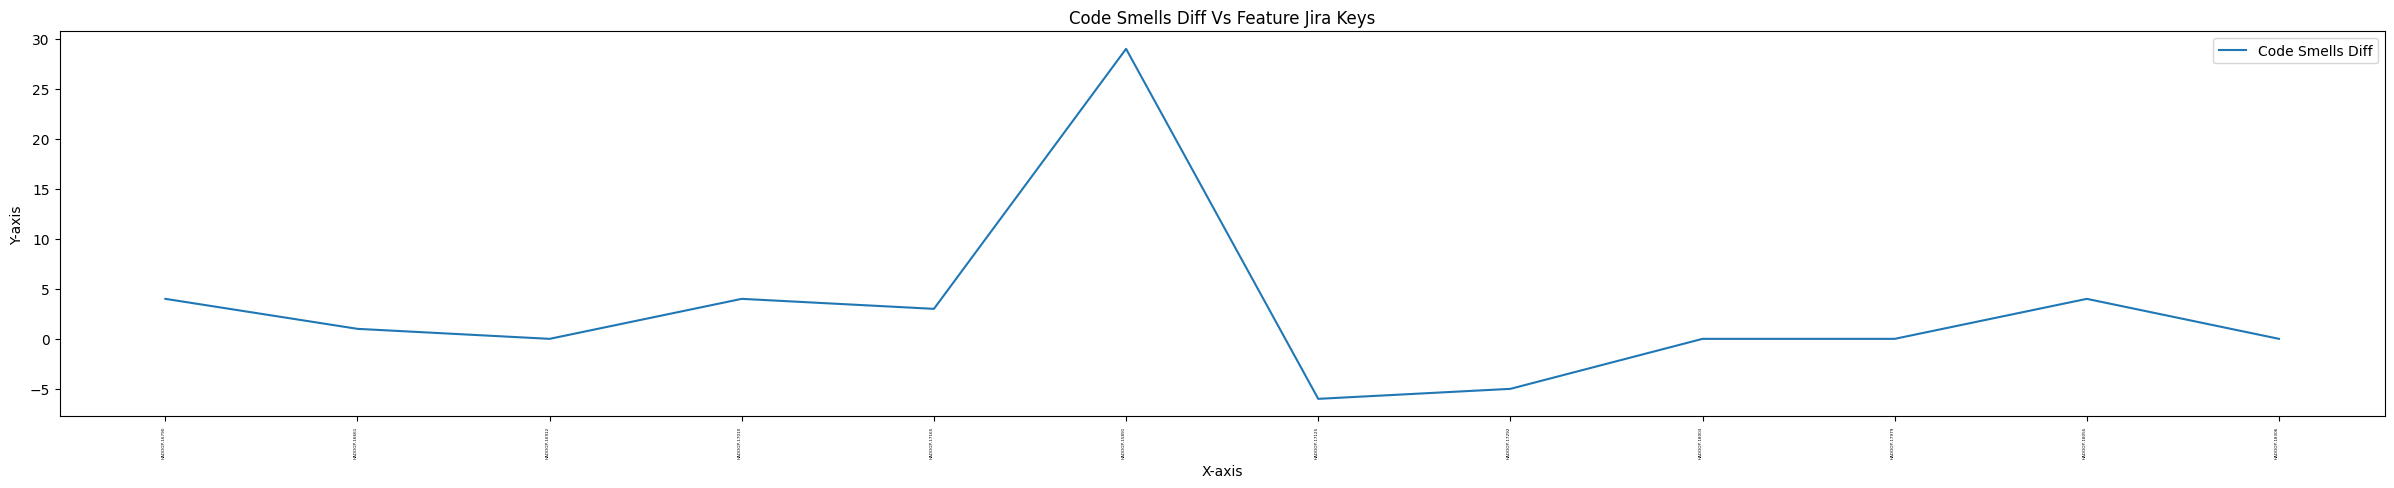

In [61]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_feature, code_smells_diff_feature)

# Add labels to lines
ax.legend(['Code Smells Diff'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Diff Vs Feature Jira Keys')

# Display the graph
plt.show()


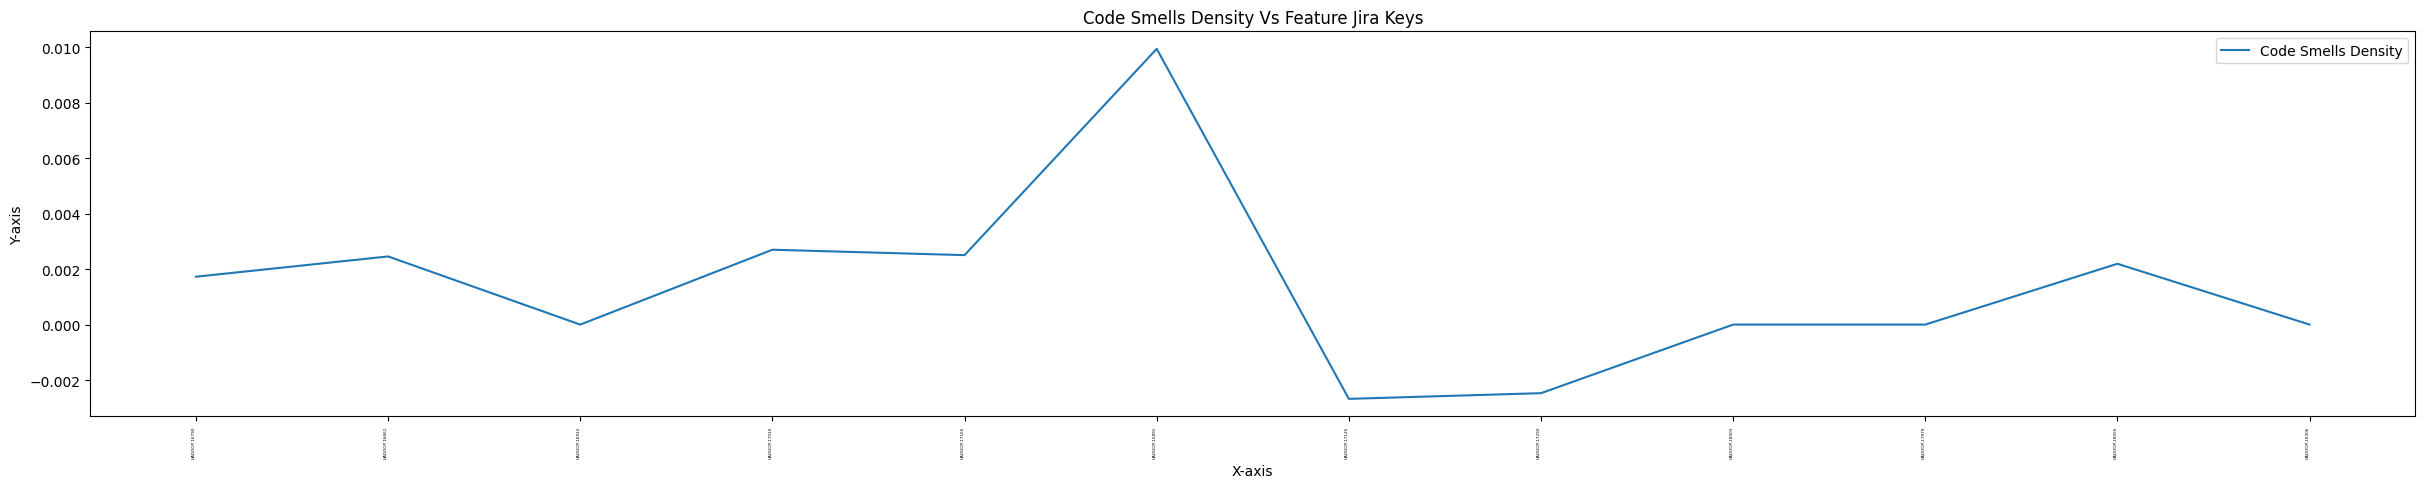

In [62]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_feature, code_smells_density_feature.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Density Vs Feature Jira Keys')

# Display the graph
plt.show()


# Improvement

ValueError: could not convert string to float: '#DIV/0!'

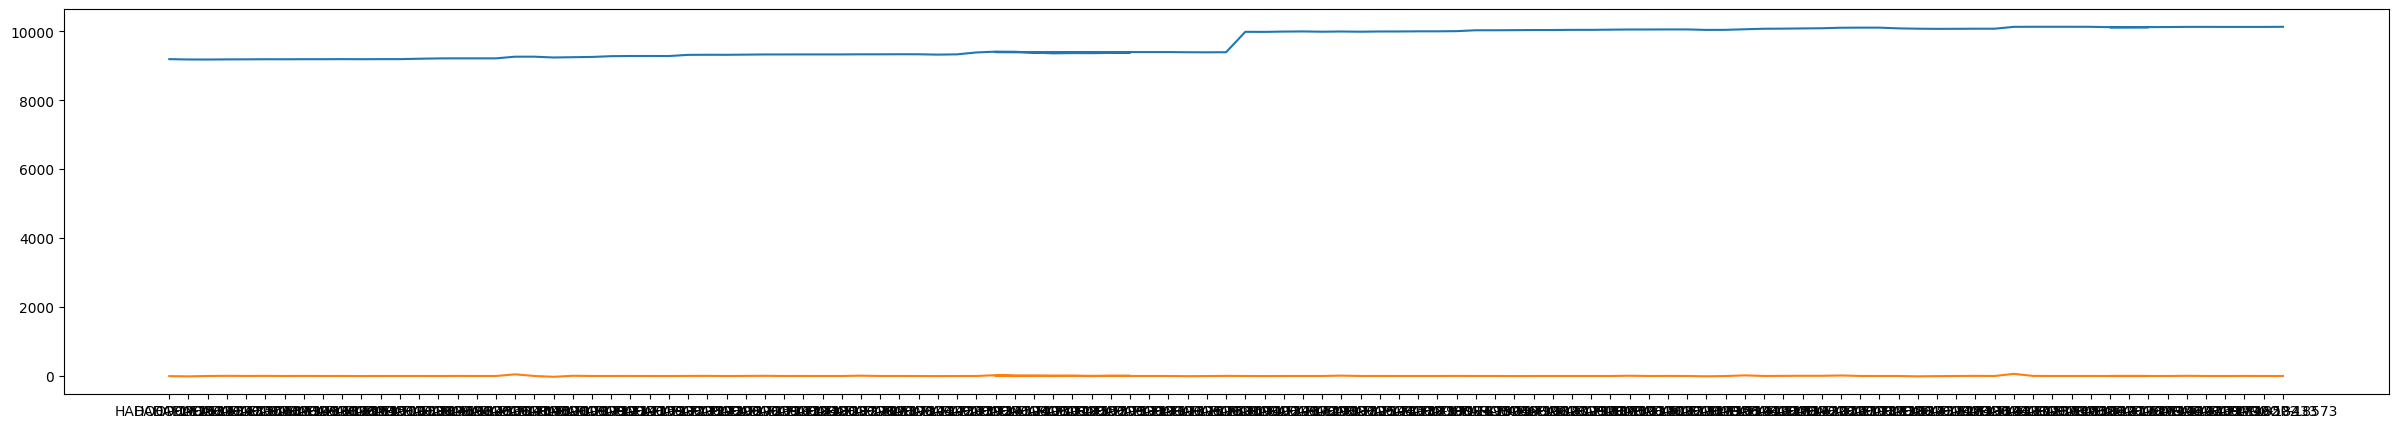

In [64]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_improvement, code_smells_improvement)
ax.plot(jira_issue_key_improvement, code_smells_diff_improvement)
ax.plot(jira_issue_key_improvement, code_smells_density_improvement.apply(lambda x: float(x)))

# Add labels to lines
#ax.legend(['Code Smells', 'Code Smells Diff', 'Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Density Vs Improvement Jira Key')

# Display the graph
plt.show()


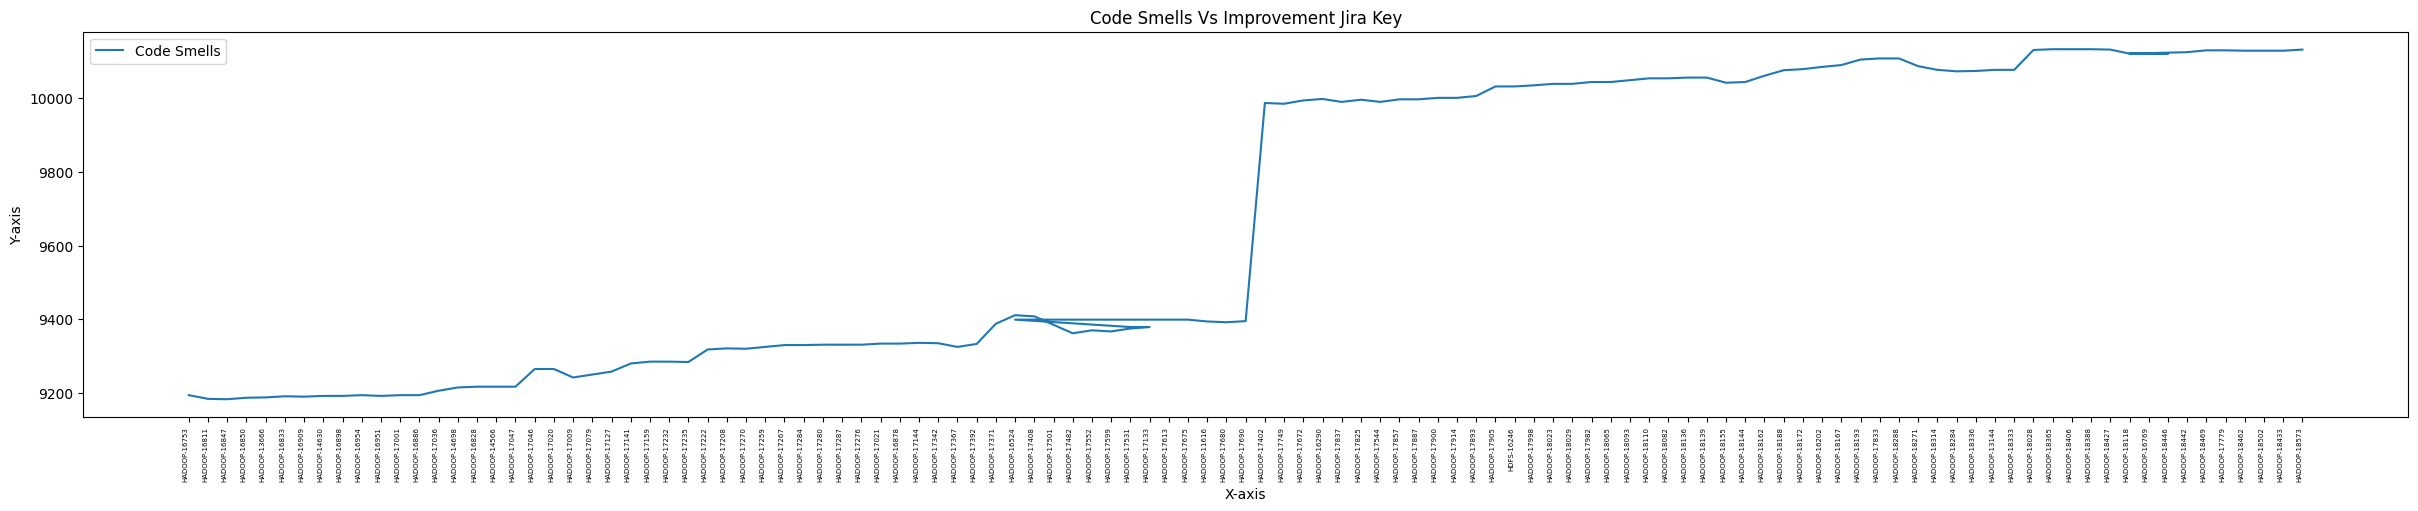

In [65]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_improvement, code_smells_improvement)

# Add labels to lines
ax.legend(['Code Smells'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Vs Improvement Jira Key')

# Display the graph
plt.show()


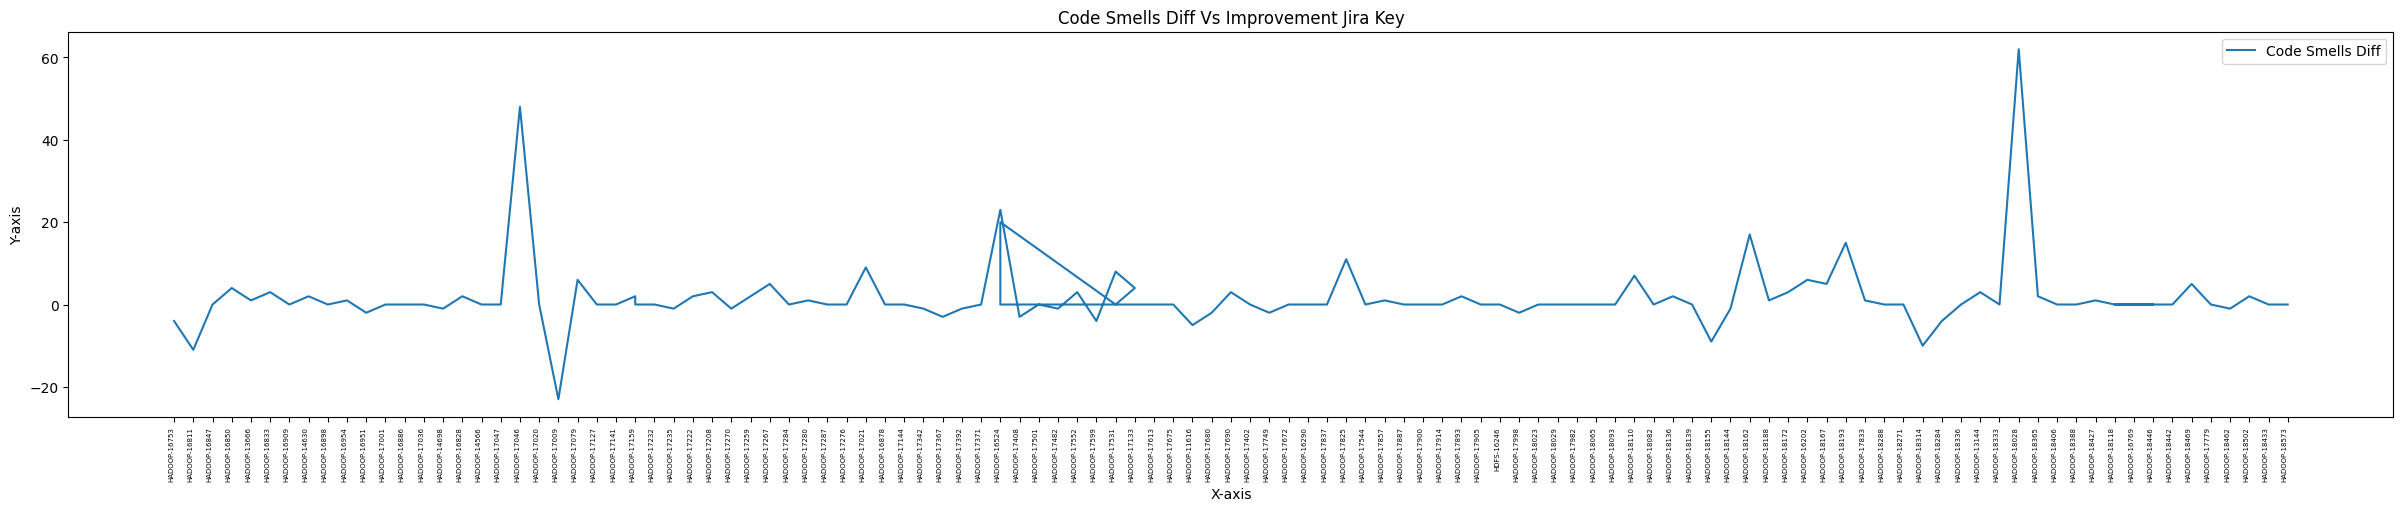

In [66]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_improvement, code_smells_diff_improvement)

# Add labels to lines
ax.legend(['Code Smells Diff'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Diff Vs Improvement Jira Key')

# Display the graph
plt.show()


# Test

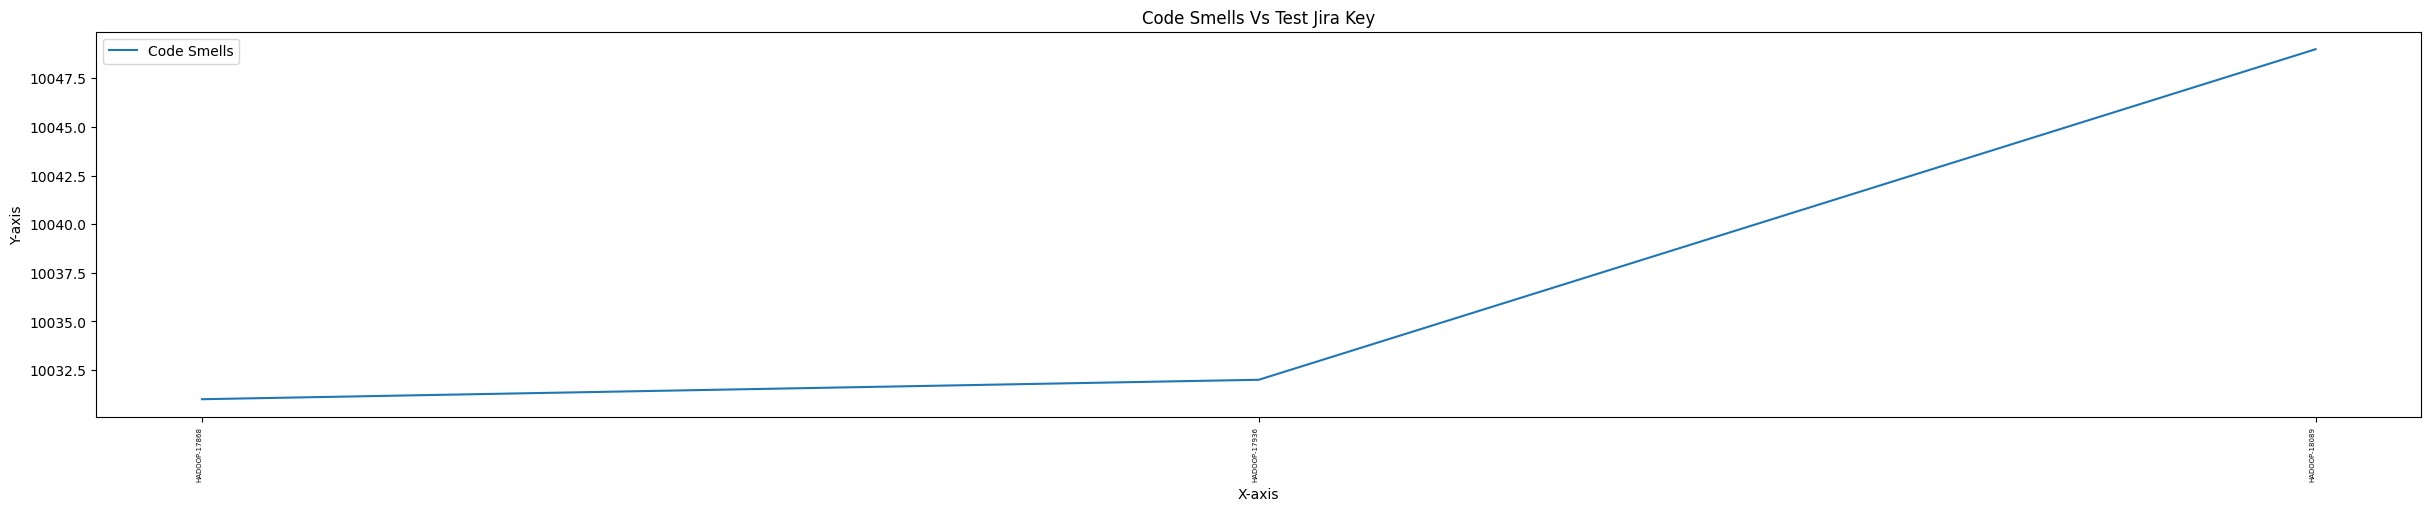

In [67]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_test, code_smells_test)

# Add labels to lines
ax.legend(['Code Smells'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Vs Test Jira Key')

# Display the graph
plt.show()


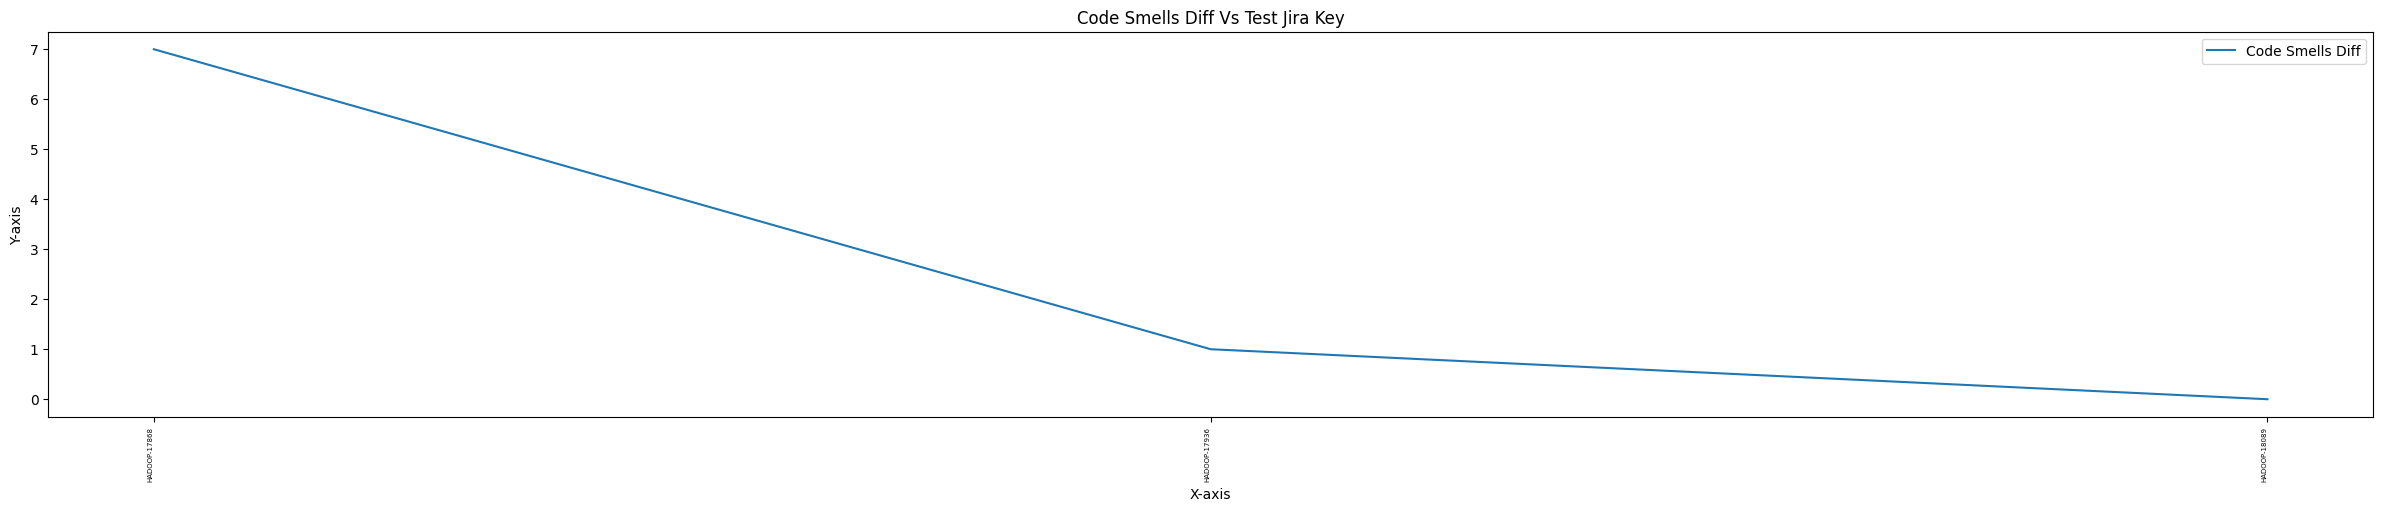

In [68]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_test, code_smells_diff_test)

# Add labels to lines
ax.legend(['Code Smells Diff'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Diff Vs Test Jira Key')

# Display the graph
plt.show()


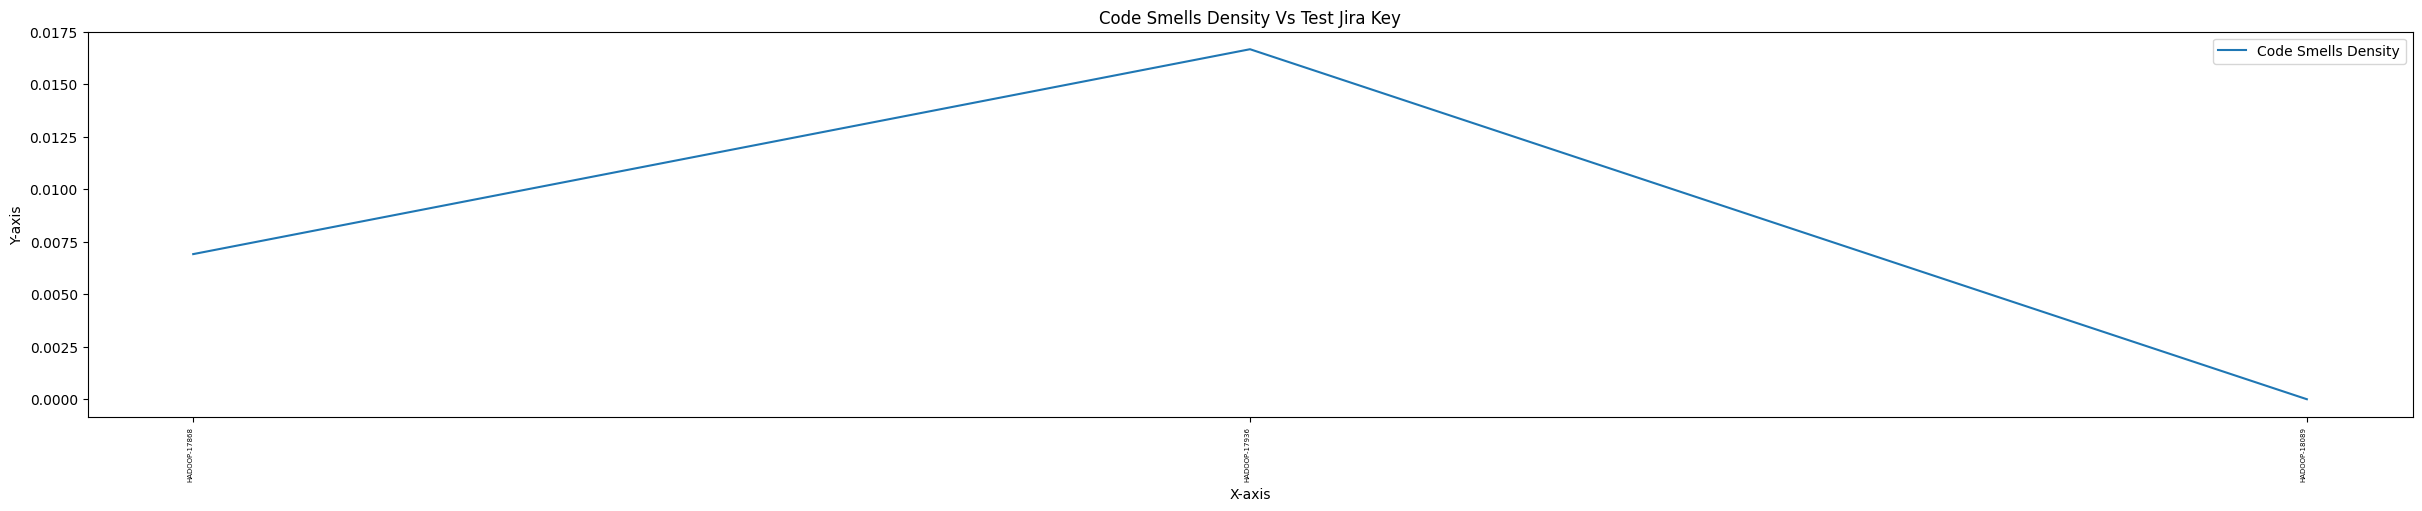

In [69]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_test, code_smells_density_test.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Density Vs Test Jira Key')

# Display the graph
plt.show()

# Wish

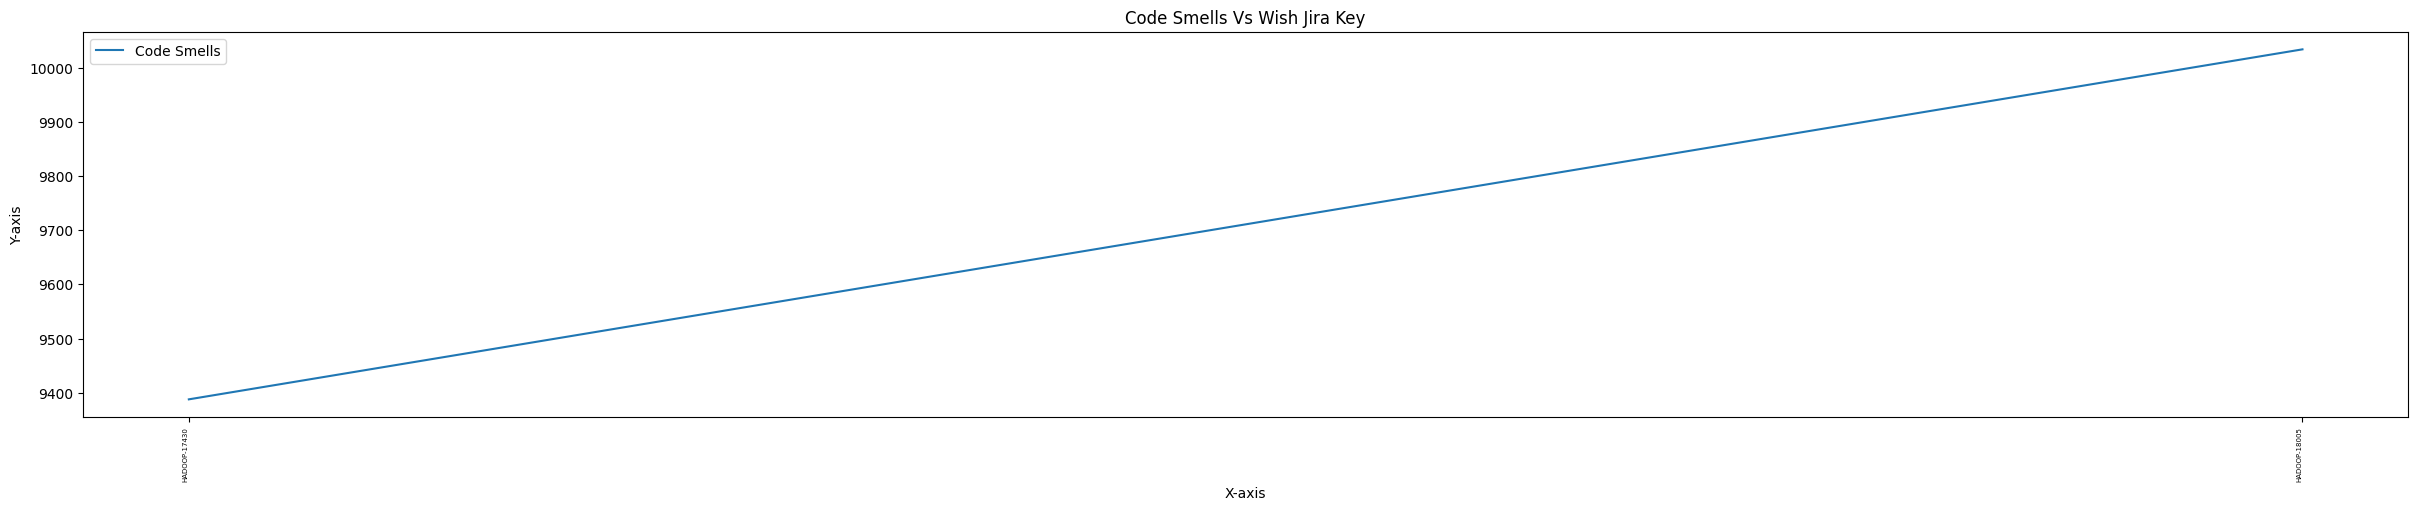

In [70]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_wish, code_smells_wish)

# Add labels to lines
ax.legend(['Code Smells'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Vs Wish Jira Key')

# Display the graph
plt.show()


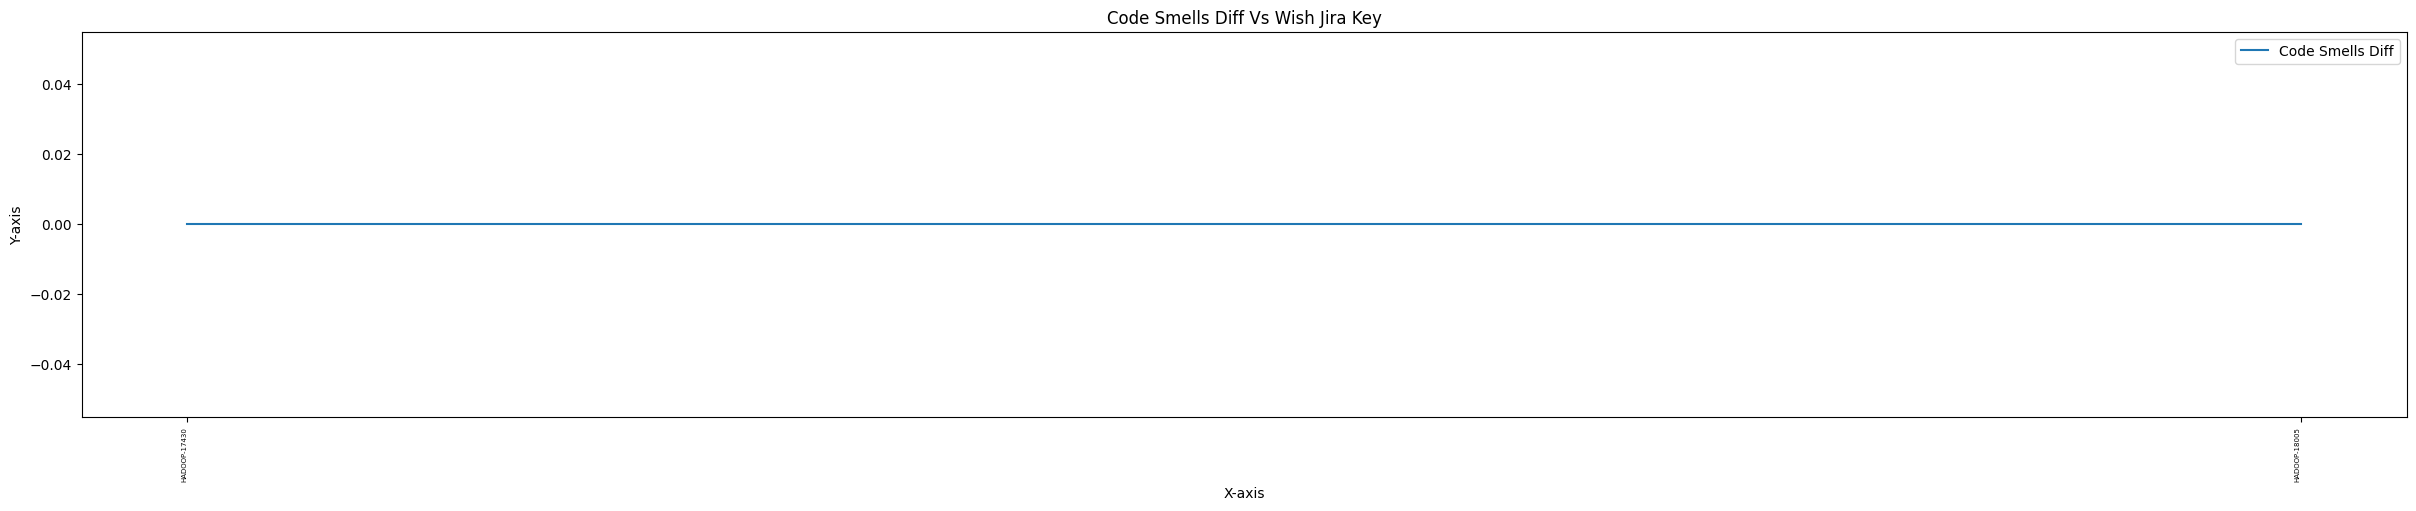

In [71]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_wish, code_smells_diff_wish)

# Add labels to lines
ax.legend(['Code Smells Diff'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Diff Vs Wish Jira Key')

# Display the graph
plt.show()


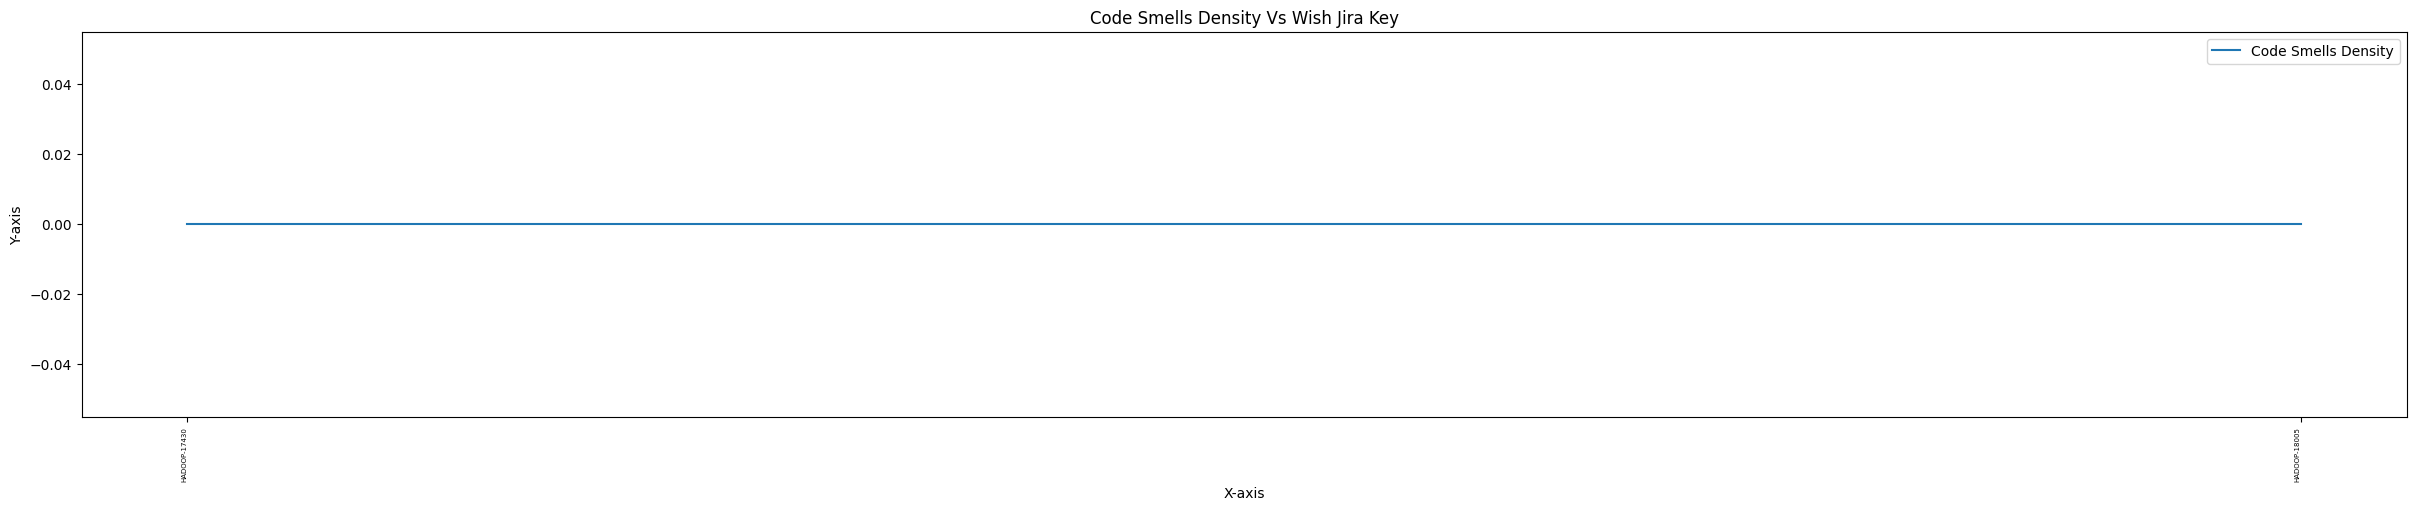

In [72]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_wish, code_smells_density_wish.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Density Vs Wish Jira Key')

# Display the graph
plt.show()


# Task


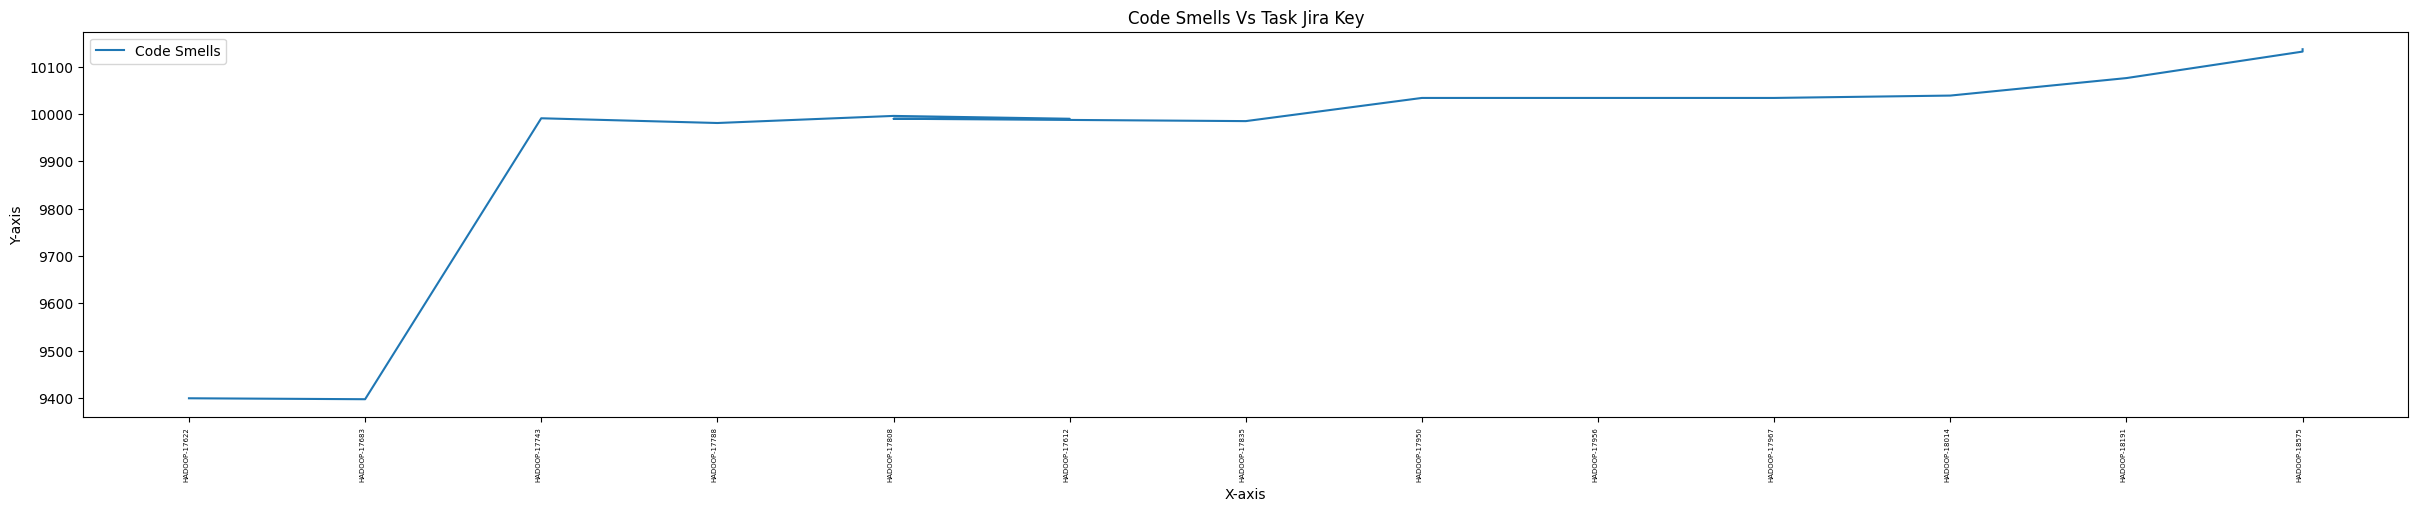

In [73]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_task, code_smells_task)

# Add labels to lines
ax.legend(['Code Smells'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Vs Task Jira Key')

# Display the graph
plt.show()


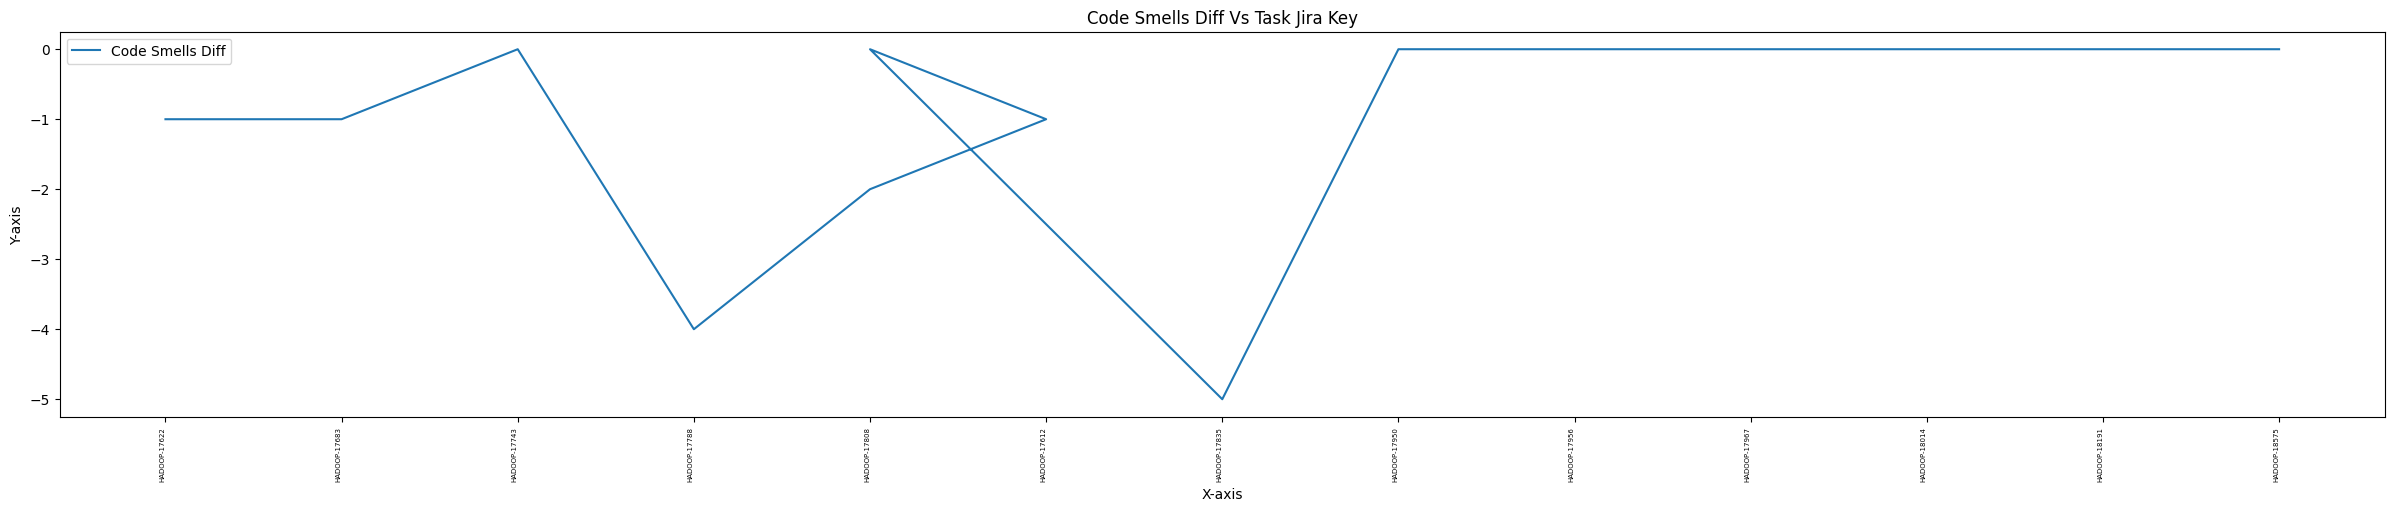

In [74]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_task, code_smells_diff_task)

# Add labels to lines
ax.legend(['Code Smells Diff'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Diff Vs Task Jira Key')

# Display the graph
plt.show()


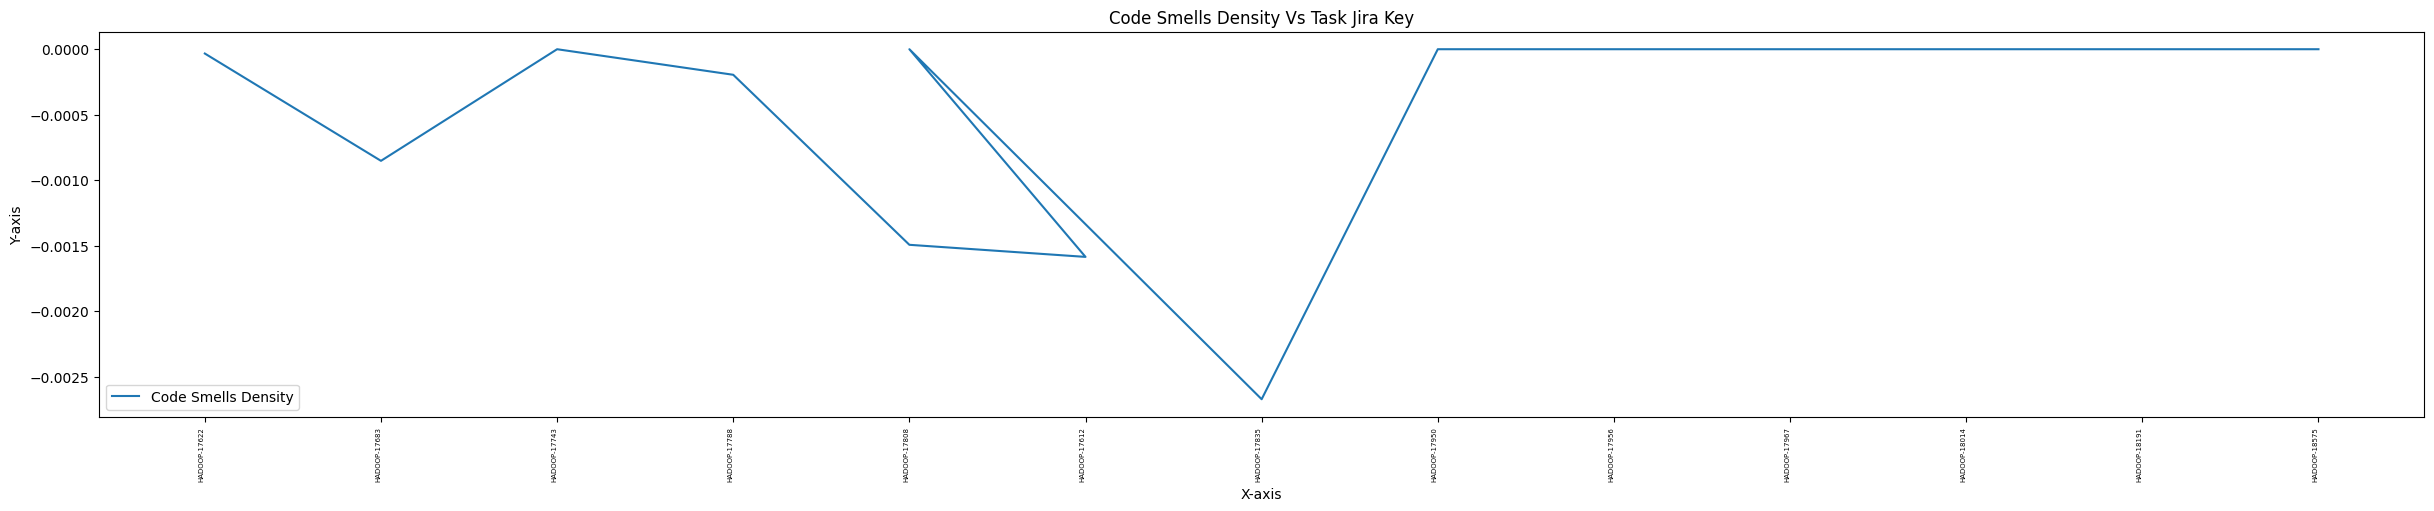

In [75]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_task, code_smells_density_task.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Density Vs Task Jira Key')

# Display the graph
plt.show()


# Sub Task

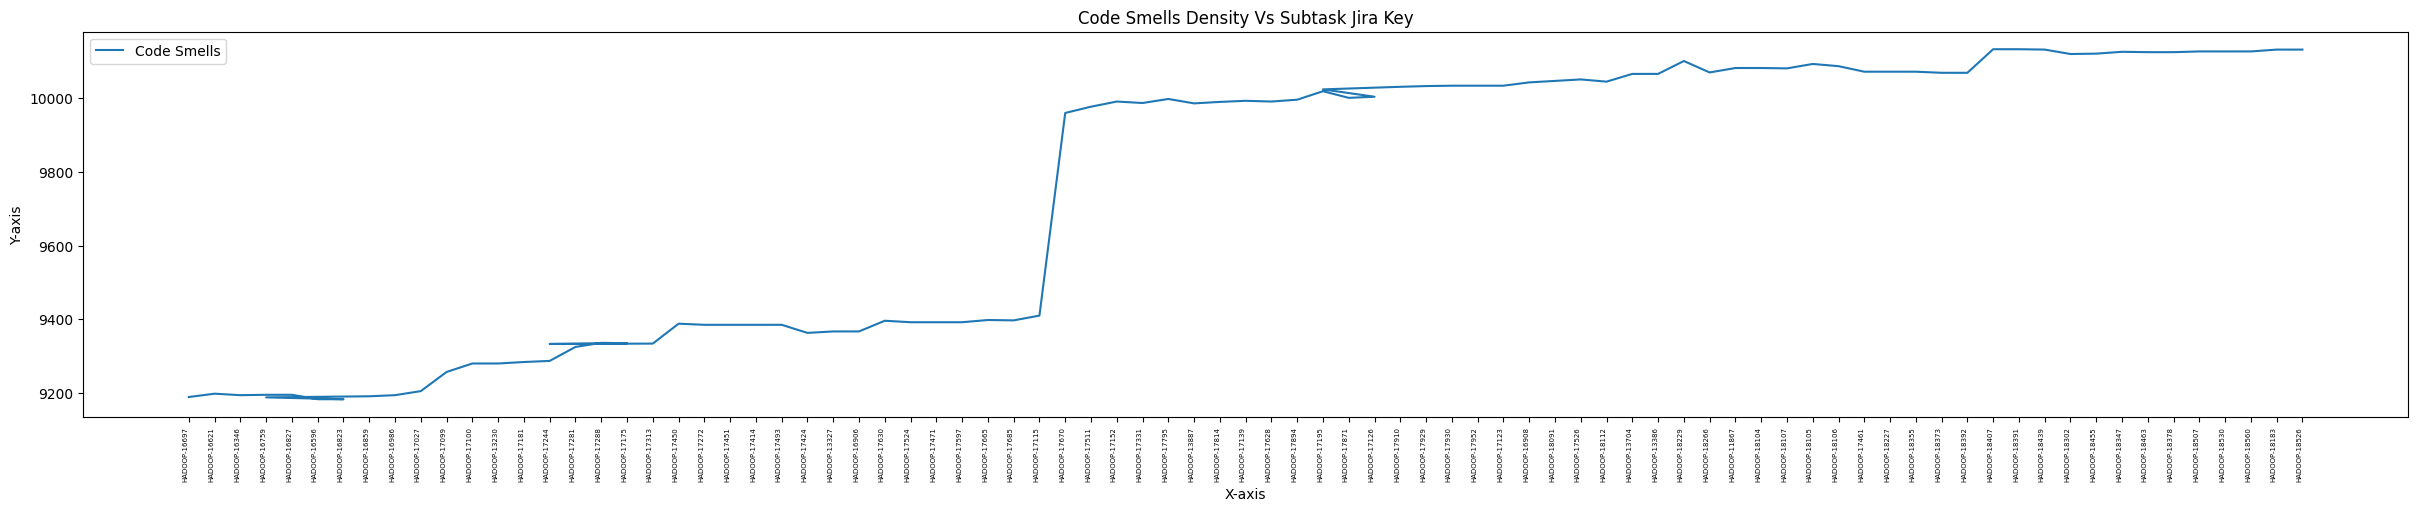

In [76]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_subtask, code_smells_subtask)

# Add labels to lines
ax.legend(['Code Smells'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Density Vs Subtask Jira Key')

# Display the graph
plt.show()


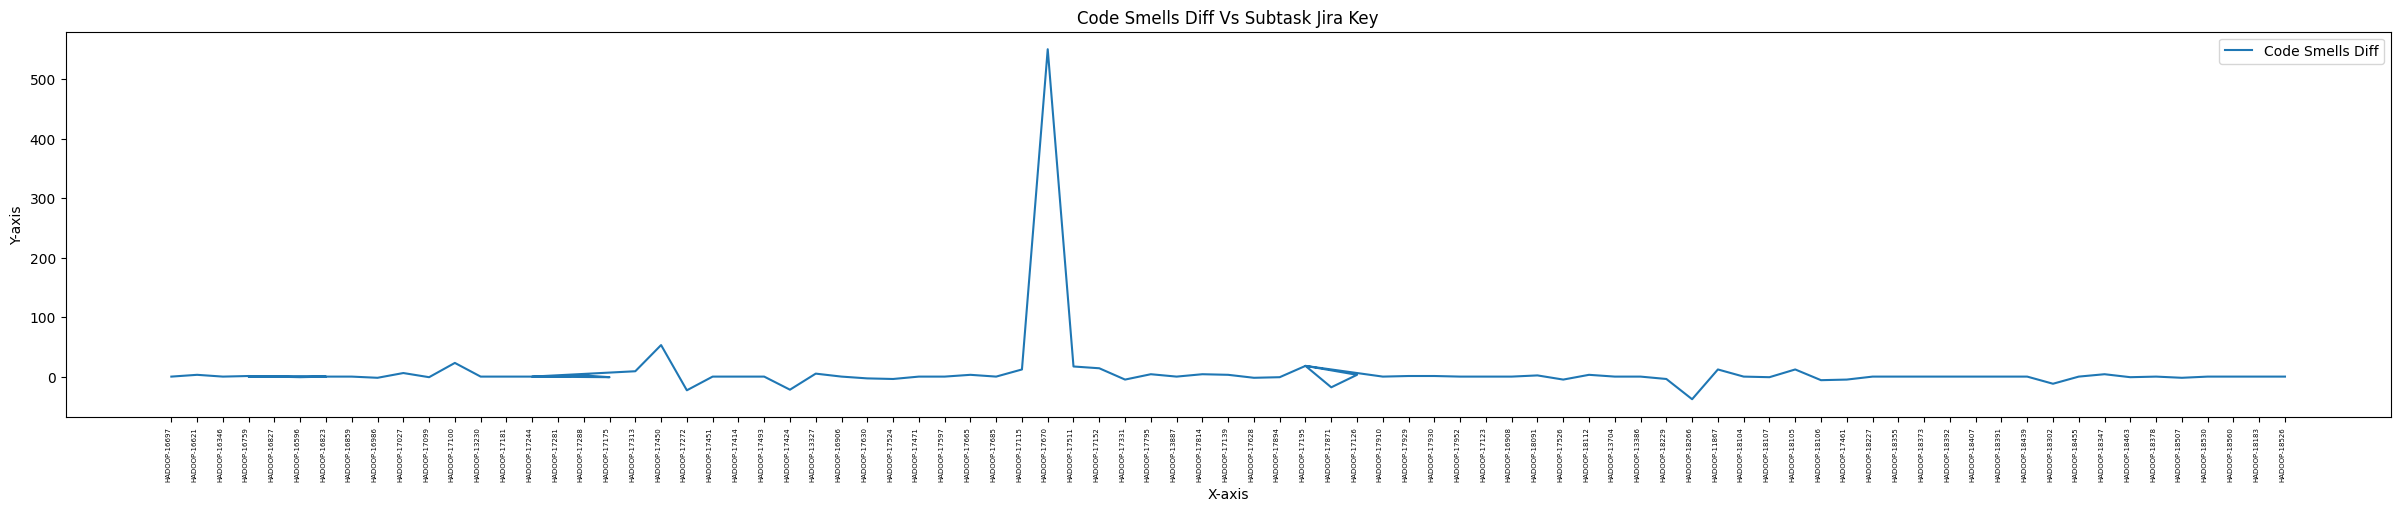

In [77]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_subtask, code_smells_diff_subtask)

# Add labels to lines
ax.legend(['Code Smells Diff'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Diff Vs Subtask Jira Key')

# Display the graph
plt.show()

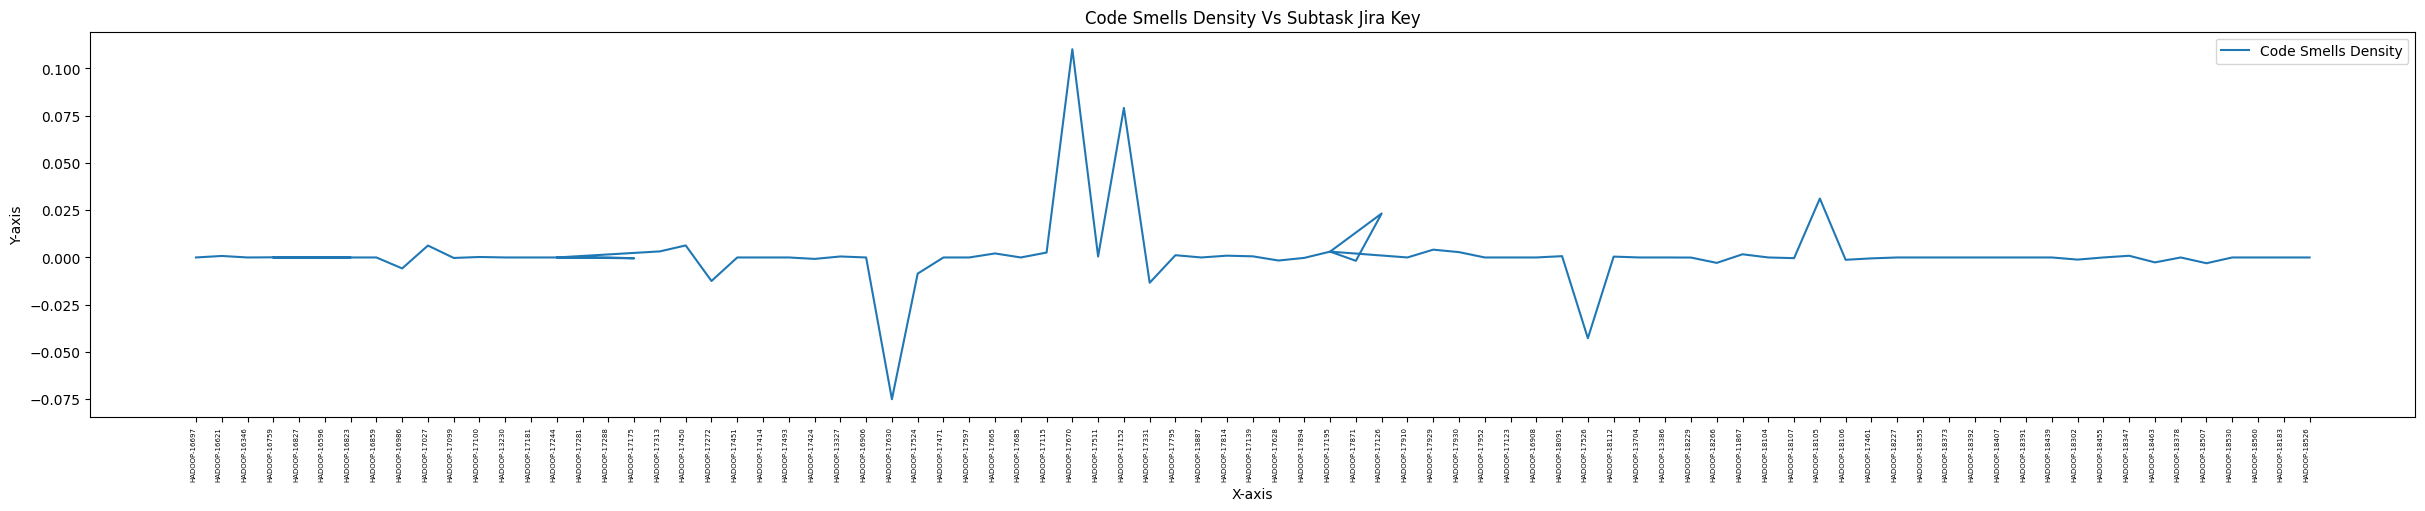

In [78]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_subtask, code_smells_density_subtask.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=5)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Code Smells Density Vs Subtask Jira Key')

# Display the graph
plt.show()


## Charts for added lines and deleted lines in Issue Types 

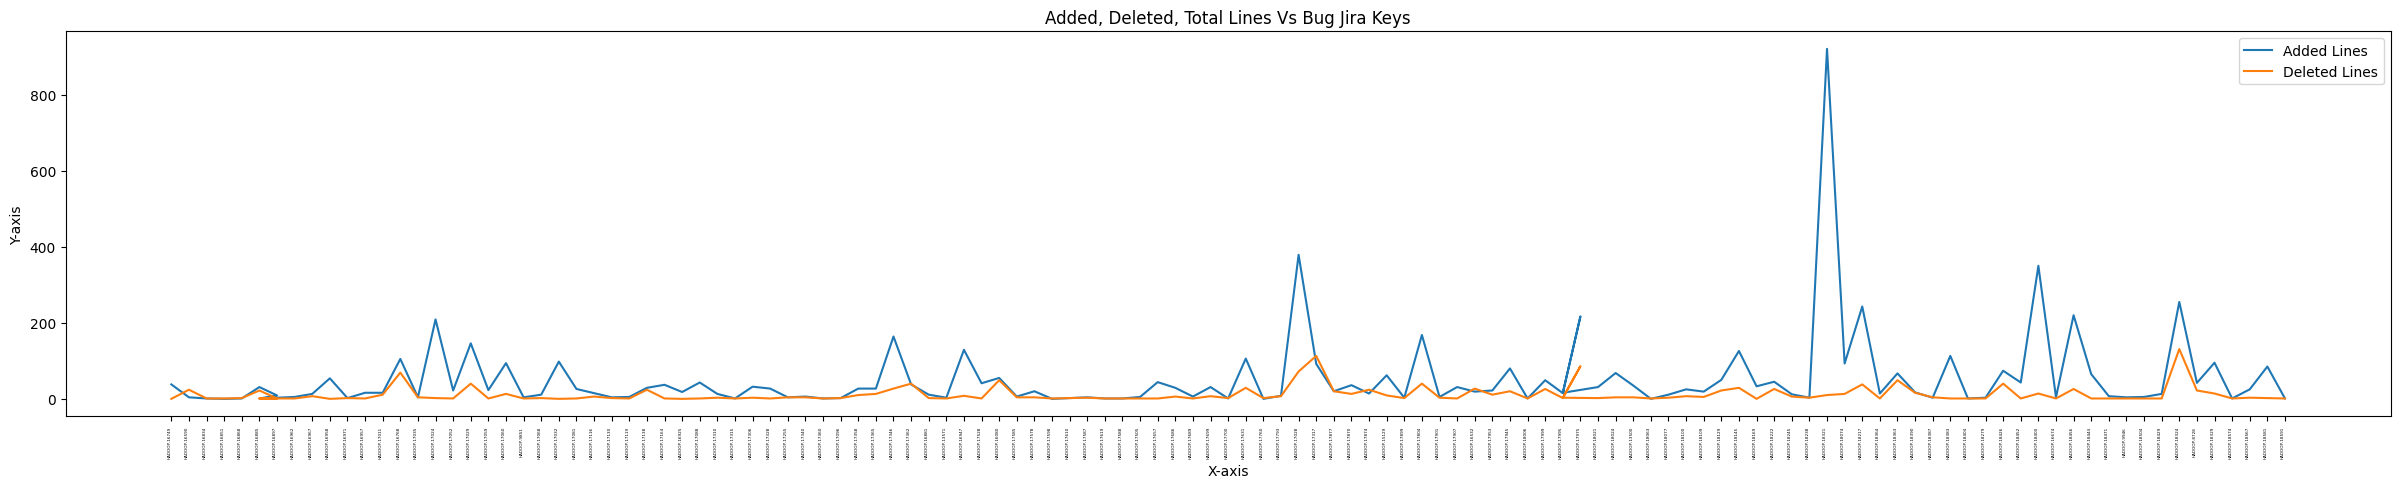

In [79]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_bug, added_lines_bug)
ax.plot(jira_issue_key_bug, deleted_lines_bug)
#ax.plot(jira_issue_key_bug, nloc_bug)
#ax.plot(jira_issue_key_bug, code_smells_bug)
#ax.plot(jira_issue_key_bug, code_smells_diff_bug)
#ax.plot(jira_issue_key_bug, code_smells_density_bug.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Added Lines', 'Deleted Lines', 'NLOC', 'Code Smells', 'Code Smells Diff', 'Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Added, Deleted, Total Lines Vs Bug Jira Keys')

# Display the graph
plt.show()

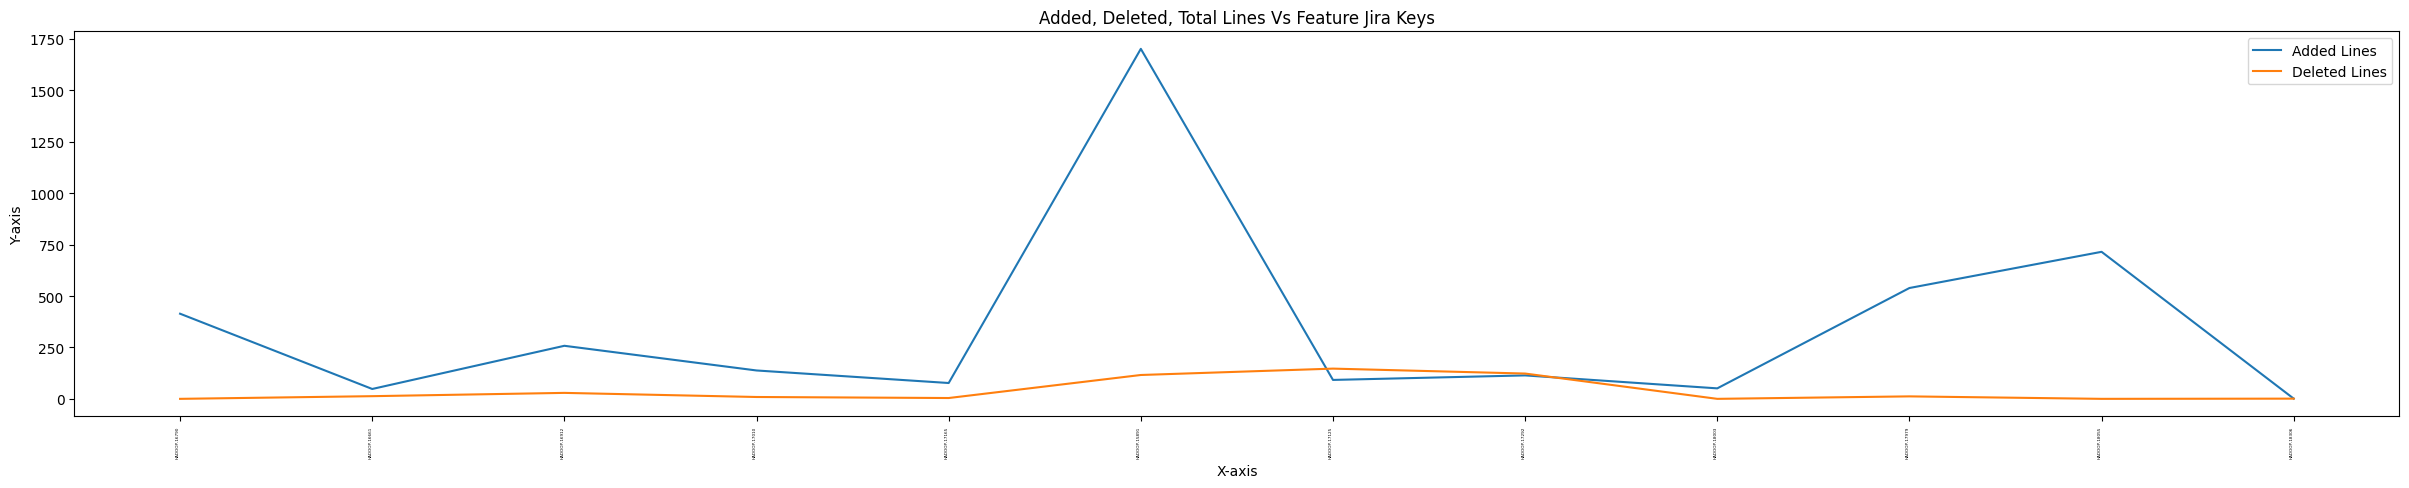

In [80]:
plt.rcParams['figure.figsize'] = [30, 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_feature, added_lines_feature)
ax.plot(jira_issue_key_feature, deleted_lines_feature)
#ax.plot(jira_issue_key_bug, nloc_bug)
#ax.plot(jira_issue_key_bug, code_smells_bug)
#ax.plot(jira_issue_key_bug, code_smells_diff_bug)
#ax.plot(jira_issue_key_bug, code_smells_density_bug.apply(lambda x: float(x)))

# Add labels to lines
ax.legend(['Added Lines', 'Deleted Lines', 'NLOC', 'Code Smells', 'Code Smells Diff', 'Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Added, Deleted, Total Lines Vs Feature Jira Keys')

# Display the graph
plt.show()

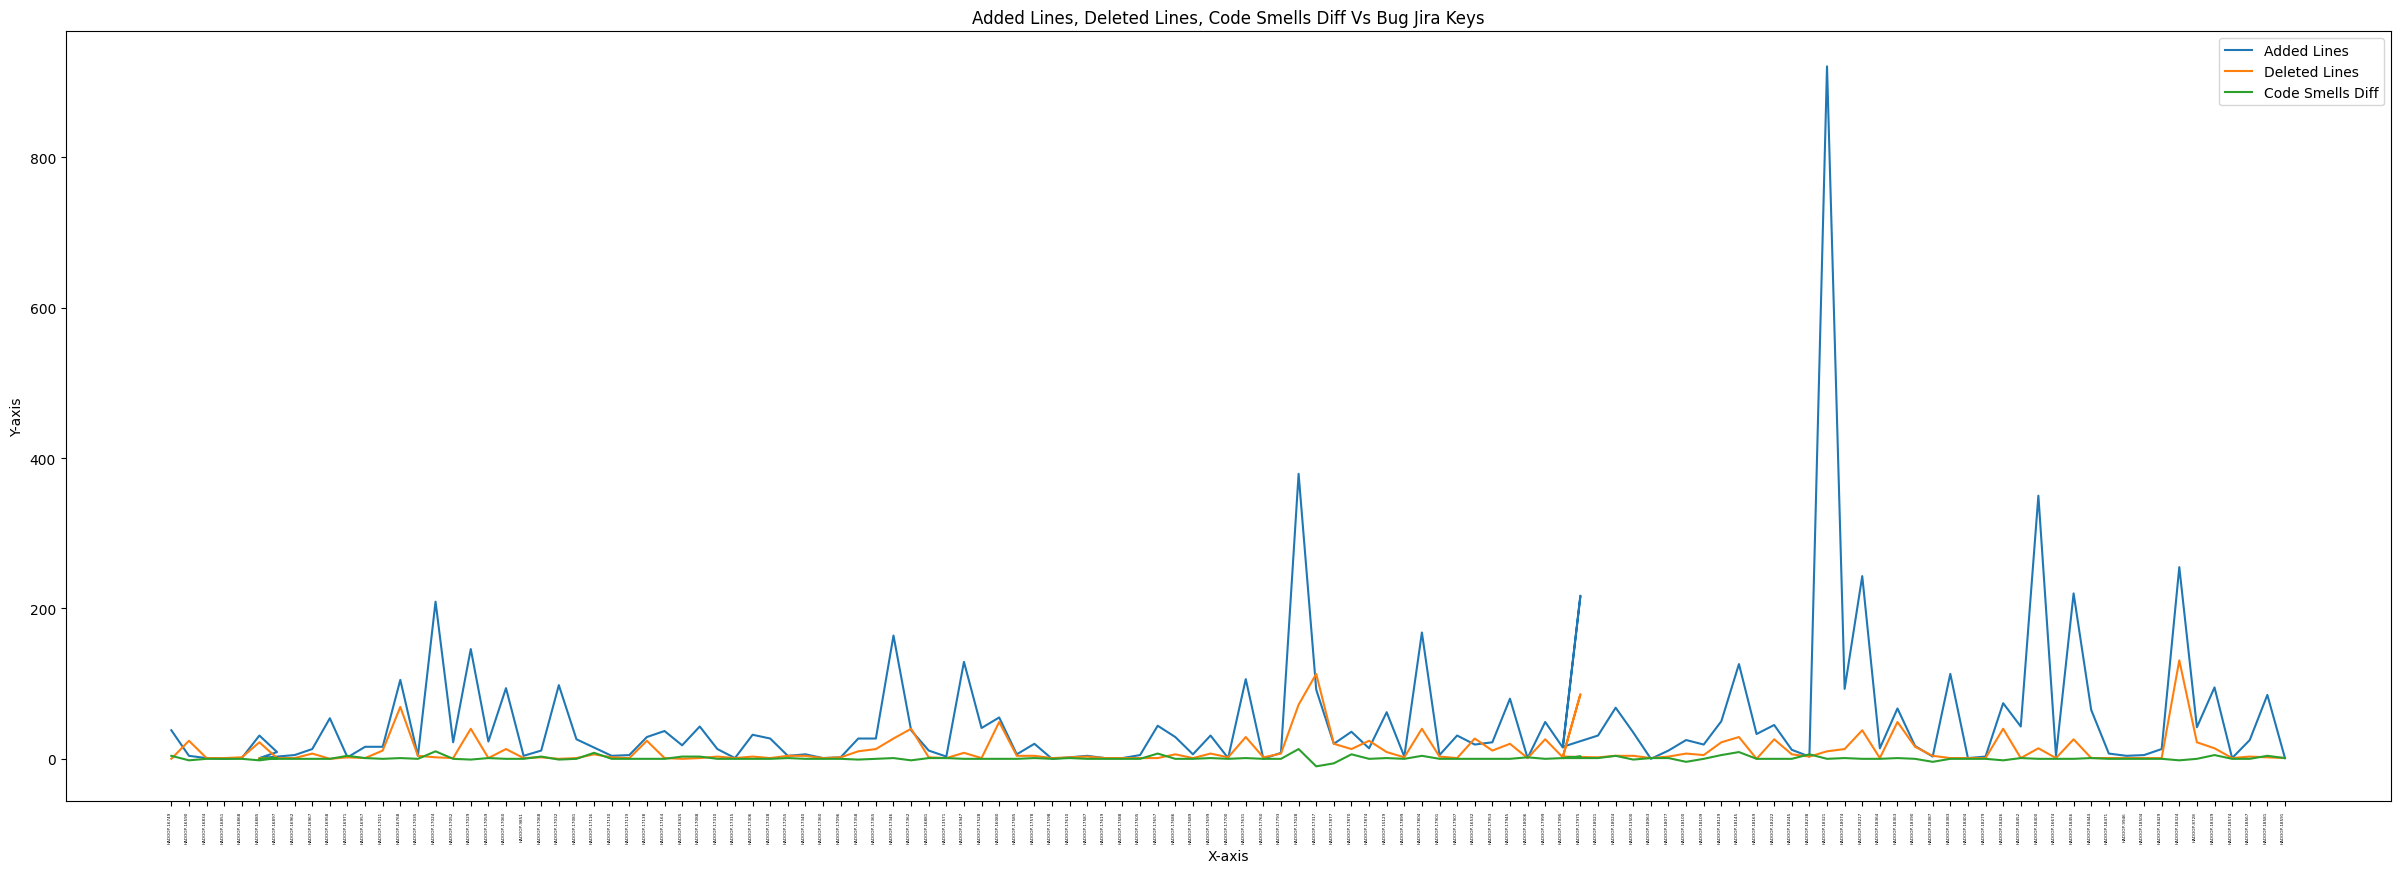

In [92]:
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_bug, added_lines_bug)
ax.plot(jira_issue_key_bug, deleted_lines_bug)
#ax.plot(jira_issue_key_feature, code_smells_feature)
ax.plot(jira_issue_key_bug, code_smells_diff_bug)
#ax.plot(jira_issue_key_feature, code_smells_density_feature.apply(lambda x: float(x)))
#ax.plot(jira_issue_key_bug, nloc_bug)

# Add labels to lines
ax.legend(['Added Lines', 'Deleted Lines', 'Code Smells Diff', 'Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Added Lines, Deleted Lines, Code Smells Diff Vs Bug Jira Keys')

# Display the graph
plt.show()

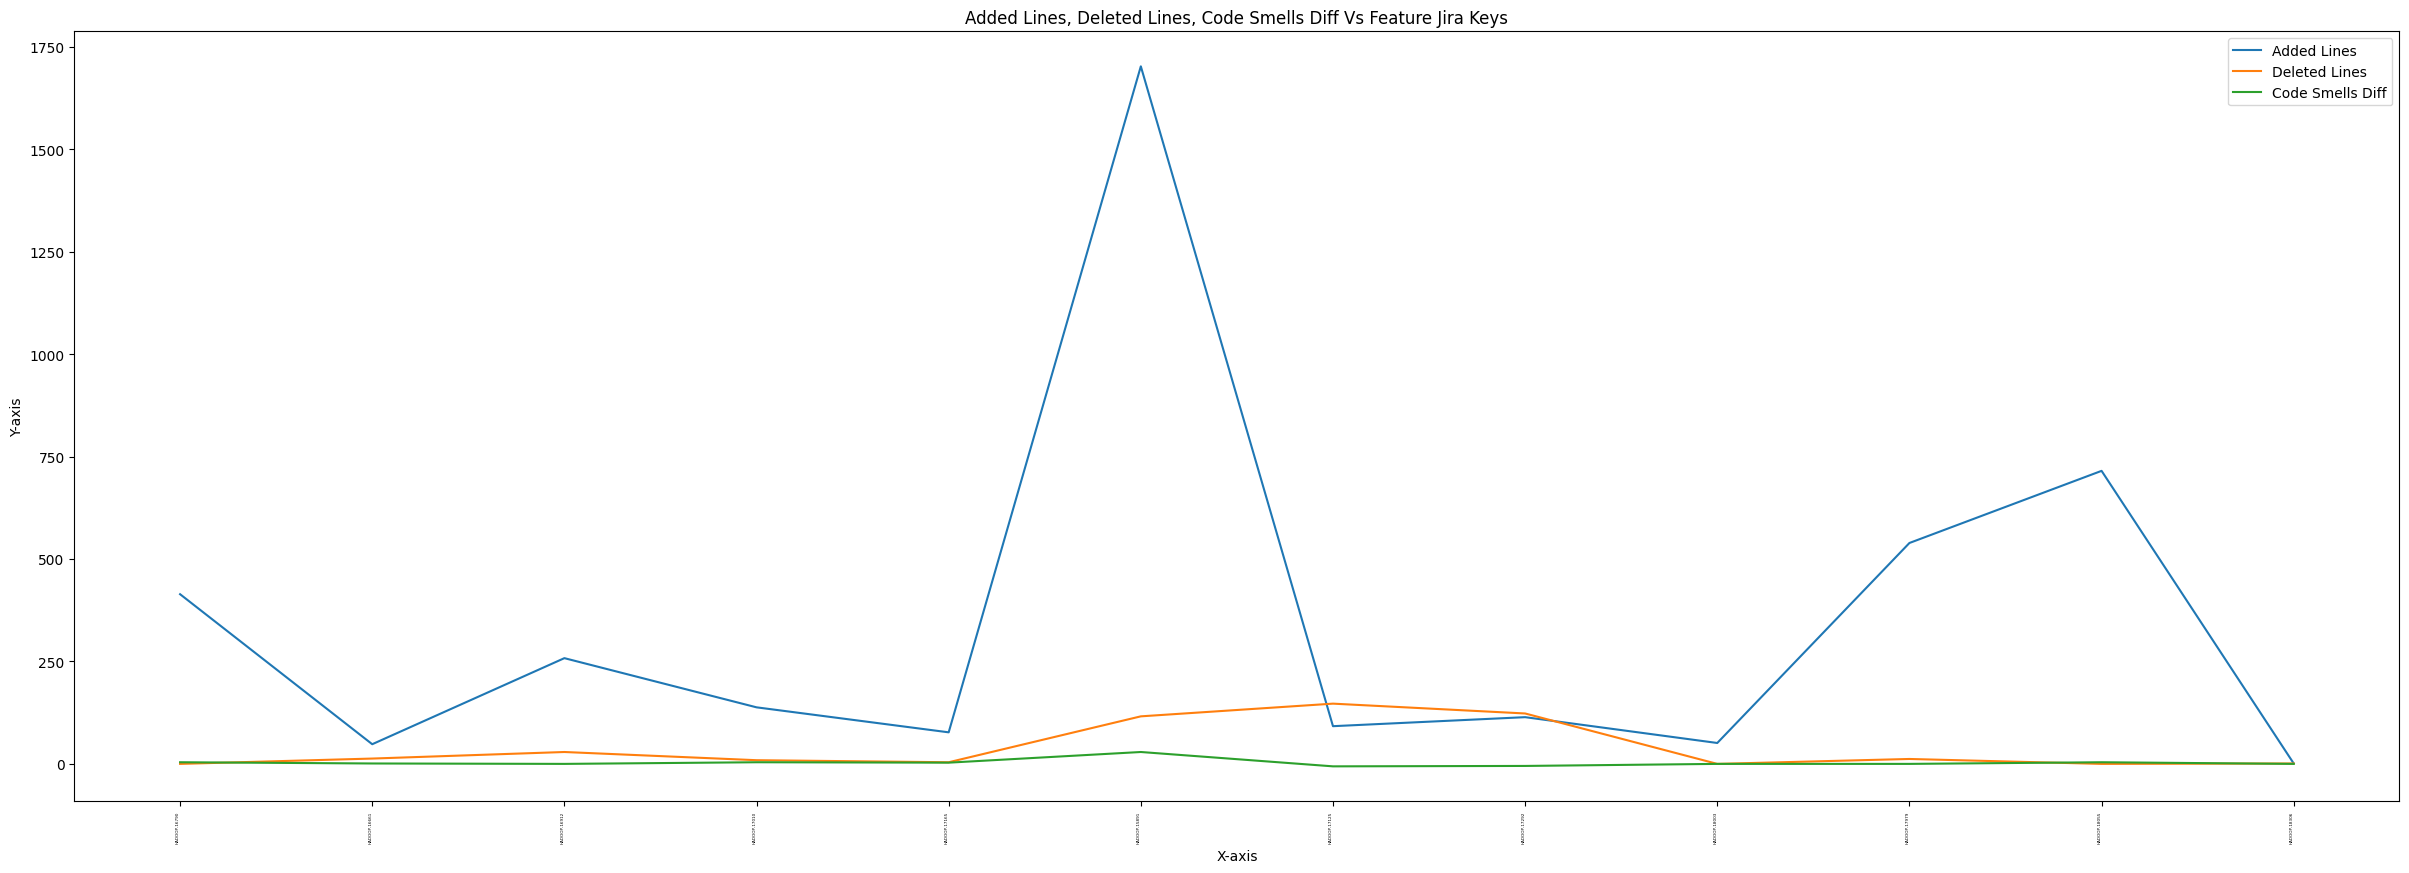

In [91]:
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(jira_issue_key_feature, added_lines_feature)
ax.plot(jira_issue_key_feature, deleted_lines_feature)
#ax.plot(jira_issue_key_feature, code_smells_feature)
ax.plot(jira_issue_key_feature, code_smells_diff_feature)
#ax.plot(jira_issue_key_feature, code_smells_density_feature.apply(lambda x: float(x)))
#ax.plot(jira_issue_key_bug, nloc_bug)

# Add labels to lines
ax.legend(['Added Lines', 'Deleted Lines', 'Code Smells Diff', 'Code Smells Density'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=3)
# Make x-axis a bit wider
#ax.set_xlim([0, 500])

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Added Lines, Deleted Lines, Code Smells Diff Vs Feature Jira Keys')

# Display the graph
plt.show()

# Shapiro-Wilk test for Normality

In [83]:
#Perform Shapiro-Wilk test for normality
from scipy.stats import shapiro

# Define the Shapiro-Wilk test function
def shapiro_wilk_test(values):
    stat, p = shapiro(values)
    print(f'Statistic={stat:.2f}, p-value={p:.2f}')
    if p > 0.05:
        print('Data looks normally distributed (fail to reject H0)')
    else:
        print('Data does not look normally distributed (reject H0)')

# Perform the Shapiro-Wilk test

print('Added Lines Bug:')
shapiro_wilk_test(added_lines_bug)
print('Deleted Lines Bug:')
shapiro_wilk_test(deleted_lines_bug)
print('Code Smells Diff Bug:')
shapiro_wilk_test(code_smells_diff_bug)


print('Added Lines Feature:')
shapiro_wilk_test(added_lines_feature)
print('Deleted Lines Feature:')
shapiro_wilk_test(deleted_lines_feature)
print('Code Smells Diff Feature:')
shapiro_wilk_test(code_smells_diff_feature)

Added Lines Bug:
Statistic=0.47, p-value=0.00
Data does not look normally distributed (reject H0)
Deleted Lines Bug:
Statistic=0.58, p-value=0.00
Data does not look normally distributed (reject H0)
Code Smells Diff Bug:
Statistic=0.73, p-value=0.00
Data does not look normally distributed (reject H0)
Added Lines Feature:
Statistic=0.70, p-value=0.00
Data does not look normally distributed (reject H0)
Deleted Lines Feature:
Statistic=0.69, p-value=0.00
Data does not look normally distributed (reject H0)
Code Smells Diff Feature:
Statistic=0.67, p-value=0.00
Data does not look normally distributed (reject H0)


# Spearman's correlation coefficient

scipy.stats.spearmanr 

Calculate a Spearman correlation coefficient with associated p-value.

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. Although calculation of the p-value does not make strong assumptions about the distributions underlying the samples, it is only accurate for very large samples (>500 observations). For smaller sample sizes, consider a permutation test.

### Added, Deleted lines, Code Smell Diff for Bug Issue Type

In [89]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(added_lines_bug, code_smells_diff_bug)

print('Added lines and code smells diff for Bug Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(deleted_lines_bug, code_smells_diff_bug)
print('Deleted lines and code smells diff for Bug Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))


Added lines and code smells diff for Bug Issue Type: Correlation: 0.1303478862517247 p value:0.15071627646118707
Deleted lines and code smells diff for Bug Issue Type: Correlation: -0.07982903650962751 p value:0.3801017058497149


### Added, Deleted lines, Code Smell Diff for New Feature Issue Type

In [90]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(added_lines_feature, code_smells_diff_feature)

print('Added lines and code smells diff for New Feature Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(deleted_lines_feature, code_smells_diff_feature)
print('Deleted lines and code smells diff for New Feature Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))


Added lines and code smells diff for New Feature Issue Type: Correlation: 0.494779409357656 p value:0.10197644557357327
Deleted lines and code smells diff for New Feature Issue Type: Correlation: -0.41884080252006595 p value:0.17535918287410382


### Added, Deleted lines, Code Smell Density for New Feature Issue Type

In [148]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(added_lines_feature, code_smells_density_feature)

print('Added lines and code smells density for Feature Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(deleted_lines_feature, code_smells_density_feature)
print('Deleted lines and code smells density for Feature Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))


Added lines and code smells density for Feature Issue Type: Correlation: 0.27050545947907634 p value:0.395120909118701
Deleted lines and code smells density for Feature Issue Type: Correlation: -0.25091056294461517 p value:0.4315067208067558


### Added, Deleted lines, Code Smell Density for Bug Issue Type

In [146]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(added_lines_bug, code_smells_density_bug)

print('Added lines and code smells density for Bug Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(deleted_lines_bug, code_smells_density_bug)
print('Deleted lines and code smells density for Bug Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))


Added lines and code smells density for Bug Issue Type: Correlation: 0.04099762137507595 p value:0.6525428364341616
Deleted lines and code smells density for Bug Issue Type: Correlation: -0.10440704212062124 p value:0.2504524188558802


### Added, Deleted lines, Code Smell Diff for Improvement Issue Type

In [152]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(added_lines_improvement, code_smells_diff_improvement)

print('Added lines and code smells diff for Improvement Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(deleted_lines_improvement, code_smells_diff_improvement)
print('Deleted lines and code smells diff for Improvement Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))


Added lines and code smells diff for Improvement Type: Correlation: 0.38229606182689757 p value:2.104595558407872e-05
Deleted lines and code smells diff for Improvement Type: Correlation: -0.07783392413780582 p value:0.40420784212020144


### Added, Deleted lines, Code Smell Density for Improvement Issue Type

In [165]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(added_lines_improvement, code_smells_density_improvement)
result_11 = spearmanr(code_smells_density_improvement, added_lines_improvement)

print('Added lines and code smells density for Improvement Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))
print('Code smells density and Added lines for Improvement Issue Type:' +  ' Correlation: '+ str(result_11.statistic) + ' p value:' + str(result_11.pvalue))

result_2 = spearmanr(deleted_lines_improvement, code_smells_density_improvement)
print('Deleted lines and code smells density for Improvement Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))


Added lines and code smells density for Improvement Issue Type: Correlation: 0.3395049499575384 p value:0.00018058206975507
Code smells density and Added lines for Improvement Issue Type: Correlation: 0.3395049499575383 p value:0.00018058206975507
Deleted lines and code smells density for Improvement Issue Type: Correlation: -0.14038921072997707 p value:0.13111365580987688


In [164]:
code_smells_density_improvement
#where jira key is HADOOP-11616
#code_smells_density_improvement.loc['jira issue key'] == 'HADOOP-11616'
#print the row where jira issue key is HADOOP-11616 
#code_smells_density_improvement

#print row 58 of the dataframe
code_smells_density_improvement.iloc[57]


'#DIV/0!'

In [168]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(added_lines_test, code_smells_density_test)
result_11 = spearmanr(code_smells_density_test, added_lines_test)

print('Added lines and code smells density for Test Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))
print('Code smells density and Added lines for Test Issue Type:' +  ' Correlation: '+ str(result_11.statistic) + ' p value:' + str(result_11.pvalue))

result_2 = spearmanr(deleted_lines_test, code_smells_density_test)
result_22 = spearmanr(code_smells_density_test, deleted_lines_test)
print('Deleted lines and code smells density for Test Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))
print('Deleted lines and code smells density for Test Issue Type:' +  ' Correlation: '+ str(result_22.statistic) + ' p value:' + str(result_22.pvalue))

Added lines and code smells density for Test Issue Type: Correlation: -0.5 p value:0.6666666666666667
Code smells density and Added lines for Test Issue Type: Correlation: -0.5 p value:0.6666666666666667
Deleted lines and code smells density for Test Issue Type: Correlation: 0.5 p value:0.6666666666666667
Deleted lines and code smells density for Test Issue Type: Correlation: 0.5 p value:0.6666666666666667


# Mann Kendall Test for Trend Analysis

In [95]:
#Mann Kendall test
from pymannkendall import pymannkendall

# calculate mann kendall test
mk_test1 = pymannkendall.original_test(added_lines_bug)
print(mk_test1)

mk_test2 = pymannkendall.original_test(deleted_lines_bug)
print(mk_test2)

mk_test3 = pymannkendall.original_test(added_lines_feature)
print(mk_test3)

mk_test4 = pymannkendall.original_test(deleted_lines_feature)
print(mk_test4)

mk_test5 = pymannkendall.original_test(code_smells_diff_bug)
print(mk_test5)

mk_test6 = pymannkendall.original_test(code_smells_diff_feature)
print(mk_test6)


Mann_Kendall_Test(trend='increasing', h=True, p=0.0362704001861649, z=2.093883042830626, Tau=0.12768226042916167, s=958.0, var_s=208890.66666666666, slope=0.11290322580645161, intercept=13.112903225806452)
Mann_Kendall_Test(trend='no trend', h=False, p=0.0558659225342657, z=1.912080087101987, Tau=0.11448753831800614, s=859.0, var_s=201355.0, slope=0.0, intercept=3.0)
Mann_Kendall_Test(trend='no trend', h=False, p=0.837011475105446, z=-0.20571764439712248, Tau=-0.06060606060606061, s=-4.0, var_s=212.66666666666666, slope=-6.25, intercept=160.375)
Mann_Kendall_Test(trend='no trend', h=False, p=0.7820213874219097, z=-0.27668578554642986, Tau=-0.07575757575757576, s=-5.0, var_s=209.0, slope=-0.2767857142857143, intercept=12.022321428571429)
Mann_Kendall_Test(trend='no trend', h=False, p=0.7649965365428533, z=0.2989259632251322, Tau=0.016660002665600426, s=125.0, var_s=172074.33333333334, slope=0.0, intercept=0.0)
Mann_Kendall_Test(trend='no trend', h=False, p=0.47986590061267576, z=-0.7065

# Comparison of Spearman Corr. for All Issue Types and Individual Issue Types

To prove something using statistics, you should assume the opposite, that there is no correlation between your data sets. This is known as setting the null hypothesis (H0). Your hypothesis should always be stated in its null (H0) and alternative (H1) forms.

The p (or probability) value is a measure of how likely or probable it is that any observed correlation is due to chance. 

* P-values range between 0 (0%) and 1 (100%). 
* A p-value close to 1 suggests no correlation other than due to chance and that your null hypothesis assumption is correct. 
* If your p-value is close to 0, the observed correlation is unlikely to be due to chance and there is a very high probability that your null hypothesis is wrong. In this case you must accept the alternative (H1) hypothesis that there is a correlation between your data sets. 

## Strength of a correlation

* 0.00 to 0.19	A very weak correlation
* 0.20 to 0.39	A weak correlation
* 0.40 to 0.69	A moderate correlation
* 0.70 to 0.89	A strong correlation
* 0.90 to 1.00	A very strong correlation

## Interpreting a p-value

* P-value is a number between 0 and 1
* P values are expressed as decimals although they may be more easily understood if you convert them to a percentage (e.g. 0.1 = 10%).
* P-values are determined by the observed correlation Rs value and the sample size.
* Small p-values are strong evidence against the null hypothesis H0.
* With a small p-value, we reject the null hypothesis H0. The relationship between your data sets is significantly different than that stated in H0.


## P-value and evidence for rejecting the H0 null hypothesis

| P-value	| P-value %	| Evidence for rejecting H0 

* More than 0.1 |	>10% | Very weak to none |
* Between 0.1 - 0.05 | 10%-5%	| Weak |
* Between 0.05 - 0.01	| 5%-1% | Strong |
* Less than 0.01	| <1% | Very strong |

== > above descriptions from a geology page - does it fit SE?

| Spearman's correlation (All Issue Types)                                 | Correlation   | Strength | p-value
|---------------------------------------------|---------|---------|---------|
| code smells and added lines                    | 0.027   | negligible | 0.604 |
| code smells and new code                    | 0.083   | negligible | 0.118 |
| code smells and rework                      | -0.046  | - | 0.385 | 0.385 |
| code smells and new code/rework ratio       | 0.081   | negligible | 0.123 |
| code smells diff and new code               | 0.409   | strong | 6.673 |
| code smells diff and rework                 | -0.151  | - | 0.004 |
| code smells diff and new code/rework ratio  | 0.408   | strong | 7.474 |


* p <0.05, ** p <0.01, *** p <0.001
0–0.19: negligible; 0.20–0.29: weak; 0.30–0.39: moderate; 0.40–0.69: strong; and ≥ 0.70: very strong


| Spearman's correlation between (Individual Issue Types)                                | Correlation   | Strength | p-value
|---------------------------------------------|---------|---------|---------|
| code smells diff and added lines (Bug)                  | 0.130   | negligible | 0.150 |
| code smells diff and deleted lines (Bug)                    | -0.08 | - | 0.380 |
| code smells diff and added lines (Feature)                  | 0.495 | strong | 0.101 |
| code smells diff and deleted lines (Feature)  | -0.419 | - | 0.175 |  

* p <0.05, ** p <0.01, *** p <0.001
0–0.19: negligible; 0.20–0.29: weak; 0.30–0.39: moderate; 0.40–0.69: strong; and ≥ 0.70: very strong


Chat GPT Note about choosing the statistically significance level: Is this correct?

Choosing the significance level for a study involves balancing the risk of making a Type I error (rejecting a true null hypothesis) against the risk of making a Type II error (failing to reject a false null hypothesis). The significance level (alpha) is the threshold at which you consider a result to be statistically significant. The commonly used significance level is 0.05, meaning that if the p-value is less than 0.05, the result is considered statistically significant.

However, the choice of significance level depends on the context and goals of the study, as well as the sample size, effect size, and variability in the data. With a sample size of 359 GitHub commits, you may consider using a smaller significance level, such as 0.01, to reduce the risk of false positives. This would mean that you would only consider results to be statistically significant if the p-value is less than 0.01.

It's important to note that the choice of significance level should also take into account the cost of making a Type I error versus a Type II error, as well as the implications of the results for decision-making. Ultimately, the significance level should be chosen based on a careful consideration of the context and goals of the study.

### Graphs for correlation - might not look nice!

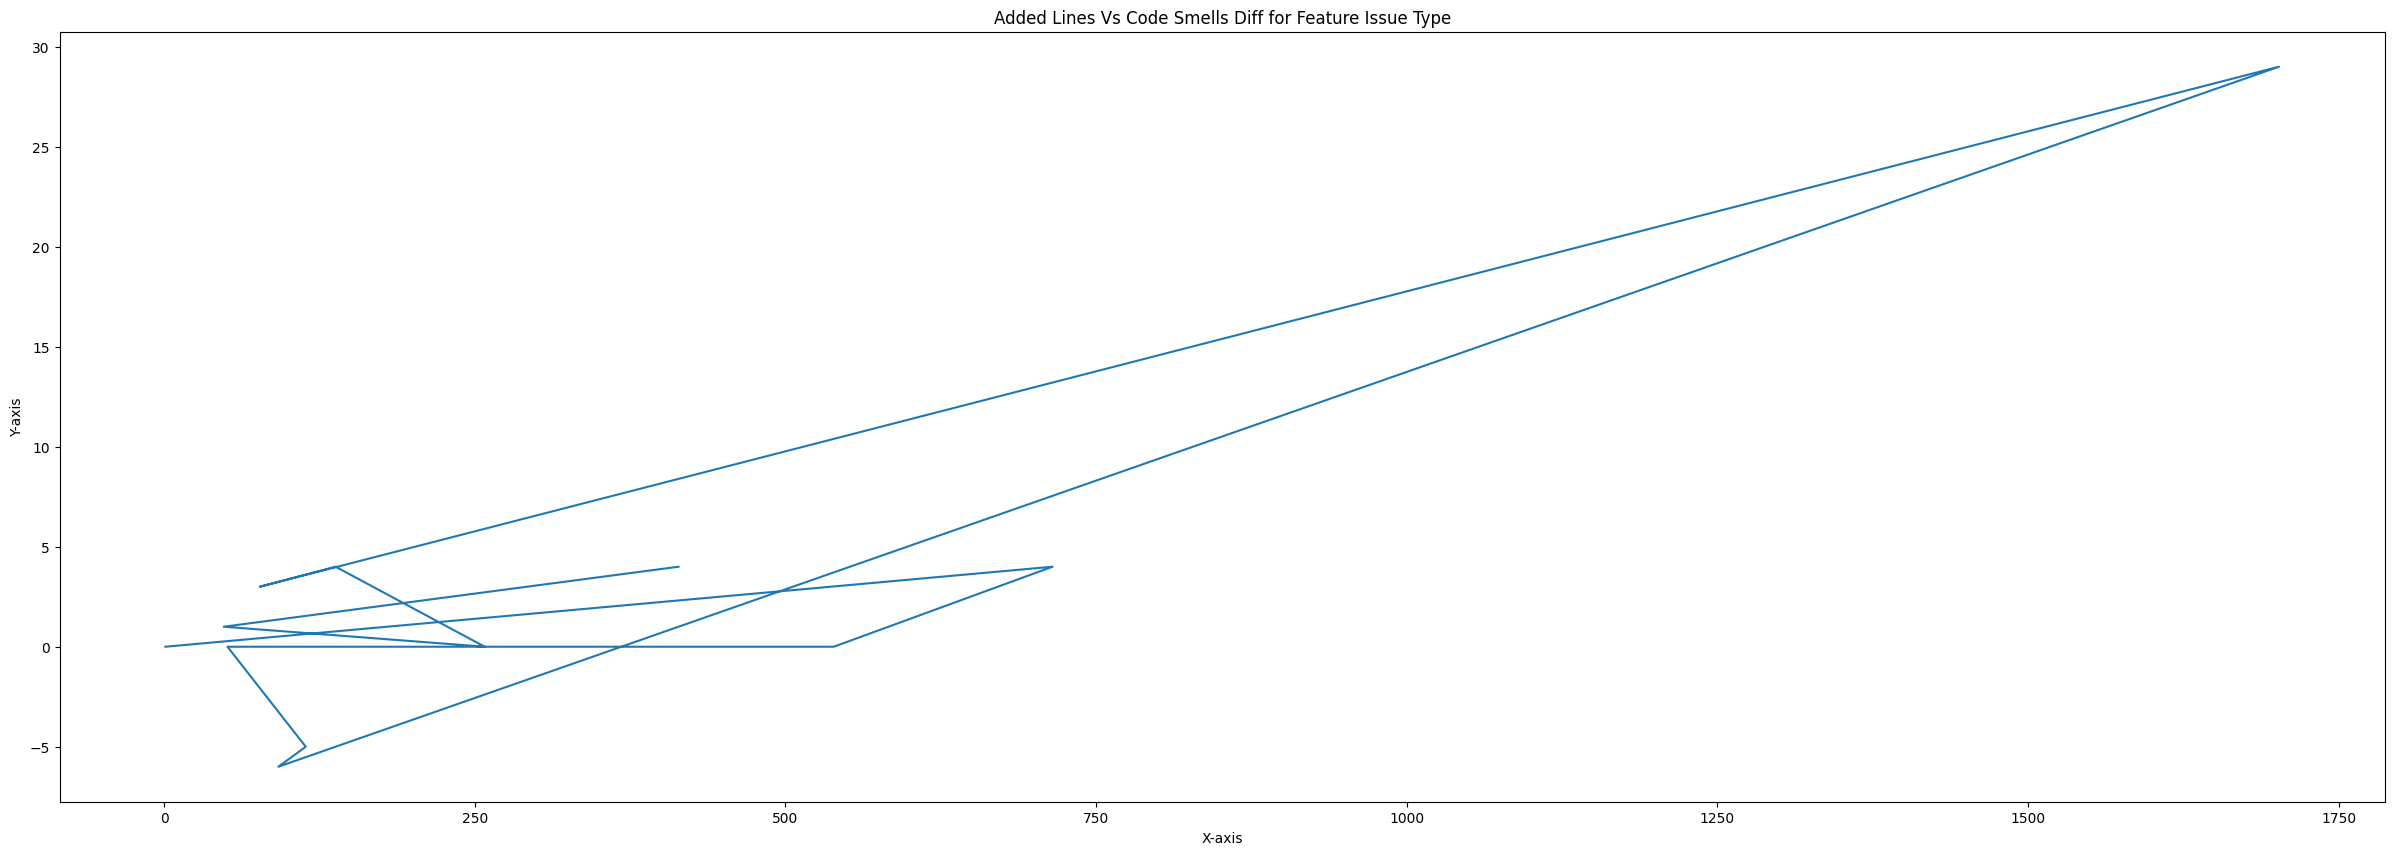

In [99]:
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(added_lines_feature, code_smells_diff_feature)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Added Lines Vs Code Smells Diff for Feature Issue Type')

# Display the graph
plt.show()

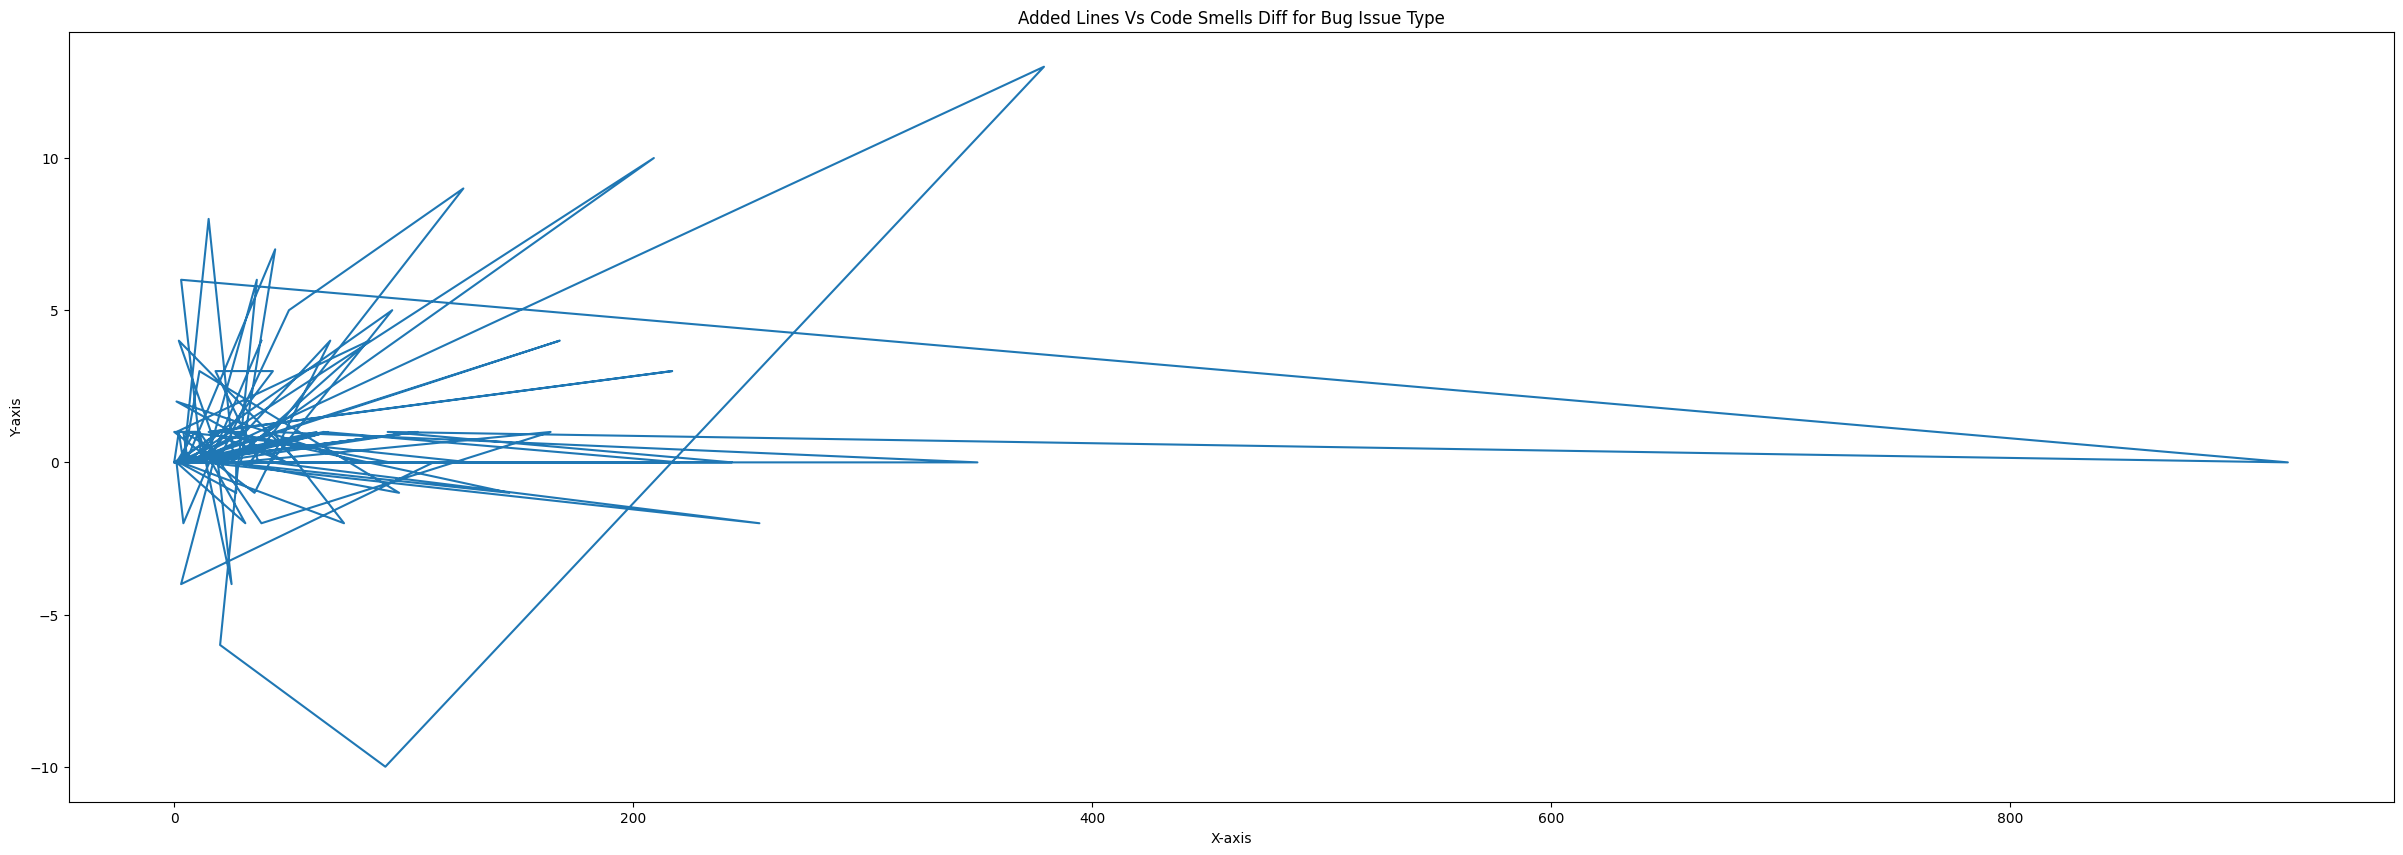

In [101]:
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(added_lines_bug, code_smells_diff_bug)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Added Lines Vs Code Smells Diff for Bug Issue Type')

# Display the graph
plt.show()

## Trend Analysis

In [102]:
#Mann Kendall test
from pymannkendall import pymannkendall

# calculate mann kendall test
mk_test1 = pymannkendall.original_test(code_smells_bug)
print(mk_test1)

# calculate mann kendall test
mk_test2 = pymannkendall.original_test(code_smells_diff_bug)
print(mk_test2)

# calculate mann kendall test
mk_test1 = pymannkendall.original_test(code_smells_feature)
print(mk_test1)

# calculate mann kendall test
mk_test2 = pymannkendall.original_test(code_smells_diff_feature)
print(mk_test2)


Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=15.237005599888416, Tau=0.928828468612555, s=6969.0, var_s=209130.33333333334, slope=8.766355140186915, intercept=8875.252336448599)
Mann_Kendall_Test(trend='no trend', h=False, p=0.7649965365428533, z=0.2989259632251322, Tau=0.016660002665600426, s=125.0, var_s=172074.33333333334, slope=0.0, intercept=0.0)
Mann_Kendall_Test(trend='increasing', h=True, p=3.722512424442215e-05, z=4.124060379740825, Tau=0.9242424242424242, s=61.0, var_s=211.66666666666666, slope=70.04545454545455, intercept=8935.25)
Mann_Kendall_Test(trend='no trend', h=False, p=0.47986590061267576, z=-0.7065182610835988, Tau=-0.16666666666666666, s=-11.0, var_s=200.33333333333334, slope=-0.1125, intercept=1.11875)


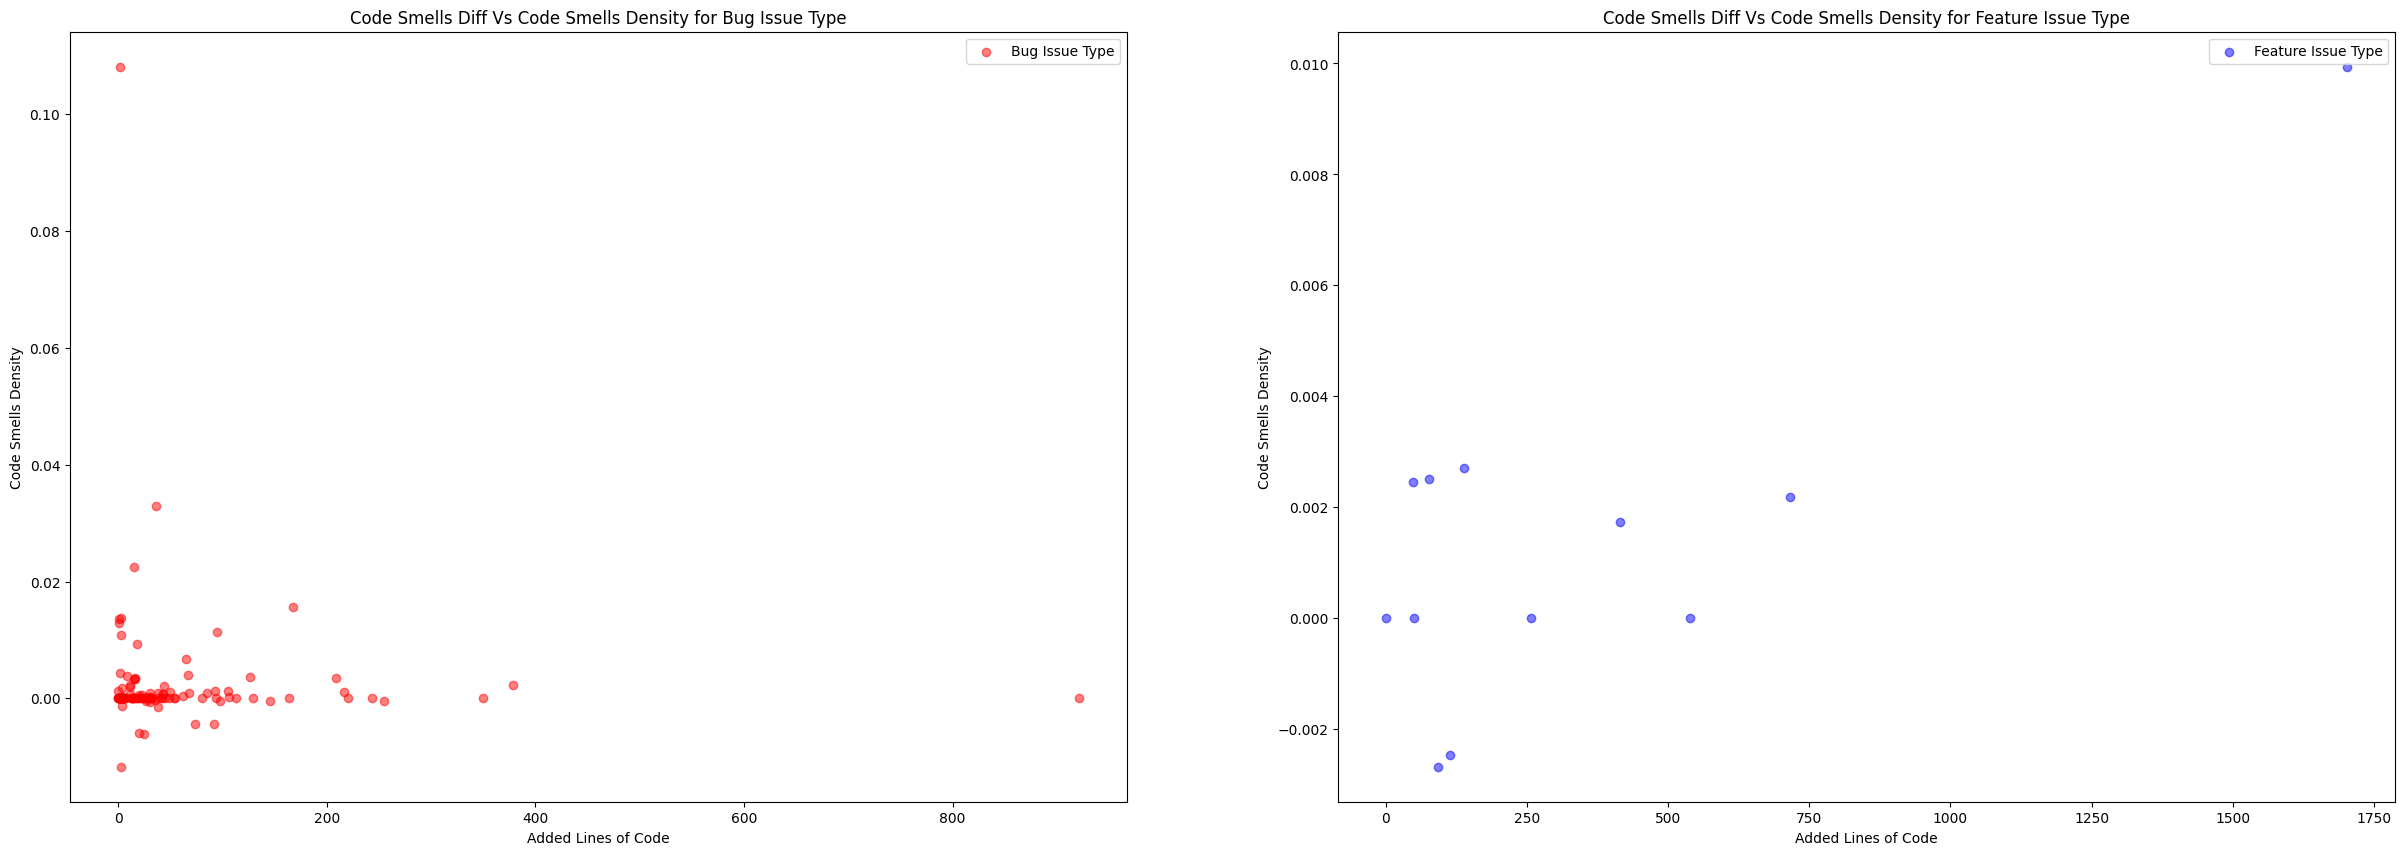

In [120]:
#Draw a scatter plot for code smells diff and code smells density
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object 
#fig, ax = plt.subplots()

#create two sub plots
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(added_lines_bug, code_smells_density_bug.apply(lambda x: float(x)), c='red', alpha=0.5, label='Bug Issue Type')
ax2.scatter(added_lines_feature, code_smells_density_feature.apply(lambda x: float(x)), c='blue', alpha=0.5, label='Feature Issue Type')

# Add a legend
ax1.legend()
ax2.legend()

# Add axis labels and a title
ax1.set_xlabel('Added Lines of Code')
ax1.set_ylabel('Code Smells Density')
ax2.set_xlabel('Added Lines of Code')
ax2.set_ylabel('Code Smells Density')
ax1.set_title('Code Smells Diff Vs Code Smells Density for Bug Issue Type')
ax2.set_title('Code Smells Diff Vs Code Smells Density for Feature Issue Type')
# Display the graph
plt.show()




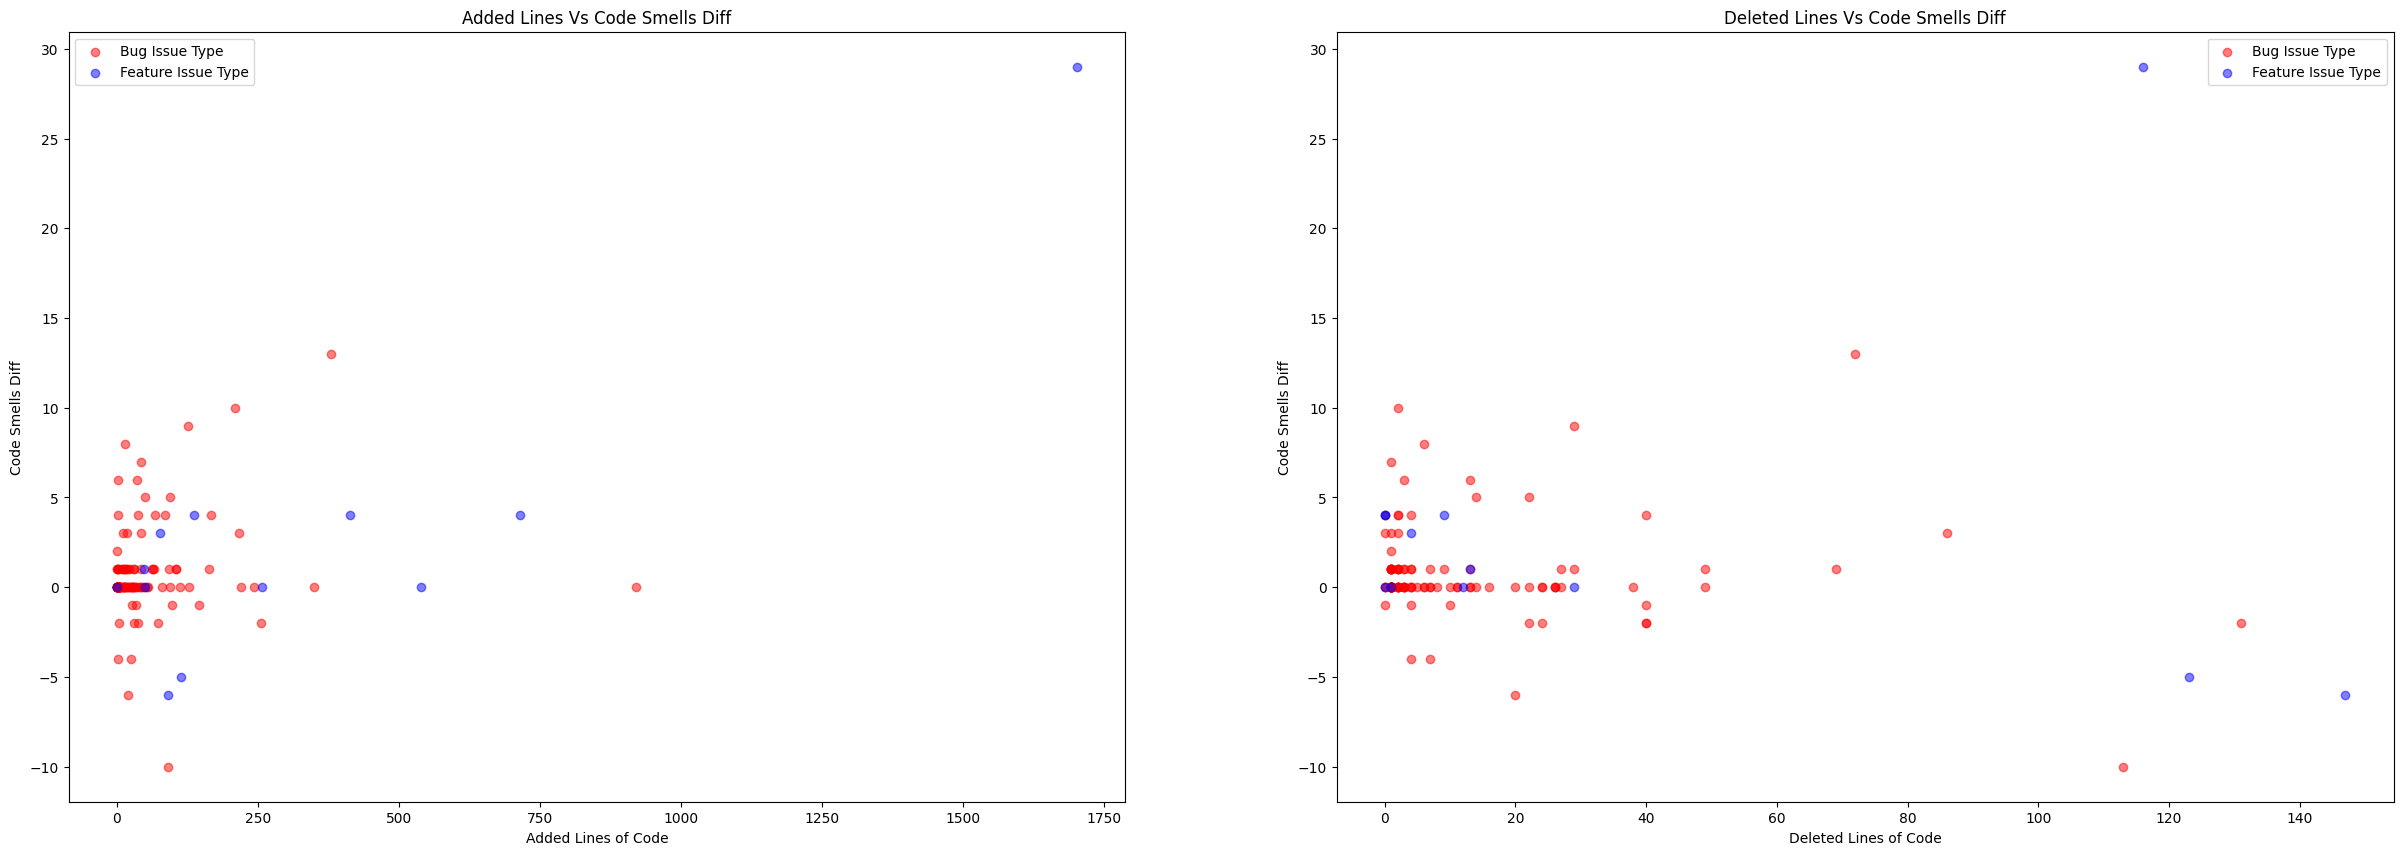

In [141]:
#Draw a scatter plot for code smells diff and code smells density
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object 
#fig, ax = plt.subplots()

#create two sub plots
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(added_lines_bug, code_smells_diff_bug, c='red', alpha=0.5, label='Bug Issue Type')
ax1.scatter(added_lines_feature, code_smells_diff_feature, c='blue', alpha=0.5, label='Feature Issue Type')
#ax1.scatter(added_lines_improvement, code_smells_density_feature.apply(lambda x: float(x)), c='blue', alpha=0.5, label='Feature Issue Type')

ax2.scatter(deleted_lines_bug, code_smells_diff_bug, c='red', alpha=0.5, label='Bug Issue Type')
ax2.scatter(deleted_lines_feature, code_smells_diff_feature, c='blue', alpha=0.5, label='Feature Issue Type')
#ax2.scatter(deleted_lines_improvement, code_smells_density_feature.apply(lambda x: float(x)), c='blue', alpha=0.5, label='Feature Issue Type')

# Add a legend
ax1.legend()
ax2.legend()

# Add axis labels and a title
ax1.set_xlabel('Added Lines of Code')
ax1.set_ylabel('Code Smells Diff')

ax2.set_xlabel('Deleted Lines of Code')
ax2.set_ylabel('Code Smells Diff')

ax1.set_title('Added Lines Vs Code Smells Diff')
ax2.set_title('Deleted Lines Vs Code Smells Diff')
# Display the graph
plt.show()




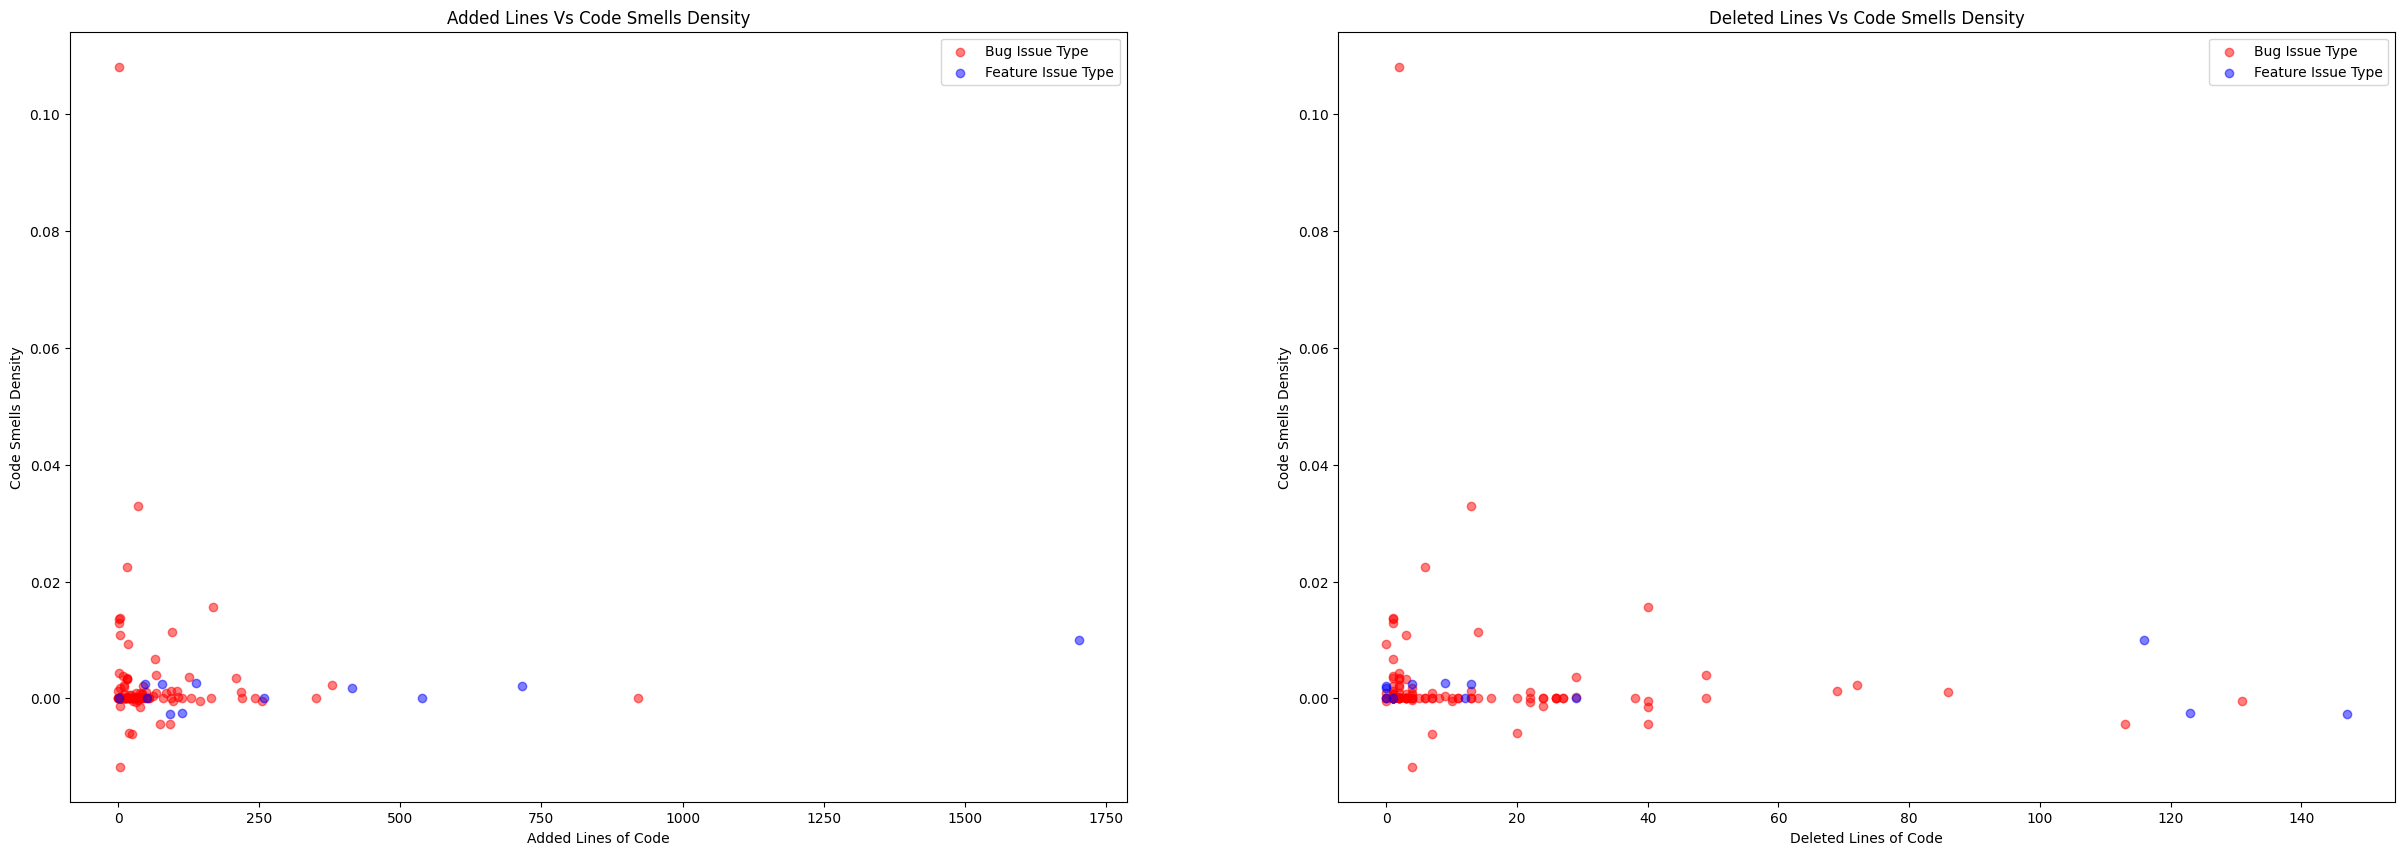

In [128]:
#Draw a scatter plot for code smells diff and code smells density
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object 
#fig, ax = plt.subplots()

#create two sub plots
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(added_lines_bug, code_smells_density_bug.apply(lambda x: float(x)), c='red', alpha=0.5, label='Bug Issue Type')
ax1.scatter(added_lines_feature, code_smells_density_feature.apply(lambda x: float(x)), c='blue', alpha=0.5, label='Feature Issue Type')
#ax1.scatter(added_lines_improvement, code_smells_density_feature.apply(lambda x: float(x)), c='blue', alpha=0.5, label='Feature Issue Type')

ax2.scatter(deleted_lines_bug, code_smells_density_bug.apply(lambda x: float(x)), c='red', alpha=0.5, label='Bug Issue Type')
ax2.scatter(deleted_lines_feature, code_smells_density_feature.apply(lambda x: float(x)), c='blue', alpha=0.5, label='Feature Issue Type')
#ax2.scatter(deleted_lines_improvement, code_smells_density_feature.apply(lambda x: float(x)), c='blue', alpha=0.5, label='Feature Issue Type')

# Add a legend
ax1.legend()
ax2.legend()

# Add axis labels and a title
ax1.set_xlabel('Added Lines of Code')
ax1.set_ylabel('Code Smells Density')

ax2.set_xlabel('Deleted Lines of Code')
ax2.set_ylabel('Code Smells Density')

ax1.set_title('Added Lines Vs Code Smells Density')
ax2.set_title('Deleted Lines Vs Code Smells Density')
# Display the graph
plt.show()




In [132]:
len(added_lines_bug)
len(added_lines_feature)
len(deleted_lines_bug)
len(deleted_lines_feature)

12

In [134]:
len(code_smells_density_bug.apply(lambda x: float(x)))
len(code_smells_density_feature.apply(lambda x: float(x)))

12

In [136]:
len(added_lines_improvement)

117

### Quick Fix

In [173]:
#replace by 0 if '#DIV/0!'
code_smells_density_improvement = code_smells_density_improvement.replace('#DIV/0!', 0)

In [174]:
len(code_smells_density_improvement.apply(lambda x: float(x)))

117

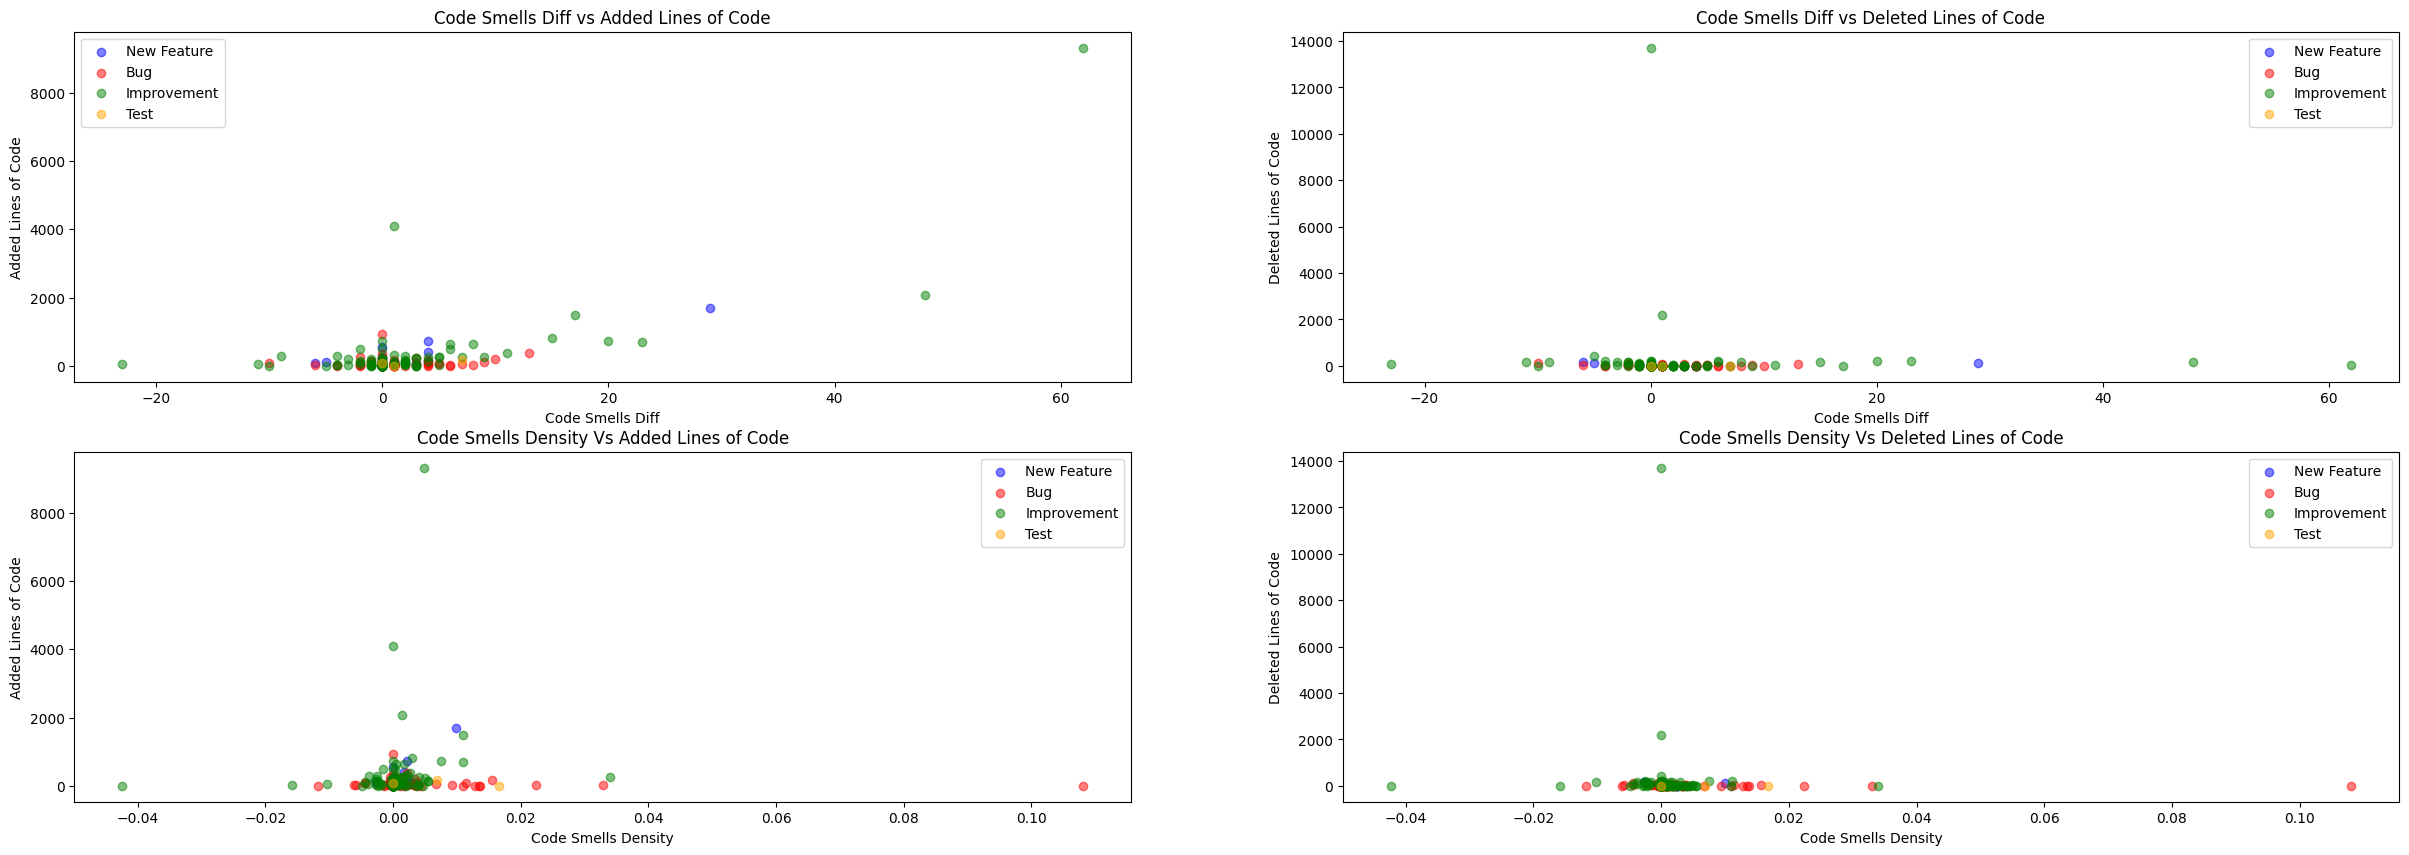

In [187]:
#Draw a scatter plot for code smells diff and code smells density
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object 
#fig, ax = plt.subplots()

#create 4 sub plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


ax1.scatter(code_smells_diff_feature, added_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax1.scatter(code_smells_diff_bug, added_lines_bug, c='red', alpha=0.5, label='Bug')
ax1.scatter(code_smells_diff_improvement, added_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax1.scatter(code_smells_diff_test, added_lines_test, c='orange', alpha=0.5, label='Test')

ax2.scatter(code_smells_diff_feature, deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax2.scatter(code_smells_diff_bug, deleted_lines_bug, c='red', alpha=0.5, label='Bug')
ax2.scatter(code_smells_diff_improvement, deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax2.scatter(code_smells_diff_test, deleted_lines_test, c='orange', alpha=0.5, label='Test')

ax3.scatter(code_smells_density_feature.apply(lambda x: float(x)), added_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax3.scatter(code_smells_density_bug.apply(lambda x: float(x)), added_lines_bug, c='red', alpha=0.5, label='Bug')
ax3.scatter(code_smells_density_improvement.apply(lambda x: float(x)), added_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax3.scatter(code_smells_density_test.apply(lambda x: float(x)), added_lines_test, c='orange', alpha=0.5, label='Test')

ax4.scatter(code_smells_density_feature.apply(lambda x: float(x)), deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax4.scatter(code_smells_density_bug.apply(lambda x: float(x)), deleted_lines_bug, c='red', alpha=0.5, label='Bug')
ax4.scatter(code_smells_density_improvement.apply(lambda x: float(x)), deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax4.scatter(code_smells_density_test.apply(lambda x: float(x)), deleted_lines_test, c='orange', alpha=0.5, label='Test')

# Add a legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


# Add axis labels and a title
ax1.set_xlabel('Code Smells Diff')
ax1.set_ylabel('Added Lines of Code')

ax2.set_xlabel('Code Smells Diff')
ax2.set_ylabel('Deleted Lines of Code')

ax3.set_xlabel('Code Smells Density')
ax3.set_ylabel('Added Lines of Code')

ax4.set_xlabel('Code Smells Density')
ax4.set_ylabel('Deleted Lines of Code')

ax1.set_title('Code Smells Diff vs Added Lines of Code')
ax2.set_title('Code Smells Diff vs Deleted Lines of Code')
ax3.set_title('Code Smells Density Vs Added Lines of Code')
ax4.set_title('Code Smells Density Vs Deleted Lines of Code')

# Display the graph
plt.show()





# Based on Type of Modification (subrows data)

In [205]:
#import data from csv file

import pandas as pd

dataset_it = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\All_Rows_Manual_Analysis.csv')

#get subrows from dataset

#all rows 
all_rows = dataset_it[dataset_it['jira issue key'].notna()]

#filter the rows where hash is not null to get the subrows
sub_rows = all_rows[all_rows['hash'].isna()]

In [208]:
len(all_rows) - len(sub_rows) 


359

In [209]:
#prepare data for analysis

#filter rows with issue type = 'Bug'
sub_rows_modification = sub_rows[sub_rows['change_type'] == 'ModificationType.MODIFY']

#filter rows with issue type = 'New Feature'
sub_rows_addition = sub_rows[sub_rows['change_type'] == 'ModificationType.ADD']

#filter rows with issue type = 'Improvement'
sub_rows_deletion = sub_rows[sub_rows['change_type'] == 'ModificationType.DELETE']


## Data for Addition

In [210]:
#added lines in additions
added_lines_addition = sub_rows_addition['added_lines']

#deleted lines in additions
deleted_lines_addition = sub_rows_addition['deleted_lines']

#code smells in additions
code_smells_addition = sub_rows_addition['code_smells']

#code smells diff in main rows
code_smells_diff_addition = sub_rows_addition['code_smells_diff']

#code smells density in main rows
code_smells_density_addition = sub_rows_addition['code_smell_density']

In [211]:
len(added_lines_addition)

330

## Data for Deletion

In [212]:
#added lines in additions
added_lines_deletion = sub_rows_deletion['added_lines']

#deleted lines in additions
deleted_lines_deletion = sub_rows_deletion['deleted_lines']

#code smells in additions
code_smells_deletion = sub_rows_deletion['code_smells']

#code smells diff in main rows
code_smells_diff_deletion = sub_rows_deletion['code_smells_diff']

#code smells density in main rows
code_smells_density_deletion = sub_rows_deletion['code_smell_density']

## Data for Modification

In [213]:
#added lines in additions
added_lines_modification = sub_rows_modification['added_lines']

#deleted lines in additions
deleted_lines_modification = sub_rows_modification['deleted_lines']

#code smells in additions
code_smells_modification = sub_rows_modification['code_smells']

#code smells diff in main rows
code_smells_diff_modification = sub_rows_modification['code_smells_diff']

#code smells density in main rows
code_smells_density_modification = sub_rows_modification['code_smell_density']

In [204]:
print(added_lines_modification)



Series([], Name: added_lines, dtype: int64)


# Spearman Rank Corr for Type of Modification: Addition, Deletion, Modification 

In [215]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

result_01 = spearmanr(code_smells_diff_addition, added_lines_addition)
result_02 = spearmanr(code_smells_diff_addition, deleted_lines_addition)
result_03 = spearmanr(code_smells_density_addition, added_lines_addition)
result_04 = spearmanr(code_smells_density_addition, deleted_lines_addition)

print('Code smells Diff and Added lines for Additions:' +  ' Correlation: '+ str(result_01.statistic) + ' p value:' + str(result_01.pvalue))
print('Code smells Diff and Deleted lines for Additions:' +  ' Correlation: '+ str(result_02.statistic) + ' p value:' + str(result_02.pvalue))
print('Code smells Density and Added lines for Additions:' +  ' Correlation: '+ str(result_03.statistic) + ' p value:' + str(result_03.pvalue))
print('Code smells Density and Deleted lines for Additions:' +  ' Correlation: '+ str(result_04.statistic) + ' p value:' + str(result_04.pvalue))

Code smells Diff and Added lines for Additions: Correlation: nan p value:nan
Code smells Diff and Deleted lines for Additions: Correlation: nan p value:nan
Code smells Density and Added lines for Additions: Correlation: nan p value:nan
Code smells Density and Deleted lines for Additions: Correlation: nan p value:nan


In [216]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

result_01 = spearmanr(code_smells_diff_deletion, added_lines_deletion)
result_02 = spearmanr(code_smells_diff_deletion, deleted_lines_deletion)
result_03 = spearmanr(code_smells_density_deletion, added_lines_deletion)
result_04 = spearmanr(code_smells_density_deletion, deleted_lines_deletion)

print('Code smells Diff and Added lines for Deletions:' +  ' Correlation: '+ str(result_01.statistic) + ' p value:' + str(result_01.pvalue))
print('Code smells Diff and Deleted lines for Deletions:' +  ' Correlation: '+ str(result_02.statistic) + ' p value:' + str(result_02.pvalue))
print('Code smells Density and Added lines for Deletions:' +  ' Correlation: '+ str(result_03.statistic) + ' p value:' + str(result_03.pvalue))
print('Code smells Density and Deleted lines for Deletions:' +  ' Correlation: '+ str(result_04.statistic) + ' p value:' + str(result_04.pvalue))

Code smells Diff and Added lines for Deletions: Correlation: nan p value:nan
Code smells Diff and Deleted lines for Deletions: Correlation: nan p value:nan
Code smells Density and Added lines for Deletions: Correlation: nan p value:nan
Code smells Density and Deleted lines for Deletions: Correlation: nan p value:nan


In [217]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

result_01 = spearmanr(code_smells_diff_modification, added_lines_modification)
result_02 = spearmanr(code_smells_diff_modification, deleted_lines_modification)
result_03 = spearmanr(code_smells_density_modification, added_lines_modification)
result_04 = spearmanr(code_smells_density_modification, deleted_lines_modification)

print('Code smells Diff and Added lines for Modification:' +  ' Correlation: '+ str(result_01.statistic) + ' p value:' + str(result_01.pvalue))
print('Code smells Diff and Deleted lines for Modification:' +  ' Correlation: '+ str(result_02.statistic) + ' p value:' + str(result_02.pvalue))
print('Code smells Density and Added lines for Modification:' +  ' Correlation: '+ str(result_03.statistic) + ' p value:' + str(result_03.pvalue))
print('Code smells Density and Deleted lines for Modification:' +  ' Correlation: '+ str(result_04.statistic) + ' p value:' + str(result_04.pvalue))

Code smells Diff and Added lines for Modification: Correlation: nan p value:nan
Code smells Diff and Deleted lines for Modification: Correlation: nan p value:nan
Code smells Density and Added lines for Modification: Correlation: nan p value:nan
Code smells Density and Deleted lines for Modification: Correlation: nan p value:nan


# Spearman Rank Corr for All Issue Types (All Commits)

#extract data for main rows

#main rows 
main_rows = dataset_it[dataset_it['hash'].notna()]

#issue type in main rows
issue_type = main_rows['issue type']

#added lines in main rows
added_lines = main_rows['added_lines']

#deleted lines in main rows
deleted_lines = main_rows['deleted_lines']

#code smells in main rows
code_smells = main_rows['code_smells']

#code smells diff in main rows
code_smells_diff = main_rows['code_smells_diff']

#code smells density in main rows
code_smells_density = main_rows['code_smell_density']

In [193]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

result_01 = spearmanr(code_smells_diff, added_lines)
result_02 = spearmanr(code_smells_diff, deleted_lines)
result_03 = spearmanr(code_smells_density, added_lines)
result_04 = spearmanr(code_smells_density, deleted_lines)

print('Code smells Diff and Added lines for All Issues:' +  ' Correlation: '+ str(result_01.statistic) + ' p value:' + str(result_01.pvalue))
print('Code smells Diff and Deleted lines for All Issues:' +  ' Correlation: '+ str(result_02.statistic) + ' p value:' + str(result_02.pvalue))
print('Code smells Density and Added lines for All Issues:' +  ' Correlation: '+ str(result_03.statistic) + ' p value:' + str(result_03.pvalue))
print('Code smells Density and Deleted lines for All Issues:' +  ' Correlation: '+ str(result_04.statistic) + ' p value:' + str(result_04.pvalue))

Code smells Diff and Added lines for All Issues: Correlation: 0.2163680500881073 p value:3.5593107021633705e-05
Code smells Diff and Deleted lines for All Issues: Correlation: -0.15145439259952856 p value:0.004024269827121991
Code smells Density and Added lines for All Issues: Correlation: 0.14379287351425937 p value:0.0063491809824937516
Code smells Density and Deleted lines for All Issues: Correlation: -0.21156494625803368 p value:5.335299346380206e-05
